# Project Scoping

## Project Goals
### 1. Data Understanding & Preparation

#### Data Profiling

- Generate summary statistics for numerical features (age, height, income)
- Create frequency distributions for categorical variables (body_type, diet, orientation, etc.)
- Assess completion rates across all fields, with special attention to essays
- Map location data to geographical coordinates for spatial analysis

#### Data Cleaning Strategy
- Develop consistent handling for missing values across different column types
- Create standardized categories for free-text fields (job, education)
- Implement text preprocessing pipeline for the ten essay columns (essay0-essay9)
- Extract timestamps from last_online for recency analysis

### 2. Feature Engineering

#### Demographic Features

- Create age groups and height brackets for simplified analysis
- Develop lifestyle composite indicators (combining drinks, drugs, smokes)
- Generate socioeconomic indicators based on education, income, and job
- Build relationship status indicators including offspring information

#### Text-Based Features

- Map essays to specific topics (self-description, interests, partner preferences)
- Generate psychometric indicators from text analysis (openness, communication style)
- Quantify text sophistication metrics (vocabulary diversity, structure complexity)

#### Interaction Features

- Create compatibility metrics between stated preferences and personal attributes
- Develop lifestyle compatibility scores
- Build location-based distance or accessibility metrics
- Generate activity and interest overlap measurements

### 3. Exploratory Analysis

#### Demographic Patterns


- Analyze relationship between age, orientation, and relationship preferences
- Examine education and income distributions across different demographics
- Investigate patterns in lifestyle choices (diet, drugs, drinks) by location
- Explore religious and ethnic diversity patterns in the dataset

#### Text Analysis

- Compare essay content patterns across different demographic groups
- Identify distinctive language patterns by age, education, or orientation
- Analyze sentiment differences across essay types
- Explore common interests and activities mentioned across profiles

#### Behavioral Insights

- Analyze profile completeness as an engagement indicator
- Examine last_online patterns for usage behavior insights
- Investigate relationship between profile detail and stated preferences
- Identify correlations between lifestyle choices and relationship status

### 4. Advanced Analytics

#### Classification Models

- Predict undisclosed attributes (income, education) from other profile elements
- Build orientation classifiers based on combined text and demographic features
- Develop relationship status prediction models
- Create active/inactive user classification based on profile characteristics

### Predictive Modeling

- Predict undisclosed attributes based on essay content
- Build classification models for relationship status or preferences
- Create models to predict compatibility between users


#### Clustering & Segmentation

- Develop user personas based on multidimensional clustering
- Identify natural groupings of communication styles from essay content
- Create lifestyle segments combining multiple behavioral indicators
- Generate preference-based segments to guide matching algorithms

#### Recommendation System Development

- Implement content-based filtering using profile similarities
- Develop essay-similarity metrics for text-based matching
- Create tiered recommendation approach combining multiple compatibility factors
- Implement diversity-aware recommendation to avoid homogeneous suggestions

### 5. Implementation & Evaluation

#### Model Evaluation Framework

- Define suitable metrics for each model type (AUC, precision/recall, similarity scores)
- Implement appropriate cross-validation strategies for dating profile data
- Create baseline models for benchmark comparisons
- Design testing framework for recommendation quality assessment

#### Visualization & Reporting

- Develop interactive dashboard for demographic exploration
- Create visualization suite for text analysis insights
- Design geographical visualizations for location-based patterns
- Build comparative visualizations for segment analysis

#### Actionable Insights

- Generate targeted recommendations for profile enhancement
- Develop compatibility scoring system based on multiple attributes
- Create content recommendations for essay improvement
- Provide insights on optimal profile elements for engagement

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import re
import time
import folium
import warnings
import nltk
import spacy
import multiprocessing as mp

from collections import defaultdict
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from scipy.stats import gaussian_kde
from scipy import stats
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import LatentDirichletAllocation
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from datetime import datetime
from functools import partial
from collections import Counter
from textstat.textstat import textstatistics
from tqdm.notebook import tqdm
%matplotlib inline

warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
############################################################################################################################################
#########################################           Data Understanding and Preparation          ############################################
############################################################################################################################################
# Data Profiling
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [3]:
df.describe(include='all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


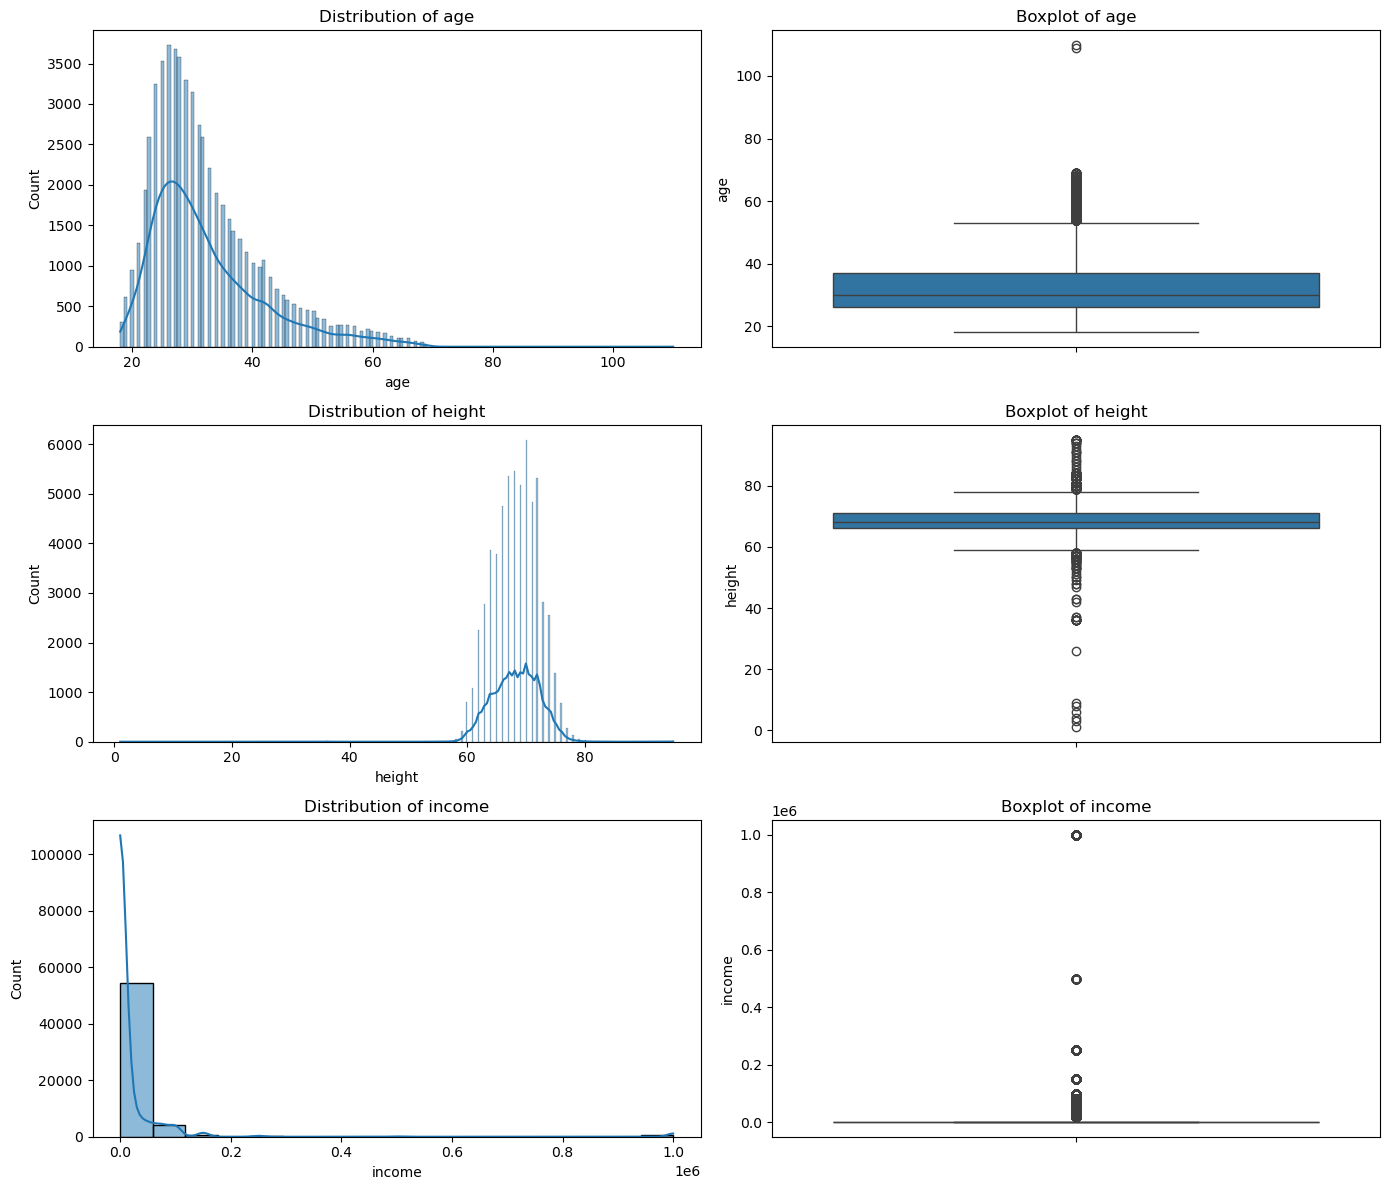

In [4]:
numeric_cols = ['age', 'height', 'income']
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(14, 4*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    if col in df.columns:
        # Histogram
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution of {col}')
        
        # Boxplot
        sns.boxplot(y=df[col].dropna(), ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

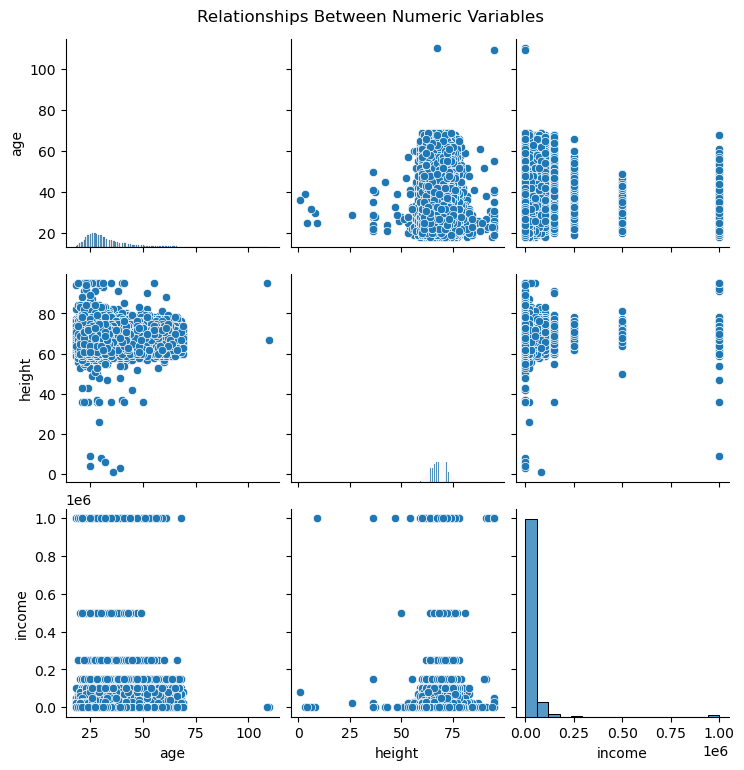

In [5]:
numeric_df = df[numeric_cols].dropna()
sns.pairplot(numeric_df)
plt.suptitle('Relationships Between Numeric Variables', y=1.02)
plt.show()

/tmp/ipykernel_59421/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


<Figure size 1200x1000 with 0 Axes>

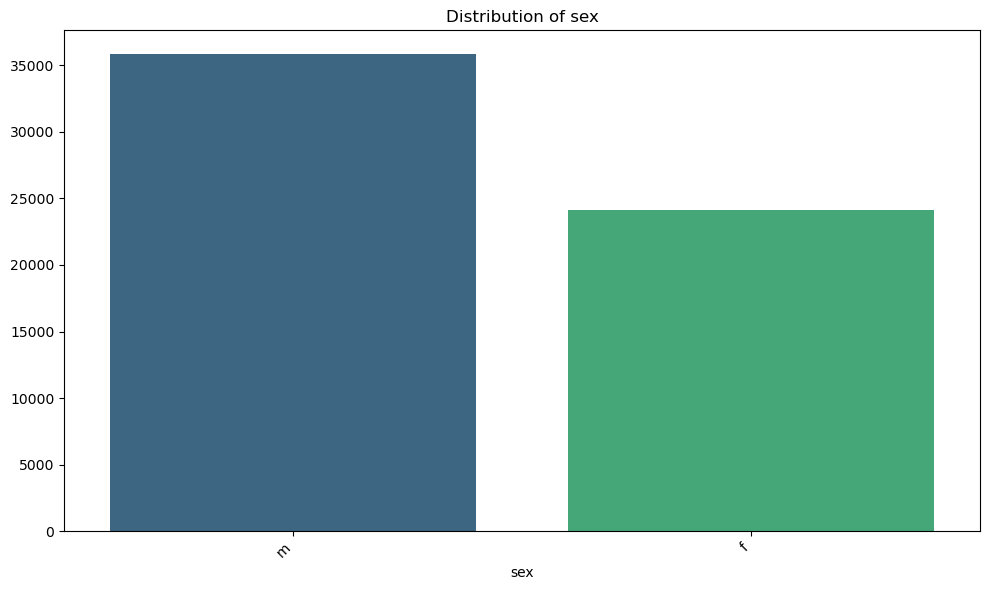

/tmp/ipykernel_59421/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


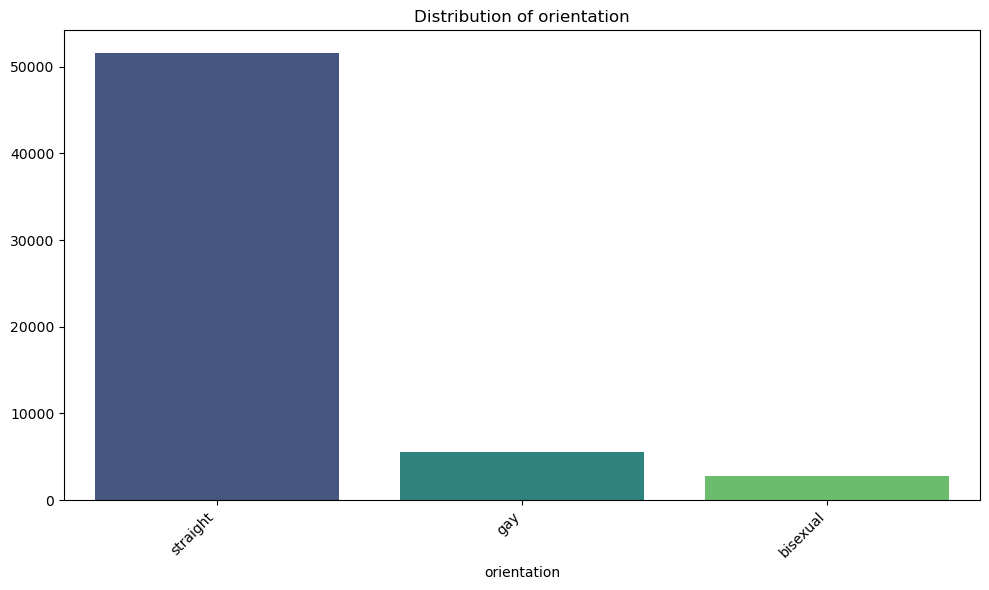

/tmp/ipykernel_59421/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


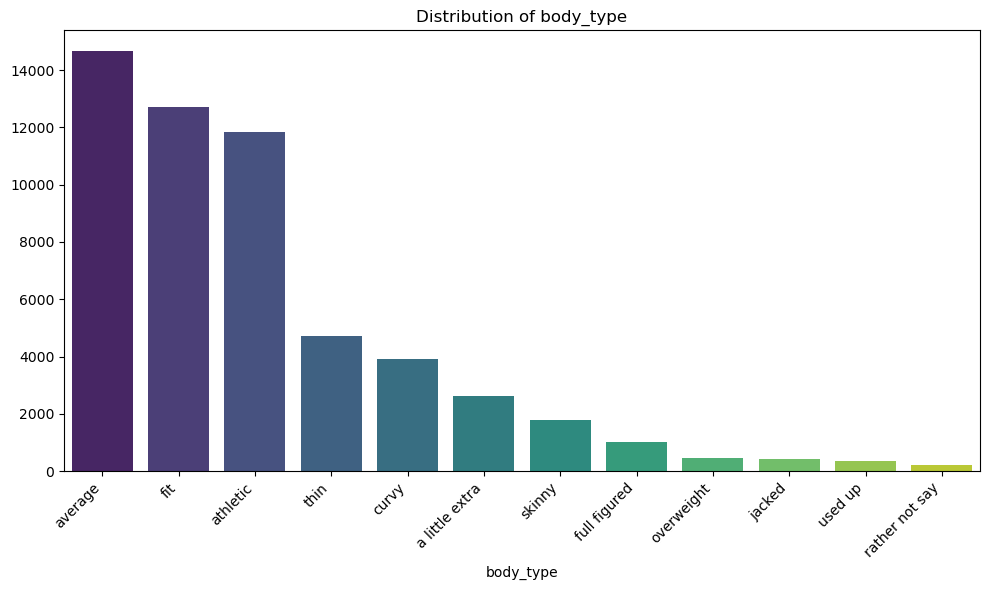

/tmp/ipykernel_59421/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


Skipping diet: too many categories (18)


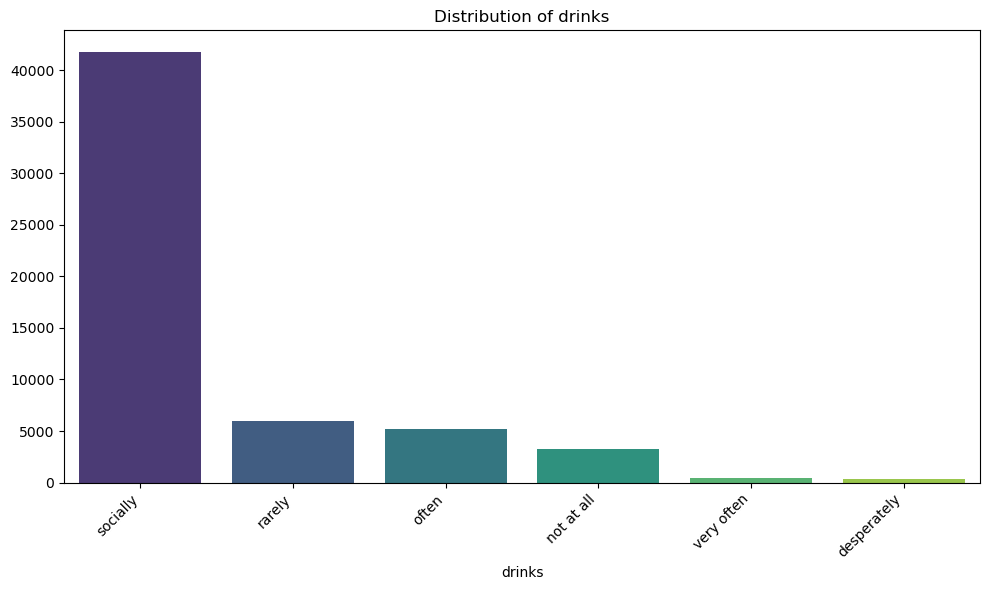

/tmp/ipykernel_59421/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


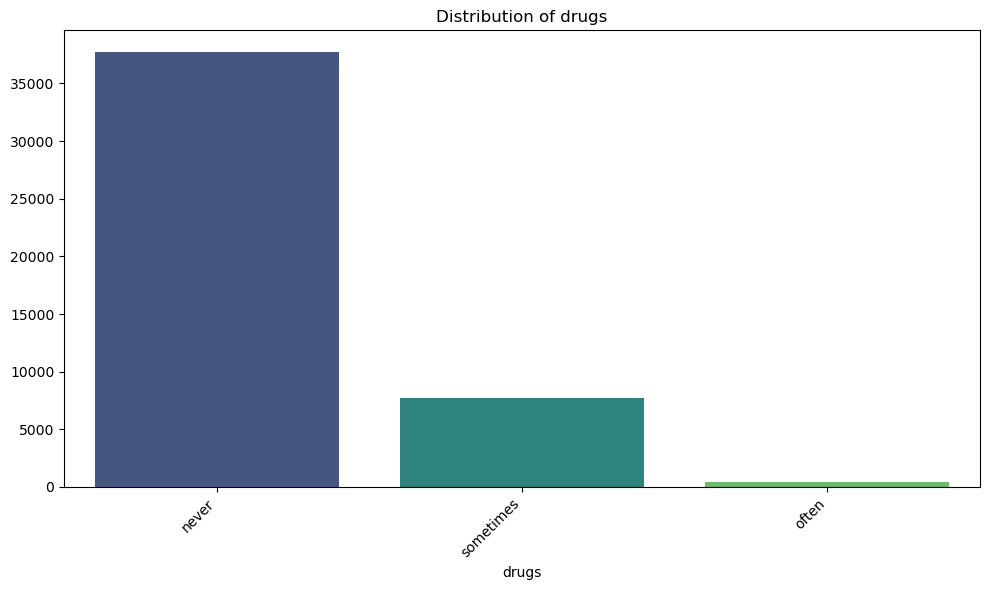

/tmp/ipykernel_59421/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


Skipping education: too many categories (32)
Skipping job: too many categories (21)


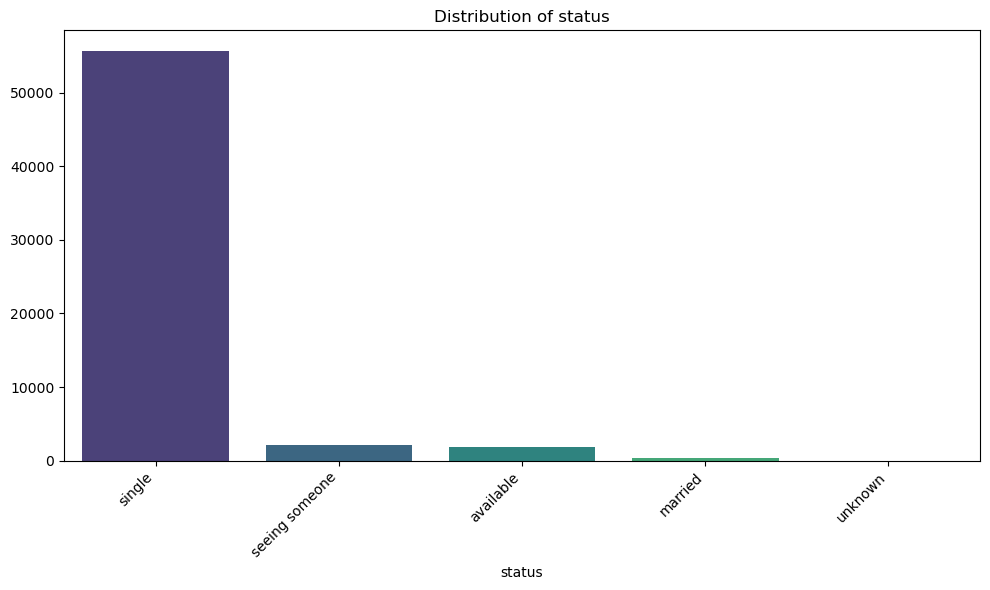

/tmp/ipykernel_59421/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


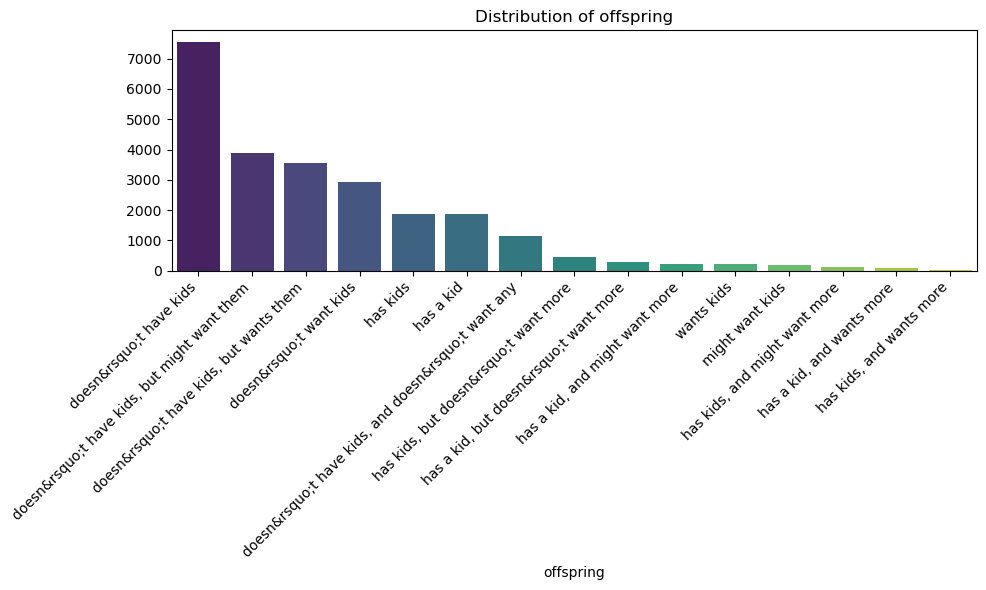

/tmp/ipykernel_59421/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


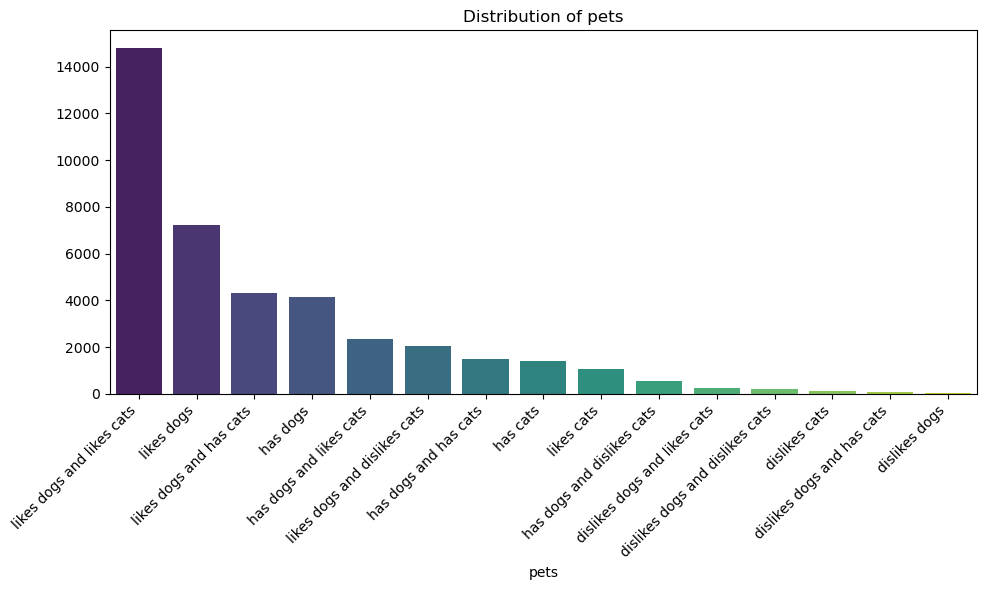

Skipping speaks: too many categories (7647)


In [6]:
categorical_cols = ['sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'status', 'offspring', 'pets', 'speaks']
plt.figure(figsize=(12, 10))

for col in categorical_cols:
    if col in df.columns:
        # Check the number of unique values
        n_unique = df[col].nunique()
        
        if n_unique > 15:  # Too many categories
            print(f"Skipping {col}: too many categories ({n_unique})")
            continue
            
        plt.figure(figsize=(10, 6))
        value_counts = df[col].value_counts().sort_values(ascending=False)
        
        # Plot top categories
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


essay0: 90.8% filled, avg length: 616.8 chars
essay1: 87.4% filled, avg length: 235.3 chars
essay2: 83.9% filled, avg length: 145.6 chars
essay3: 80.9% filled, avg length: 73.7 chars
essay4: 82.4% filled, avg length: 563.1 chars
essay5: 81.9% filled, avg length: 120.8 chars
essay6: 77.0% filled, avg length: 117.2 chars
essay7: 79.2% filled, avg length: 94.3 chars
essay8: 67.9% filled, avg length: 74.7 chars
essay9: 79.0% filled, avg length: 158.6 chars


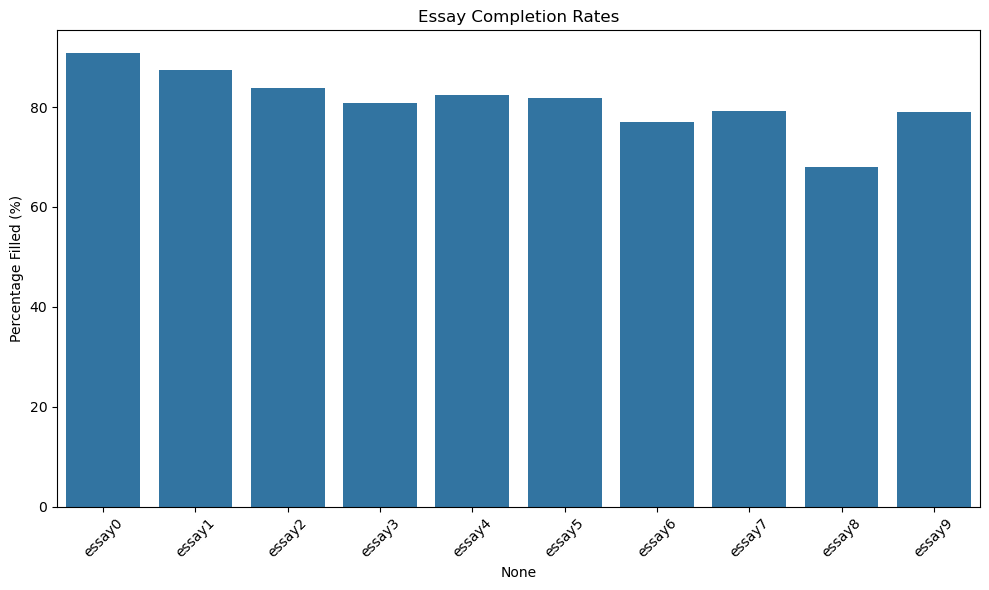

In [7]:
essay_cols = [col for col in df.columns if col.startswith('essay')]
essay_lengths = pd.DataFrame()

for col in essay_cols:
    # Calculate non-null percentage
    non_null_pct = (df[col].notnull().mean() * 100)
    # Calculate average length of text
    df[f'{col}_length'] = df[col].fillna('').astype(str).apply(len)
    
    print(f"{col}: {non_null_pct:.1f}% filled, avg length: {df[f'{col}_length'].mean():.1f} chars")

# Visualize essay completion rates
plt.figure(figsize=(10, 6))
completion_rates = pd.Series({col: df[col].notnull().mean() * 100 for col in essay_cols})
sns.barplot(x=completion_rates.index, y=completion_rates.values)
plt.title('Essay Completion Rates')
plt.ylabel('Percentage Filled (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Function to get coordinates with error handling and rate limiting
def get_coordinates(location_name, geolocator, delay=1):
    """
    Get latitude and longitude for a location with error handling and rate limiting
    """
    try:
        time.sleep(delay)  # Rate limiting
        if pd.isna(location_name) or location_name == '':
            return None, None
        
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except (GeocoderTimedOut, GeocoderServiceError):
        return None, None
    

# Create a sample of the data to avoid too many geocoding requests
# In a real project, you'd save these results to avoid repeated API calls
location_sample = df['location'].dropna().sample(n=min(100, len(df['location'].dropna())))

# Initialize geocoder
geolocator = Nominatim(user_agent="okcupid_project")

# Create DataFrame to store coordinates
geo_df = pd.DataFrame(location_sample)
geo_df['latitude'] = None
geo_df['longitude'] = None

# Geocode the locations
print("Geocoding locations (this may take a while due to rate limiting)...")
for idx, row in tqdm(geo_df.iterrows(), total=len(geo_df)):
    lat, lon = get_coordinates(row['location'], geolocator)
    geo_df.at[idx, 'latitude'] = lat
    geo_df.at[idx, 'longitude'] = lon

# Remove rows with failed geocoding
geo_df = geo_df.dropna(subset=['latitude', 'longitude'])

# Display the results
print(f"Successfully geocoded {len(geo_df)} out of {len(location_sample)} locations")
geo_df.head()

# Create a map to visualize the locations
map_center = [geo_df['latitude'].mean(), geo_df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=4)

# Add a marker cluster to handle many points more efficiently
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers for each location
for idx, row in geo_df.iterrows():
    popup_text = f"Location: {row['location']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text
    ).add_to(marker_cluster)

# Display the map
mymap

Geocoding locations (this may take a while due to rate limiting)...


  0%|          | 0/100 [00:00<?, ?it/s]

Successfully geocoded 100 out of 100 locations


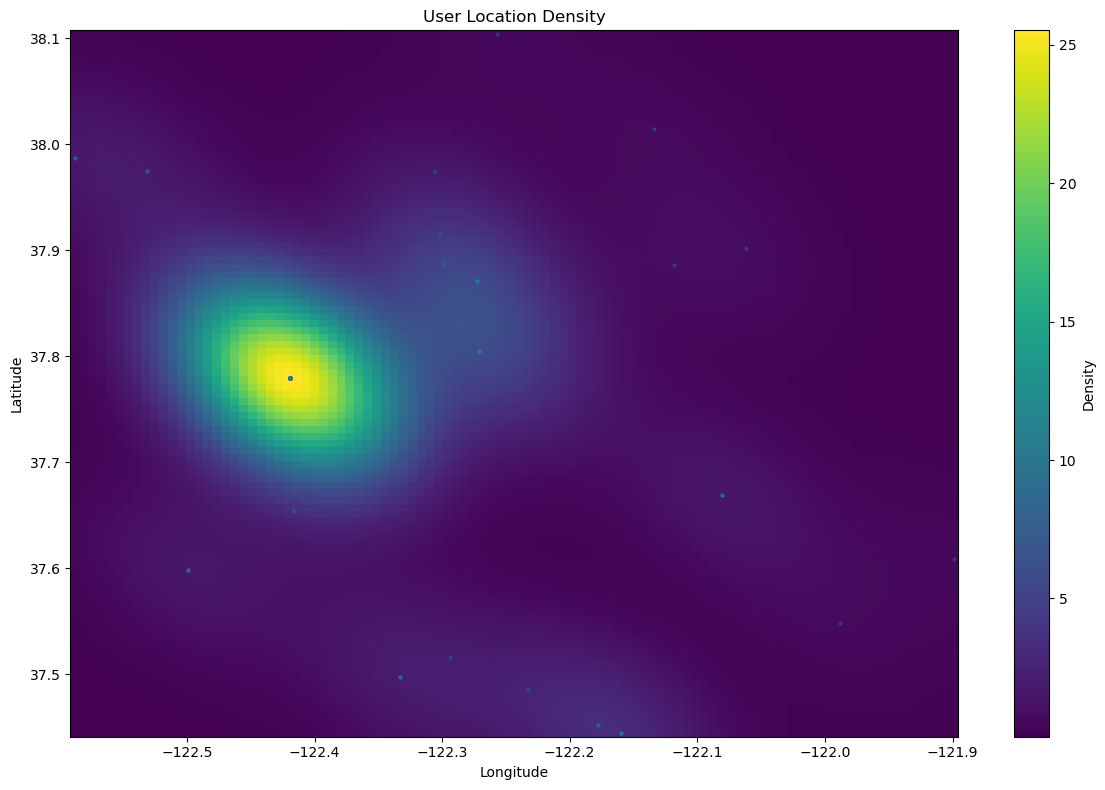

In [9]:
# Calculate location density using kernel density estimation
if len(geo_df) > 5:  # Need sufficient points for meaningful KDE
    
    # Ensure longitude and latitude are numeric
    geo_df['longitude'] = pd.to_numeric(geo_df['longitude'], errors='coerce')
    geo_df['latitude'] = pd.to_numeric(geo_df['latitude'], errors='coerce')
    
    # Drop rows with NaN values after conversion
    geo_df = geo_df.dropna(subset=['longitude', 'latitude'])
    
    # Create a KDE of the locations
    x = geo_df['longitude']
    y = geo_df['latitude']
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot the KDE
    plt.figure(figsize=(12, 8))
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='viridis')
    plt.colorbar(label='Density')
    plt.scatter(x, y, s=5, alpha=0.3)
    plt.title('User Location Density')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

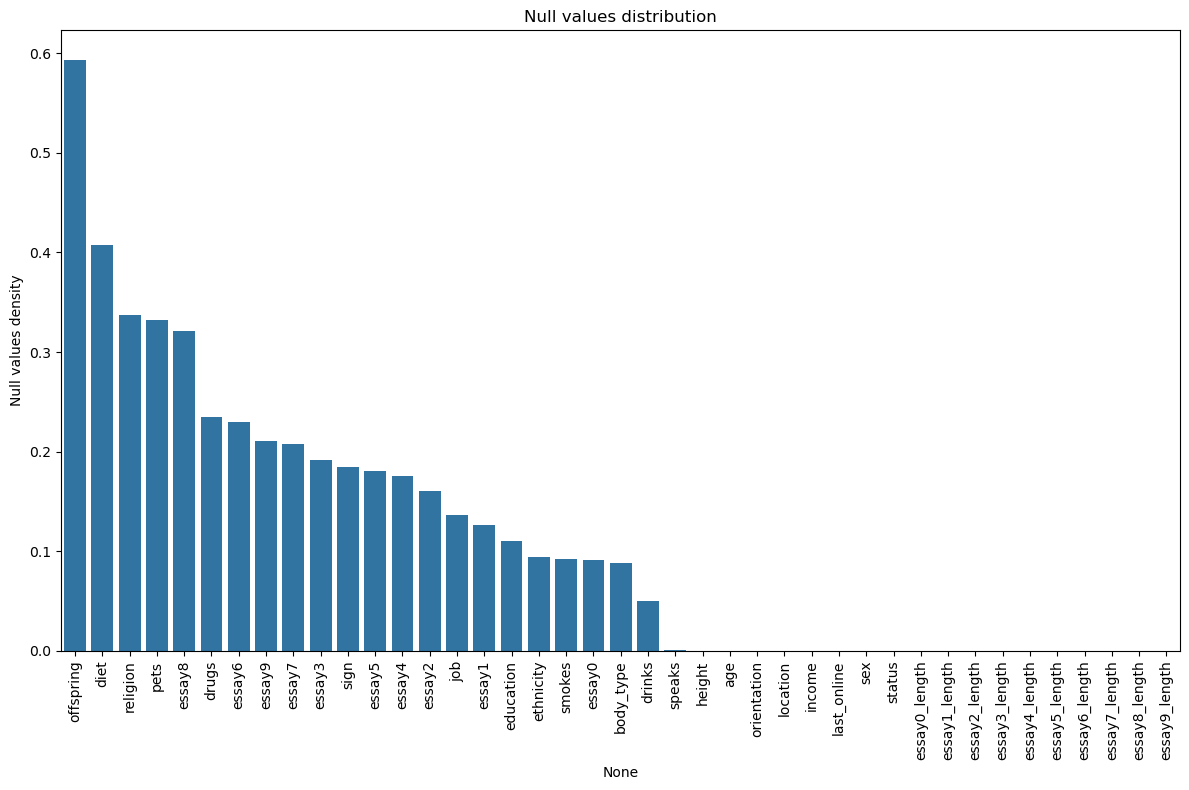

In [10]:
# Data Cleaning Strategy
# Calculate percentage of null values in each column
missing_data = df.isnull().mean().sort_values(ascending=False)

# Plot the missing data percentages
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.ylabel('Null values density')
plt.title('Null values distribution')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

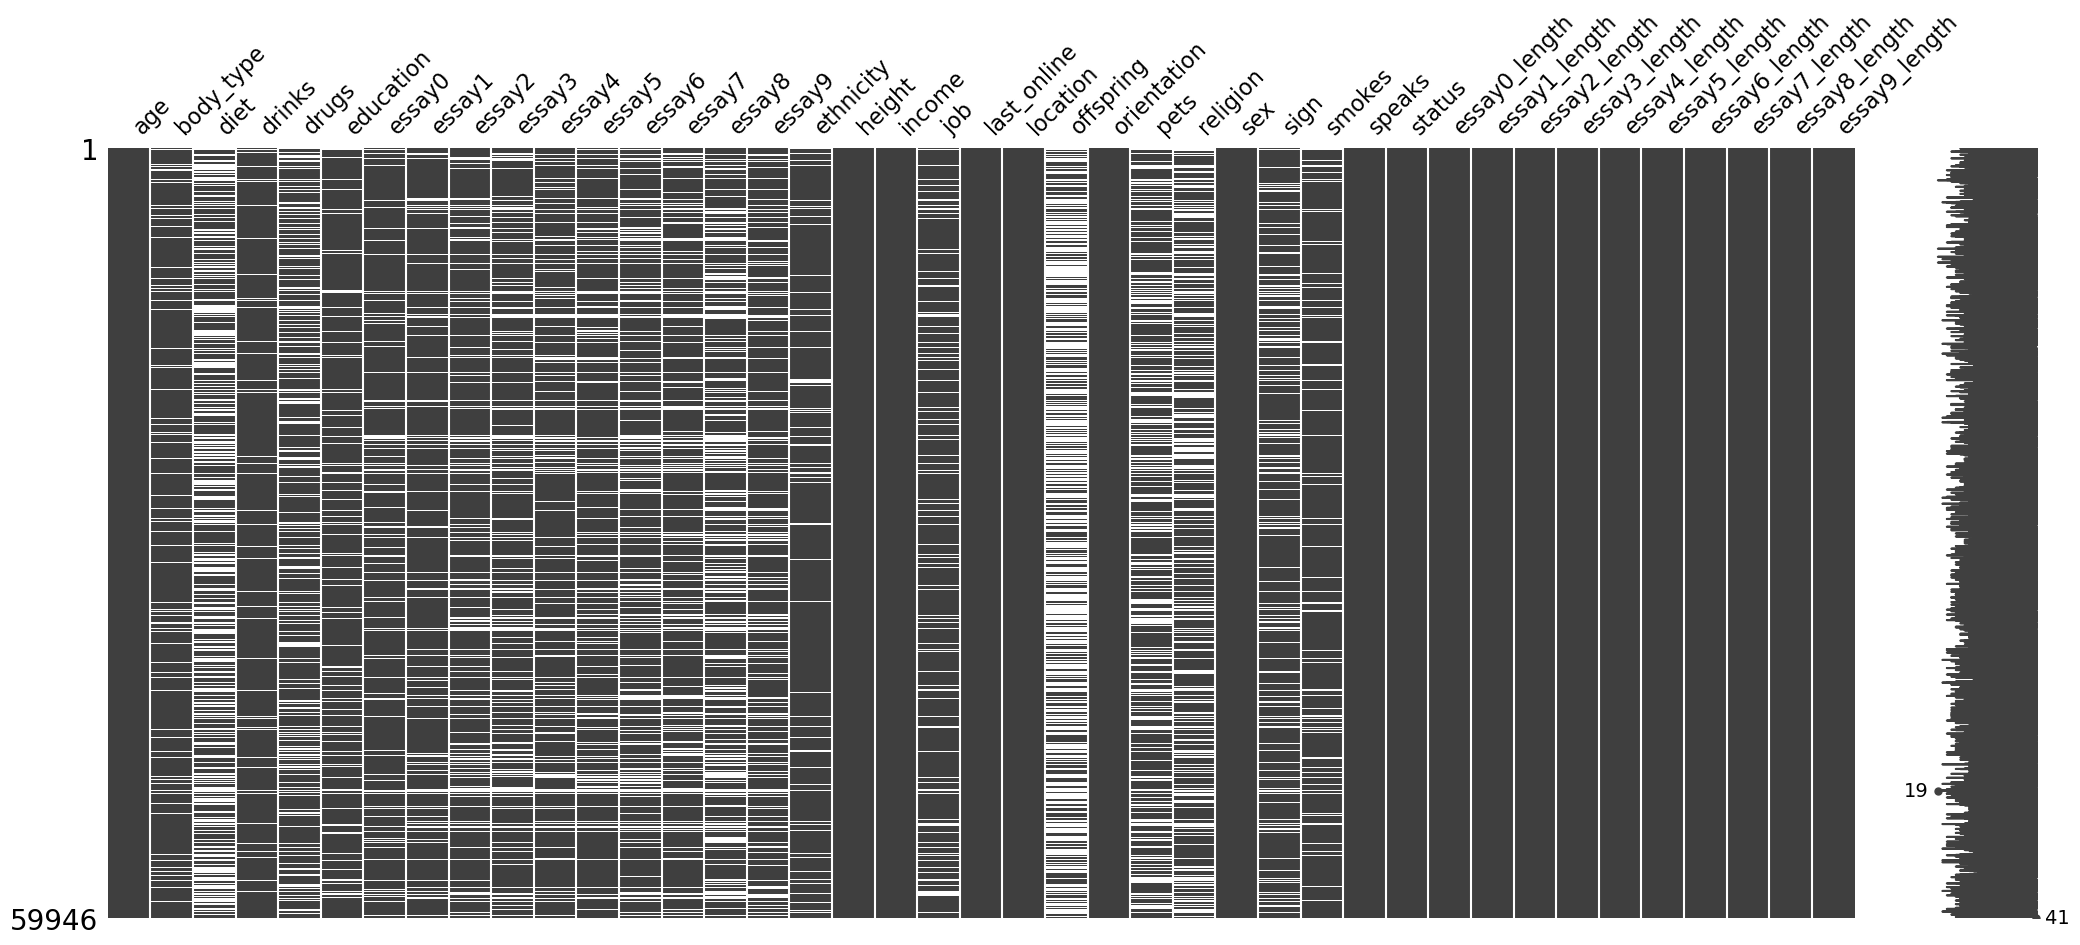

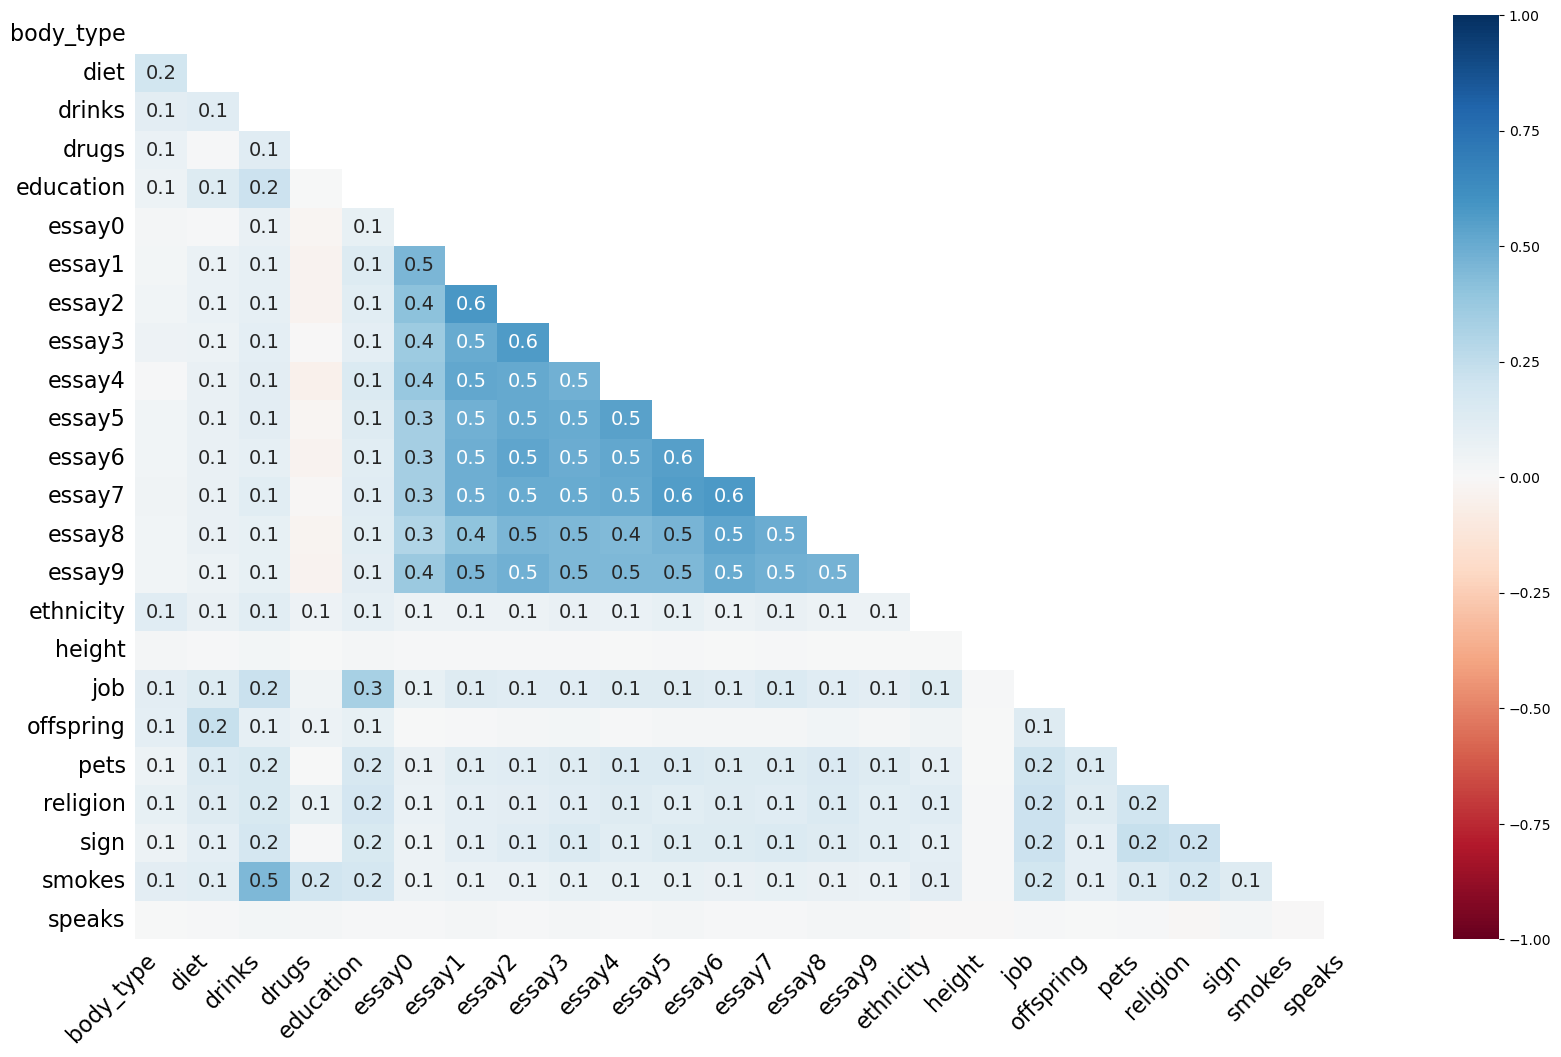

In [11]:

plt.figure()
msno.matrix(df)
plt.savefig('missing_values2.png')
msno.heatmap(df)
plt.savefig('missing_values.png')
plt.show()

Missing Data Summary:
               missing_count  missing_percent
offspring              35561        59.321723
diet                   24395        40.694959
religion               20226        33.740366
pets                   19921        33.231575
essay8                 19225        32.070530
drugs                  14080        23.487806
essay6                 13771        22.972342
essay9                 12603        21.023922
essay7                 12451        20.770360
essay3                 11476        19.143896
sign                   11056        18.443266
essay5                 10850        18.099623
essay4                 10537        17.577486
essay2                  9638        16.077803
job                     8198        13.675641
essay1                  7572        12.631368
education               6628        11.056618
ethnicity               5680         9.475194
smokes                  5512         9.194942
essay0                  5488         9.154906
body_type   

<Figure size 1200x800 with 0 Axes>

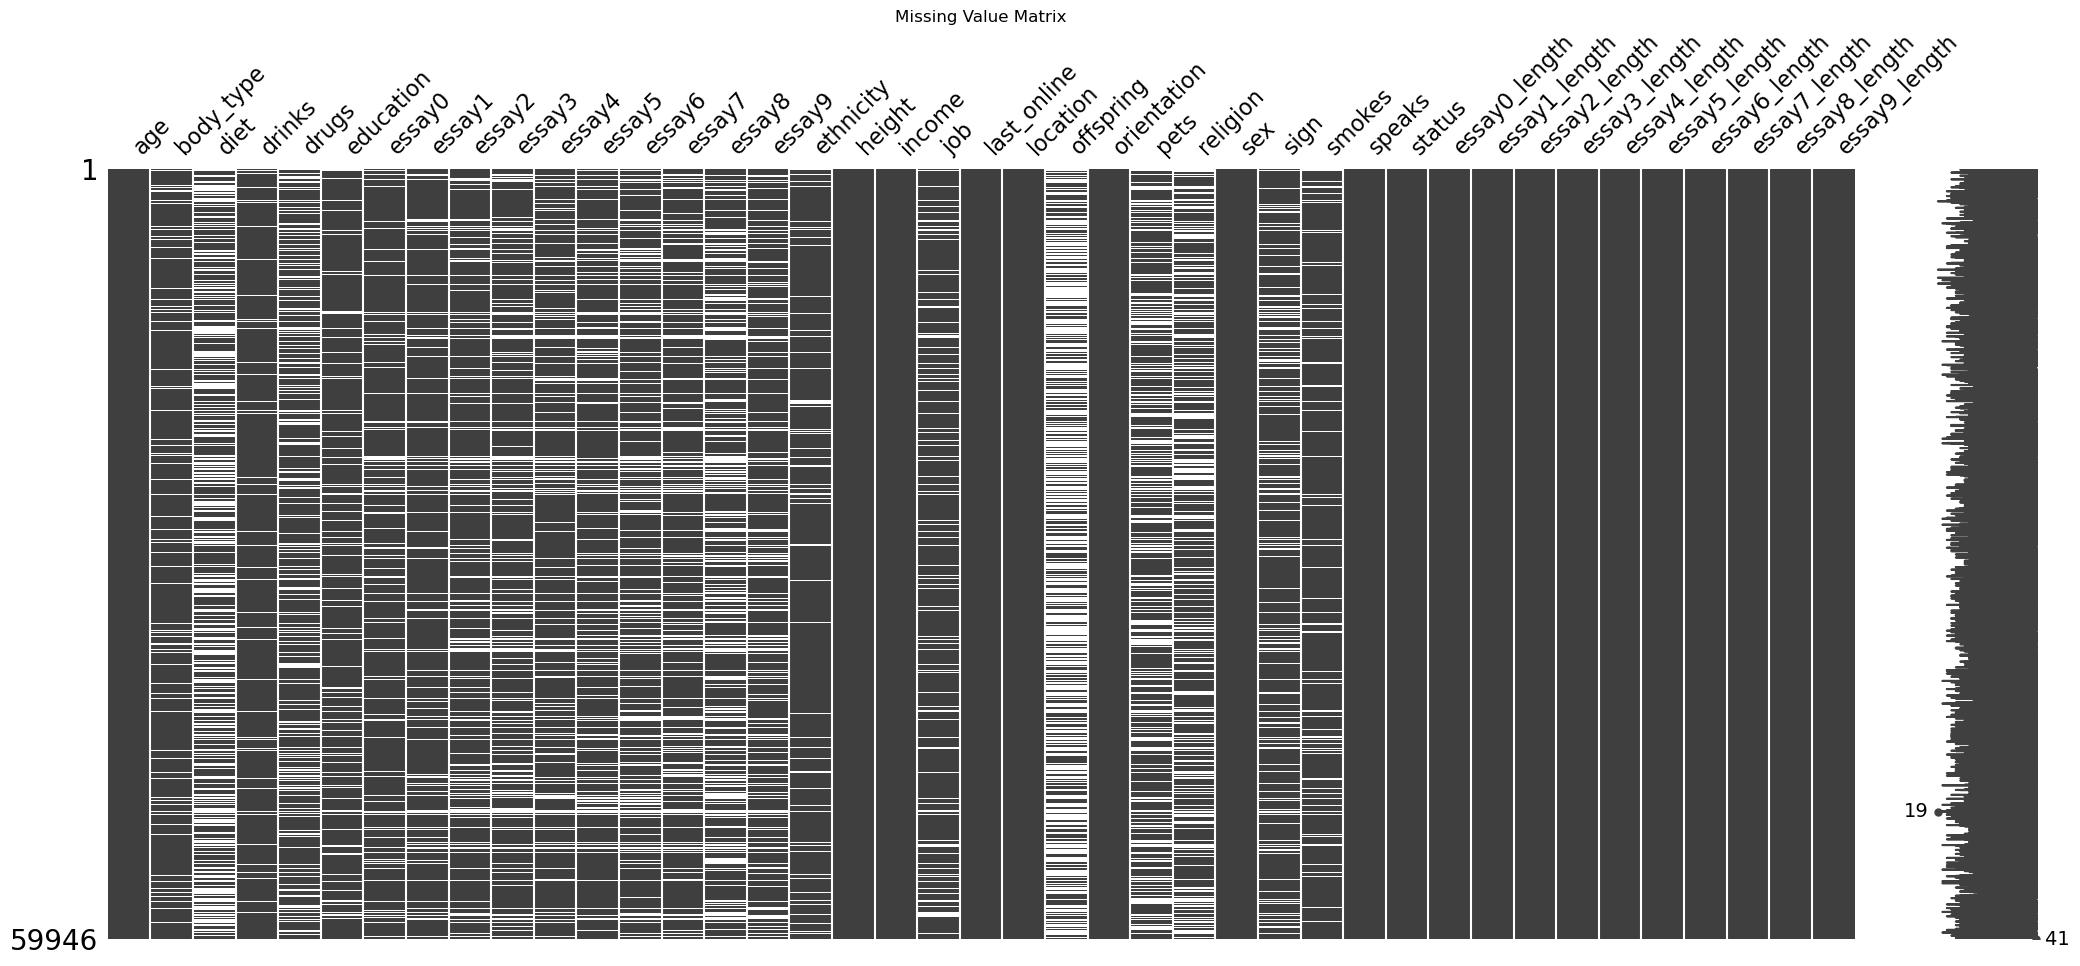


Testing for MCAR patterns:
Performed 299 tests of MCAR pattern
Found 277 significant relationships between missingness and values
Proportion significant: 92.64%

Top relationships between missingness and values (challenging MCAR assumption):
   missing_col      value_col  t_statistic  p_value  significant
76      essay0  essay8_length   -49.109202      0.0         True
77      essay0  essay9_length   -68.159523      0.0         True
69      essay0  essay1_length   -60.532425      0.0         True
68      essay0  essay0_length  -213.325665      0.0         True
75      essay0  essay7_length   -62.300070      0.0         True
74      essay0  essay6_length   -49.078939      0.0         True
71      essay0  essay3_length   -55.891655      0.0         True
70      essay0  essay2_length   -68.589687      0.0         True
73      essay0  essay5_length   -44.840456      0.0         True
72      essay0  essay4_length   -63.386658      0.0         True

Likelihood data is MCAR: 7.36%
Data is li

In [12]:
def check_mar_correlations(df):
    """Check correlations between values and missingness indicators"""
    # Select only numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Create binary indicators for missingness
    missing_indicators = df.isna().astype(int)
    
    # Add '_missing' suffix to column names
    missing_indicators.columns = [f"{col}_missing" for col in df.columns]
    
    # Combine numeric data with missing indicators
    combined = pd.concat([numeric_df, missing_indicators], axis=1)
    
    # Calculate correlations
    corr_matrix = combined.corr()
    
    # Find significant correlations between missingness and values
    significant_correlations = []
    
    for col in numeric_df.columns:
        for miss_col in missing_indicators.columns:
            if col != miss_col.replace('_missing', ''):  # Don't compare a column with its own missingness
                if col in corr_matrix.index and miss_col in corr_matrix.columns:
                    corr_value = corr_matrix.loc[col, miss_col]
                    if not np.isnan(corr_value) and abs(corr_value) > 0.3:  # Threshold for meaningful correlation
                        significant_correlations.append({
                            'value_column': col,
                            'missing_column': miss_col,
                            'correlation': corr_value
                        })
    
    return pd.DataFrame(significant_correlations).sort_values('correlation', ascending=False)

def logistic_regression_test(df, target_column):
    """Test if missingness in target_column can be predicted by other variables"""
    
    # Skip if column has no missing values
    if df[target_column].isna().sum() == 0:
        return {'is_predictable': False, 'message': 'No missing values in column'}
    
    # Create a binary indicator for missingness in the target column
    missing_indicator = df[target_column].isna().astype(int)
    
    # Create features from other columns, imputing missing values
    features = df.drop(columns=[target_column])
    
    # Skip if no features available
    if features.shape[1] == 0:
        return {'is_predictable': False, 'message': 'No features available'}
    
    # Impute missing values in features
    imputer = SimpleImputer(strategy='median')
    try:
        features_imputed = pd.DataFrame(
            imputer.fit_transform(features),
            columns=features.columns
        )
    except:
        return {'is_predictable': False, 'message': 'Failed to impute values'}
    
    # Fit logistic regression
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    try:
        model.fit(features_imputed, missing_indicator)
        
        # Calculate scores
        score = model.score(features_imputed, missing_indicator)
        
        # Get feature importances
        coefficients = pd.DataFrame({
            'feature': features.columns,
            'coefficient': model.coef_[0]
        }).sort_values('coefficient', ascending=False)
        
        return {
            'score': score,
            'coefficients': coefficients,
            'is_predictable': score > 0.7,  # Threshold suggesting MAR
            'message': f'Model score: {score:.3f}'
        }
    except Exception as e:
        return {'is_predictable': False, 'message': f'Model fitting failed: {str(e)}'}

def manual_mcar_test(df):
    """
    Manual implementation to test MCAR hypothesis
    This checks if missingness in one variable is related to values in other variables
    """
    # Create missingness indicators
    missing_indicators = df.isna().astype(int)
    
    # Only test numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # For each pair of columns, test if missingness in one is related to values in another
    results = []
    
    for col1 in df.columns:
        # Only test columns with sufficient missing values
        if missing_indicators[col1].sum() < 10 or missing_indicators[col1].sum() > len(df) - 10:
            continue
            
        for col2 in numeric_cols:
            if col1 != col2:
                # Split data based on whether col1 is missing
                missing_in_col1 = missing_indicators[col1] == 1
                present_in_col1 = ~missing_in_col1
                
                # Get values of col2 where col1 is missing vs present
                values_when_col1_missing = df.loc[missing_in_col1, col2].dropna()
                values_when_col1_present = df.loc[present_in_col1, col2].dropna()
                
                # If enough data to compare
                if len(values_when_col1_missing) > 5 and len(values_when_col1_present) > 5:
                    try:
                        # t-test to see if the distributions differ
                        t_stat, p_val = stats.ttest_ind(
                            values_when_col1_missing,
                            values_when_col1_present,
                            equal_var=False  # Welch's t-test
                        )
                        
                        results.append({
                            'missing_col': col1,
                            'value_col': col2,
                            't_statistic': t_stat,
                            'p_value': p_val,
                            'significant': p_val < 0.05
                        })
                    except:
                        pass  # Skip if test fails
    
    result_df = pd.DataFrame(results)
    
    # If we have results, summarize them
    if len(result_df) > 0:
        significant_tests = result_df[result_df['significant'] == True]
        
        print(f"Performed {len(result_df)} tests of MCAR pattern")
        print(f"Found {len(significant_tests)} significant relationships between missingness and values")
        
        if len(result_df) > 0:
            print(f"Proportion significant: {len(significant_tests) / len(result_df):.2%}")
        
        if len(significant_tests) > 0:
            print("\nTop relationships between missingness and values (challenging MCAR assumption):")
            print(significant_tests.sort_values('p_value').head(10))
            
            mcar_likelihood = 1 - (len(significant_tests) / len(result_df))
            print(f"\nLikelihood data is MCAR: {mcar_likelihood:.2%}")
            
            if mcar_likelihood > 0.95:
                print("Data appears to be MCAR (Missing Completely At Random)")
            elif mcar_likelihood > 0.8:
                print("Data may be MCAR, but there are some patterns challenging this assumption")
            else:
                print("Data is likely not MCAR - could be MAR or MNAR")
        else:
            print("No significant relationships found. Data may be MCAR.")
            
        return result_df
    else:
        print("Could not perform enough tests to determine MCAR pattern")
        return None

def missing_pattern_by_features(df, column_of_interest=None):
    """
    Examine if missing values are related to specific features
    If column_of_interest is provided, focuses on that column's missingness
    """
    if column_of_interest is None:
        # Count missing values per row
        missingness = df.isna().sum(axis=1)
        plt.figure(figsize=(10, 6))
        plt.hist(missingness, bins=30)
        plt.title('Missing Values Per Row')
        plt.xlabel('Number of Missing Values')
        plt.ylabel('Count of Rows')
        plt.show()
    else:
        # Focus on specified column's missingness
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        numeric_cols = [col for col in numeric_cols if col != column_of_interest]
        
        # Only proceed if we have numeric columns to analyze
        if not numeric_cols:
            print("No numeric columns available for analysis")
            return
            
        # Create indicator for missingness
        missing_indicator = df[column_of_interest].isna()
        
        # Test for differences in other columns based on missingness
        for col in numeric_cols[:5]:  # Limit to 5 columns for brevity
            plt.figure(figsize=(8, 6))
            sns.histplot(
                data=df, x=col, hue=missing_indicator,
                element="step", common_norm=False, stat="density",
                bins=20
            )
            plt.title(f'Distribution of {col} by {column_of_interest} Missingness')
            plt.show()
            
            # Calculate means
            mean_when_missing = df.loc[missing_indicator, col].mean()
            mean_when_present = df.loc[~missing_indicator, col].mean()
            print(f"Mean of {col} when {column_of_interest} is missing: {mean_when_missing:.2f}")
            print(f"Mean of {col} when {column_of_interest} is present: {mean_when_present:.2f}")
            
            # T-test
            try:
                t_stat, p_val = stats.ttest_ind(
                    df.loc[missing_indicator, col].dropna(),
                    df.loc[~missing_indicator, col].dropna()
                )
                print(f"T-test p-value: {p_val:.4f} {'(significant)' if p_val < 0.05 else ''}\n")
            except:
                print("Could not perform t-test\n")

def analyze_missing_patterns(df):
    """Run a comprehensive analysis of missing data patterns"""
    
    # Basic missing data summary
    missing_summary = pd.DataFrame({
        'missing_count': df.isna().sum(),
        'missing_percent': df.isna().sum() / len(df) * 100
    }).sort_values('missing_percent', ascending=False)
    
    print("Missing Data Summary:")
    print(missing_summary)
    
    # Visualize missing patterns
    try:
        import missingno as msno
        plt.figure(figsize=(12, 8))
        msno.matrix(df)
        plt.title('Missing Value Matrix')
        plt.show()
    except:
        print("Could not import missingno. Skipping visualization.")
    
    # Test for MCAR patterns
    print("\nTesting for MCAR patterns:")
    mcar_results = manual_mcar_test(df)
    
    # Check for MAR through correlations
    print("\nChecking for MAR through correlations:")
    mar_correlations = check_mar_correlations(df)
    if len(mar_correlations) > 0:
        print("Found significant correlations between values and missingness:")
        print(mar_correlations.head(10))  # Show top 10
        print("This suggests data may be MAR (Missing At Random)")
    else:
        print("No significant correlations found between values and missingness patterns")
    
    # For columns with substantial missing data, try logistic regression
    columns_to_test = missing_summary[missing_summary['missing_percent'] > 10].index.tolist()
    
    mar_evidence = []
    print("\nTesting if missingness can be predicted (MAR check):")
    for col in columns_to_test[:5]:  # Limit to first 5 columns with significant missingness
        print(f"Testing column: {col}")
        result = logistic_regression_test(df, col)
        print(f"  Result: {result.get('message', '')}")
        if result.get('is_predictable', False):
            print(f"  ✓ Missingness in '{col}' appears to be MAR - predictable from other variables")
            mar_evidence.append(col)
        else:
            print(f"  ✗ Missingness in '{col}' is not strongly predictable from other variables")
    
    # Summary
    print("\nSUMMARY:")
    if mar_evidence:
        print(f"- Found evidence of MAR in columns: {', '.join(mar_evidence)}")
    

analyze_missing_patterns(df)

### Missing Values Analysis
By analyzing the missing values in datataframe and performing hypotesis test, we have significant evidences that missing data are MAR especially in essay columns. With this, we can use multiple inputation to complete data.

In [13]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# FOR NUMERICAL VARIABLES
num_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
    # Removed add_indicator=True which was causing the shape mismatch
)

# Create dictionary for column-specific constraints 
bounds = {
    'age': [18, 100],
    'height': [120, 220],  # in cm
    'income': [0, 250000]
}


# Apply the imputation with constraints
df_numeric = pd.DataFrame(
    num_imputer.fit_transform(df[numeric_columns]),
    columns=numeric_columns
)

# Apply bounds to ensure realistic imputed values
for col, (lower, upper) in bounds.items():
    if col in df_numeric.columns:
        df_numeric[col] = np.clip(df_numeric[col], lower, upper)

# FOR CATEGORICAL COLUMNS
essay_columns = [col for col in categorical_columns if col.startswith('essay')]
standard_cat_columns = [col for col in categorical_columns if not col.startswith('essay')]

# Encode the categorical variables
cat_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded_cats = pd.DataFrame(
    cat_encoder.fit_transform(df[standard_cat_columns]),
    columns=standard_cat_columns
)

# Use KNN imputation for categorical data (after encoding)
cat_imputer = KNNImputer(n_neighbors=5, weights='distance')
imputed_cats = pd.DataFrame(
    cat_imputer.fit_transform(encoded_cats),
    columns=standard_cat_columns
)

df_categorical = pd.DataFrame(
    cat_encoder.inverse_transform(imputed_cats),
    columns=standard_cat_columns
)

# For essays, use a specialized approach
for col in essay_columns:
    # Leave truly empty essays as empty strings
    df_categorical[col] = df[col].fillna("")
    
    # prompt_texts = {"essay0": "About me:", "essay1": "What I'm doing with my life:", ...}
    # df_categorical[col] = df[col].fillna(prompt_texts.get(col, "No information provided"))

df_categorical = pd.concat([df_categorical, df[essay_columns].fillna("")], axis=1)

# Recombine the datasets
df_imputed = pd.concat([df_numeric, df_categorical], axis=1)

In [14]:
print(df_imputed.isnull().sum())

age              0
height           0
income           0
essay0_length    0
essay1_length    0
essay2_length    0
essay3_length    0
essay4_length    0
essay5_length    0
essay6_length    0
essay7_length    0
essay8_length    0
essay9_length    0
body_type        0
diet             0
drinks           0
drugs            0
education        0
ethnicity        0
job              0
last_online      0
location         0
offspring        0
orientation      0
pets             0
religion         0
sex              0
sign             0
smokes           0
speaks           0
status           0
essay0           0
essay1           0
essay2           0
essay3           0
essay4           0
essay5           0
essay6           0
essay7           0
essay8           0
essay9           0
essay0           0
essay1           0
essay2           0
essay3           0
essay4           0
essay5           0
essay6           0
essay7           0
essay8           0
essay9           0
dtype: int64


In [15]:
# Explore the unique values and their frequencies
for field in ['job', 'education']:
    print(f"\n{field.upper()} - Top 20 most common values:")
    value_counts = df_imputed[field].value_counts()
    print(value_counts.head(20))
    print(f"Total unique values: {len(value_counts)}")


JOB - Top 20 most common values:
job
other                                8319
student                              4886
science / tech / engineering         4862
computer / hardware / software       4861
medicine / health                    4692
sales / marketing / biz dev          4454
artistic / musical / writer          4446
education / academia                 3986
executive / management               3225
entertainment / media                2932
law / legal services                 2391
hospitality / travel                 2381
banking / financial / real estate    2288
construction / craftsmanship         1322
political / government               1176
military                             1093
clerical / administrative             870
rather not say                        723
retired                               400
transportation                        366
Name: count, dtype: int64
Total unique values: 21

EDUCATION - Top 20 most common values:
education
graduated from college

In [16]:
def normalize_text(text):
    """Normalize text by converting to lowercase and removing special characters"""
    if pd.isna(text) or text == '':
        return None
    # Convert to lowercase and remove extra whitespace
    text = str(text).lower().strip()
    # Remove special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text

def standardize_job_categories(df):
    """Create standardized job categories from free-text job field"""
    # Create a copy of the original column
    df['job_original'] = df['job']
    df['job_standardized'] = df['job'].apply(normalize_text)
    
    # Create mappings for common job categories
    job_mappings = {
        # Technology
        'software|developer|programmer|engineer.*comput|web developer': 'software_engineer',
        'data.*scien|machine learning|ai|artificial intelligence': 'data_scientist',
        'system.*admin|network|it support|technical support': 'it_support',
        
        # Healthcare
        'doctor|physician|surgeon': 'medical_doctor',
        'nurse|nursing': 'nurse',
        'dentist|dental': 'dentist',
        'therap|psycholog|counsel': 'therapist',
        
        # Education
        'teacher|professor|instructor|lecturer': 'educator',
        'student': 'student',
        'researcher|scientist(?!.*data)': 'researcher',
        
        # Business
        'manag(?!.*project)|director|executive|ceo|cfo|coo': 'management',
        'sales|marketing': 'sales_marketing',
        'consult': 'consultant',
        'financ|accountant|bookkeep': 'finance',
        
        # Creative
        'design|graphic|artist|architect': 'designer_artist',
        'writer|editor|journalist': 'writer',
        'photograph': 'photographer',
        'music|musician': 'musician',
        
        # Service
        'retail|cashier|clerk|barista': 'retail',
        'chef|cook|baker|restaurant': 'food_service',
        'bartend|server|waiter|waitress': 'hospitality',
        
        # Other
        'unemployed|between jobs': 'unemployed',
        'self.*employed|entrepreneur|freelance': 'self_employed',
        'retired': 'retired',
        'rather not say|private|secret': 'undisclosed'
    }
    
    # Apply mappings
    standardized = df['job_standardized'].copy()
    for pattern, category in job_mappings.items():
        mask = standardized.str.contains(pattern, case=False, na=False, regex=True)
        standardized.loc[mask] = category
    
    # If any job wasn't matched by the patterns, keep it as 'other'
    standardized.fillna('other', inplace=True)
    
    # Update the dataframe
    df['job_category'] = standardized
    
    return df

def standardize_education_categories(df):
    """Create standardized education categories from free-text education field"""
    # Create a copy of the original column
    df['education_original'] = df['education']
    df['education_standardized'] = df['education'].apply(normalize_text)
    
    # Create mappings for education levels
    education_mappings = {
        'high school|secondary|ged': 'high_school',
        'college|university|undergrad|bachelor|associate': 'bachelors',
        'master|graduate|mba|ms |ma ': 'masters',
        'phd|doctorate|doctor|jd|md ': 'doctorate',
        'dropped out|some college|some university': 'some_college',
        'trade|vocational|technical': 'vocational',
        'school of hard knocks|university of life': 'alternative',
        'space camp': 'alternative',
        'med school|medical school': 'medical_school',
        'law school': 'law_school'
    }
    
    # Apply mappings
    standardized = df['education_standardized'].copy()
    for pattern, category in education_mappings.items():
        mask = standardized.str.contains(pattern, case=False, na=False, regex=True)
        standardized.loc[mask] = category
    
    # If any education wasn't matched by the patterns, mark as 'other'
    standardized.fillna('other', inplace=True)
    
    # Update the dataframe
    df['education_level'] = standardized
    
    return df

Job Categories Distribution:
job_category
other                         8319
student                       4886
science tech engineering      4862
software_engineer             4861
medicine health               4692
sales_marketing               4454
designer_artist               4446
education academia            3986
management                    3225
researcher                    2932
law legal services            2391
hospitality travel            2381
finance                       2288
construction craftsmanship    1322
political government          1176
military                      1093
clerical administrative        870
undisclosed                    723
retired                        400
transportation                 366
unemployed                     273
Name: count, dtype: int64

Education Level Distribution:
education_level
bachelors                  36063
masters                    17729
high_school                 2835
working on ph d program      983
some_college      

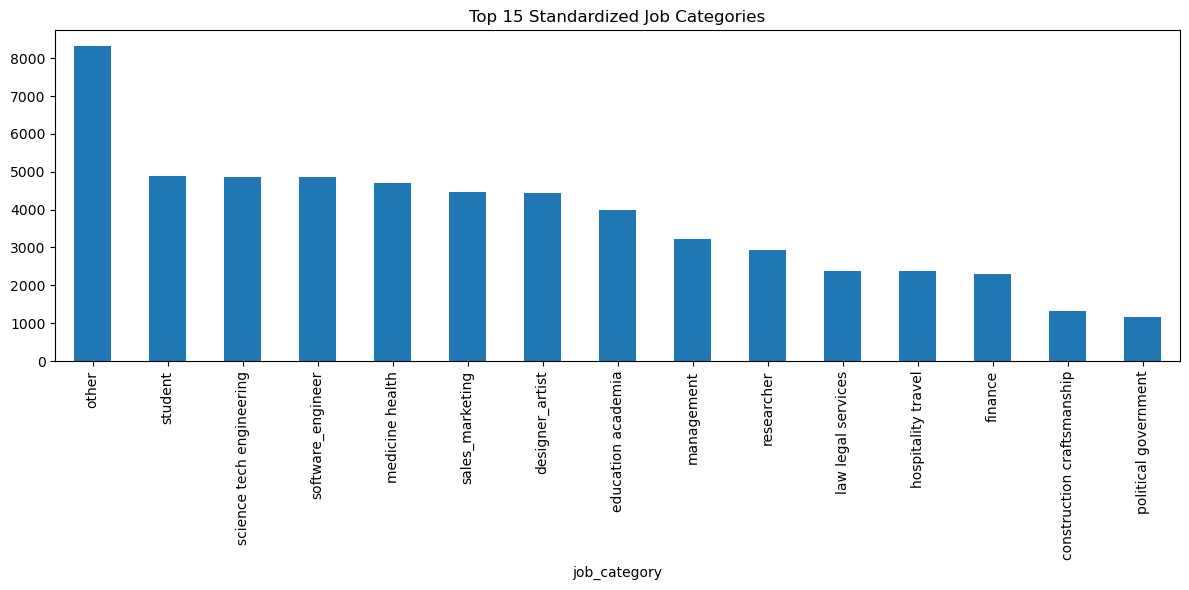

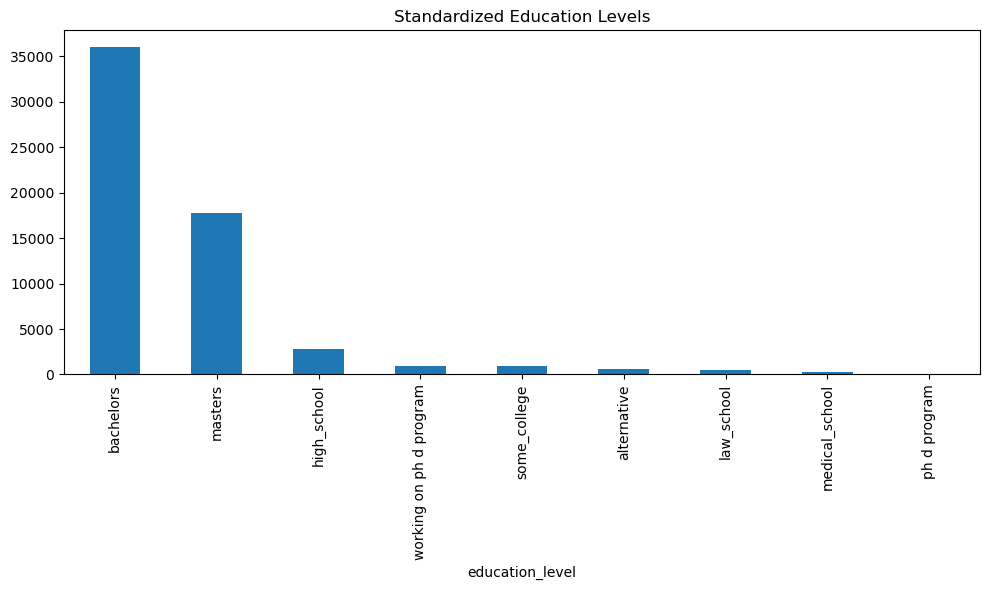

In [17]:
# Apply both standardization functions
df_imputed = standardize_job_categories(df_imputed)
df_imputed = standardize_education_categories(df_imputed)

# Verify the results
print("Job Categories Distribution:")
print(df_imputed['job_category'].value_counts())

print("\nEducation Level Distribution:")
print(df_imputed['education_level'].value_counts())

# Plot the distributions
plt.figure(figsize=(12, 6))
df_imputed['job_category'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Standardized Job Categories')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
df_imputed['education_level'].value_counts().plot(kind='bar')
plt.title('Standardized Education Levels')
plt.tight_layout()
plt.show()

In [18]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/olavo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/olavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/olavo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
def preprocess_essays(df, essay_cols=None):
    """
    Preprocess essay text data and extract features
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing essay columns
    essay_cols : list, optional
        List of essay column names to process
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with additional essay features
    """
    processed_df = df.copy()

    if essay_cols is None:
        essay_cols = [col for col in df.columns if col.startswith('essay') and not col.endswith('_length')]

    # Initialize NLTK resources once
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def clean_essay(text):
        if not isinstance(text, str) or text.strip() == '':
            return ''
        
        try:
            # Use more robust HTML parsing with error handling
            text = BeautifulSoup(text, 'html.parser').get_text()
        except Exception as e:
            # Just keep going if BeautifulSoup fails
            print(f"BeautifulSoup error: {e}")
        
        # Clean text
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        text = re.sub(r'[^\w\s.,!?]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    # Process each essay column
    for col in essay_cols:
        print(f"Processing {col}...")
        
        # Clean text
        processed_df[f'{col}_clean'] = processed_df[col].apply(clean_essay)
        
        # Initialize feature lists
        word_counts, sentence_counts, avg_word_lengths = [], [], []
        flesch_scores, lemmatized_texts, token_lists = [], [], []
        
        # Process each essay
        for text in processed_df[f'{col}_clean']:
            if not isinstance(text, str) or text.strip() == '':
                # Handle empty or invalid text
                word_counts.append(0)
                sentence_counts.append(0)
                avg_word_lengths.append(0)
                flesch_scores.append(0)
                lemmatized_texts.append('')
                token_lists.append([])
                continue
                
            # Tokenize and analyze
            tokens = word_tokenize(text.lower())
            filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
            sentences = sent_tokenize(text)
            
            # Calculate metrics
            word_count = len(tokens)
            sentence_count = len(sentences)
            avg_word_length = sum(len(word) for word in tokens) / max(1, word_count)
            
            # Calculate readability with error handling
            try:
                flesch_score = textstat.flesch_reading_ease(text)
            except Exception:
                flesch_score = 0
                
            # Append to feature lists
            word_counts.append(word_count)
            sentence_counts.append(sentence_count)
            avg_word_lengths.append(avg_word_length)
            flesch_scores.append(flesch_score)
            lemmatized_texts.append(' '.join(filtered_tokens))
            token_lists.append(filtered_tokens)
            
        # Add features to dataframe
        processed_df[f'{col}_word_count'] = word_counts
        processed_df[f'{col}_sentence_count'] = sentence_counts
        processed_df[f'{col}_avg_word_length'] = avg_word_lengths
        processed_df[f'{col}_flesch_reading_ease'] = flesch_scores
        processed_df[f'{col}_lemmatized'] = lemmatized_texts
        processed_df[f'{col}_tokens'] = token_lists
    
    # Calculate aggregate metrics
    processed_df['total_essay_word_count'] = processed_df[[f'{col}_word_count' for col in essay_cols]].sum(axis=1)
    processed_df['avg_essay_reading_ease'] = processed_df[[f'{col}_flesch_reading_ease' for col in essay_cols]].mean(axis=1)
    
    # Calculate essay completion metrics
    completed_essays = (processed_df[[f'{col}_word_count' for col in essay_cols]] > 0).sum(axis=1)
    processed_df['essay_completion_count'] = completed_essays
    processed_df['essay_completion_rate'] = completed_essays / len(essay_cols)
    
    return processed_df

In [20]:
def extract_topics_and_entities(df, essay_cols=None, max_rows=None):
    """
    Extract topics and named entities from preprocessed essays
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with preprocessed essays
    essay_cols : list, optional
        List of essay column names to process
    max_rows : int, optional
        Maximum number of rows to process (for debugging)
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with additional topic and entity features
    """
    # If essay columns not specified, find all columns starting with 'essay'
    if essay_cols is None:
        essay_cols = [col for col in df.columns if col.startswith('essay') and not col.endswith(('_clean', '_lemmatized', '_tokens'))]
    
    result_df = df.copy()
    
    # Limit rows for debugging if specified
    if max_rows is not None:
        result_df = result_df.head(max_rows)
    
    # Common topics in dating profiles
    topic_keywords = {
        'travel': ['travel', 'journey', 'trip', 'adventure', 'abroad', 'backpack', 'explore', 'wander', 'vacation', 'destination'],
        'food': ['food', 'eat', 'restaurant', 'cook', 'cuisine', 'recipe', 'dinner', 'lunch', 'breakfast', 'meal', 'chef', 'bake'],
        'fitness': ['gym', 'workout', 'exercise', 'fit', 'run', 'yoga', 'hike', 'climb', 'swim', 'bike', 'marathon', 'training'],
        'music': ['music', 'band', 'concert', 'song', 'album', 'play', 'guitar', 'piano', 'singing', 'singer'],
        'movies': ['movie', 'film', 'cinema', 'theater', 'actress', 'actor', 'director', 'watch', 'hollywood', 'show', 'series'],
        'books': ['book', 'read', 'author', 'novel', 'story', 'literature', 'fiction', 'nonfiction', 'chapter', 'library'],
        'art': ['art', 'paint', 'draw', 'artist', 'museum', 'gallery', 'creative', 'design', 'photography'],
        'technology': ['tech', 'computer', 'software', 'hardware', 'programming', 'code', 'developer', 'internet', 'digital', 'startup'],
        'family': ['family', 'parent', 'child', 'kid', 'mom', 'dad', 'mother', 'father', 'sister', 'brother', 'sibling'],
        'education': ['school', 'college', 'university', 'degree', 'student', 'learn', 'study', 'class', 'education', 'academic']
    }
    
    # Process each essay to identify topics
    for col in essay_cols:
        clean_col = f'{col}_clean'
        if clean_col not in result_df.columns:
            print(f"Warning: {clean_col} not found. Run preprocess_essays first.")
            continue
        
        # Identify topics - more efficient approach
        for topic, keywords in topic_keywords.items():
            # Create a set of keywords for faster lookup
            keyword_set = set(keywords)
            result_df[f'{col}_{topic}_score'] = result_df[clean_col].apply(
                lambda x: sum(word in keyword_set for word in x.lower().split()) if isinstance(x, str) and x else 0
            )
    
    # Create aggregate topic scores
    for topic in topic_keywords.keys():
        topic_cols = [col for col in result_df.columns if col.endswith(f'_{topic}_score')]
        if topic_cols:
            result_df[f'total_{topic}_score'] = result_df[topic_cols].sum(axis=1)
    
    return result_df

# Main execution function with progress tracking and error handling
def process_essay_data(df, essay_cols=None, max_rows=None, skip_entity_extraction=True):
    """
    Process essay data with progress tracking and error handling
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing essay columns
    essay_cols : list, optional
        List of essay column names to process
    max_rows : int, optional
        Maximum number of rows to process (for debugging)
    skip_entity_extraction : bool, default=True
        Whether to skip the entity extraction (which can be slow)
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with additional essay features
    """
    try:
        # Download all necessary NLTK resources at once
        resources = ['punkt', 'stopwords', 'wordnet']
        if not skip_entity_extraction:
            resources.extend(['averaged_perceptron_tagger', 'maxent_ne_chunker', 'words'])
            
        for resource in resources:
            try:
                nltk.download(resource, quiet=True)
            except Exception as e:
                print(f"Error downloading {resource}: {e}")
        
        print("NLTK resources downloaded successfully")
        
        # Process essay columns - ensure we have no duplicates
        if essay_cols is None:
            essay_cols = [col for col in df.columns if col.startswith('essay') and not col.endswith(('_length', '_clean', '_lemmatized', '_tokens'))]
        
        print(f"Processing {len(essay_cols)} essay columns")
        
        # Remove duplicates from dataframe if any exist
        df = df.loc[:, ~df.columns.duplicated()]
        
        # Limit rows for debugging if specified
        if max_rows is not None:
            df = df.head(max_rows)
            print(f"Limited to {max_rows} rows for testing")
        
        # Apply text preprocessing pipeline
        print("Starting essay preprocessing...")
        df_processed = preprocess_essays(df, essay_cols)
        print("Essay preprocessing completed")
        
        # Extract topics (and entities if not skipped)
        print("Starting topic extraction...")
        df_processed = extract_topics_and_entities(df_processed, essay_cols, max_rows)
        print("Topic extraction completed")
        
        # Display summary of text features
        text_feature_cols = [col for col in df_processed.columns if any(col.endswith(suffix) for suffix in ['_word_count', '_reading_ease', '_score'])]
        print("\nText Feature Summary:")
        print(df_processed[text_feature_cols].describe().T.sort_values('mean', ascending=False).head(10))
        
        return df_processed
        
    except Exception as e:
        print(f"Error in essay processing: {str(e)}")
        import traceback
        traceback.print_exc()
        return df

In [21]:

# use the process_essay_data function
# which consolidates all the steps with better error handling and progress tracking
df_processed = process_essay_data(
    df=df_imputed,
    essay_cols=None,  # Will automatically find essay columns
    max_rows=None,    # Process all rows (set a number for testing)
    skip_entity_extraction=False  # Set to True if entity extraction is too slow
)

# If you want more control over individual steps, you can use this approach instead:
"""
# Download all necessary NLTK resources at once
resources = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'maxent_ne_chunker', 'words']
for resource in resources:
    try:
        nltk.download(resource, quiet=True)
    except Exception as e:
        print(f"Error downloading {resource}: {e}")

print("NLTK resources downloaded successfully")

# Process essay columns - ensure we have no duplicates
essay_cols = [col for col in df_imputed.columns if col.startswith('essay') and not col.endswith(('_length', '_clean', '_lemmatized', '_tokens'))]
print(f"Processing {len(essay_cols)} essay columns")

# Remove duplicates from dataframe if any exist
df_imputed = df_imputed.loc[:, ~df_imputed.columns.duplicated()]

# Apply text preprocessing pipeline to extract features
df_processed = preprocess_essays(df_imputed, essay_cols)
print("Essay preprocessing completed")

# Extract topics and named entities - added max_rows parameter
# You can set max_rows to a small number for testing
df_processed = extract_topics_and_entities(df_processed, essay_cols, max_rows=None)
print("Topic and entity extraction completed")
"""

# Display summary of text features
text_feature_cols = [col for col in df_processed.columns if any(col.endswith(suffix) for suffix in ['_word_count', '_reading_ease', '_score'])]
print("\nText Feature Summary:")
summary = df_processed[text_feature_cols].describe().T.sort_values('mean', ascending=False).head(10)
print(summary)

# Save the processed dataframe
df_processed.to_csv('processed_essays.csv', index=False)

NLTK resources downloaded successfully
Processing 20 essay columns
Starting essay preprocessing...
Processing essay0...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay1...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay2...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay3...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay4...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay5...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay6...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay7...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay8...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay9...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay0...


/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_59421/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay1...
Processing essay2...
Processing essay3...
Processing essay4...
Processing essay5...
Processing essay6...
Processing essay7...
Processing essay8...
Processing essay9...
Essay preprocessing completed
Starting topic extraction...


/tmp/ipykernel_59421/1786059007.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'{col}_{topic}_score'] = result_df[clean_col].apply(
/tmp/ipykernel_59421/1786059007.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'{col}_{topic}_score'] = result_df[clean_col].apply(
/tmp/ipykernel_59421/1786059007.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

Topic extraction completed

Text Feature Summary:
                          count        mean         std  min    25%    50%  \
total_essay_word_count  59946.0  849.767591  700.132724  0.0  380.0  714.0   
essay0_word_count       59946.0  123.407583  137.912254  0.0   35.0   87.0   
essay4_word_count       59946.0  100.725086  114.659985  0.0   18.0   69.0   
essay1_word_count       59946.0   46.615020   57.132415  0.0   10.0   30.0   
essay9_word_count       59946.0   32.016548   52.237431  0.0    5.0   17.0   
essay2_word_count       59946.0   26.937961   35.831512  0.0    5.0   16.0   
essay6_word_count       59946.0   23.242068   38.916109  0.0    2.0   12.0   
essay5_word_count       59946.0   20.469856   28.213255  0.0    7.0   14.0   
essay7_word_count       59946.0   19.365979   23.234832  0.0    3.0   13.0   
essay3_word_count       59946.0   16.079271   23.706010  0.0    3.0    9.0   

                           75%      max  
total_essay_word_count  1148.0  24638.0  
essay0_

In [22]:
df_processed.columns

Index(['age', 'height', 'income', 'essay0_length', 'essay1_length',
       'essay2_length', 'essay3_length', 'essay4_length', 'essay5_length',
       'essay6_length',
       ...
       'total_travel_score', 'total_food_score', 'total_fitness_score',
       'total_music_score', 'total_movies_score', 'total_books_score',
       'total_art_score', 'total_technology_score', 'total_family_score',
       'total_education_score'],
      dtype='object', length=231)

In [23]:
print(df_processed['last_online'].head())

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object


In [24]:
df_copy = df_processed.copy()
df_processed['last_online'] = df_processed['last_online'].apply(lambda date_time: datetime.strptime(date_time, '%Y-%m-%d-%H-%M'))
print(df_processed.head())

    age  height   income  essay0_length  essay1_length  essay2_length  \
0  22.0   120.0      0.0         1287.0          259.0          126.0   
1  35.0   120.0  80000.0          691.0           52.0           96.0   
2  38.0   120.0      0.0         1416.0          557.0          460.0   
3  23.0   120.0  20000.0           41.0           41.0          100.0   
4  29.0   120.0      0.0          210.0           26.0          101.0   

   essay3_length  essay4_length  essay5_length  essay6_length  ...  \
0          124.0          459.0           51.0           27.0  ...   
1            0.0          249.0          306.0            0.0  ...   
2          258.0         2346.0           86.0            0.0  ...   
3           33.0          206.0            0.0           26.0  ...   
4           39.0          340.0            0.0            0.0  ...   

   total_travel_score  total_food_score  total_fitness_score  \
0                   0                 1                    0   
1           

In [25]:
print(df_processed['last_online'])

0       2012-06-28 20:30:00
1       2012-06-29 21:41:00
2       2012-06-27 09:10:00
3       2012-06-28 14:22:00
4       2012-06-27 21:26:00
                ...        
59941   2012-06-12 21:47:00
59942   2012-06-29 11:01:00
59943   2012-06-27 23:37:00
59944   2012-06-23 13:01:00
59945   2012-06-29 00:42:00
Name: last_online, Length: 59946, dtype: datetime64[ns]


In [26]:
############################################################################################################################################
############################################           Feature Engineering               ###################################################
############################################################################################################################################

# Demographic Features
print(df_processed['age'].head())

0    22.0
1    35.0
2    38.0
3    23.0
4    29.0
Name: age, dtype: float64


In [27]:
bins = list(range(int(df_processed['age'].min())//5 * 5, int(df_processed['age'].max())//5*5+5, 5))
df_processed['age'] = pd.cut(df_processed['age'].astype('int'), bins)

print(df_processed['age'].unique())

[(20, 25], (30, 35], (35, 40], (25, 30], (15, 20], ..., (50, 55], (55, 60], (60, 65], (65, 70], (95, 100]]
Length: 12
Categories (17, interval[int64, right]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (80, 85] < (85, 90] < (90, 95] < (95, 100]]


In [28]:
df_processed.columns

Index(['age', 'height', 'income', 'essay0_length', 'essay1_length',
       'essay2_length', 'essay3_length', 'essay4_length', 'essay5_length',
       'essay6_length',
       ...
       'total_travel_score', 'total_food_score', 'total_fitness_score',
       'total_music_score', 'total_movies_score', 'total_books_score',
       'total_art_score', 'total_technology_score', 'total_family_score',
       'total_education_score'],
      dtype='object', length=231)

In [29]:
lifestyle_columns = ['body_type', 'diet', 'drinks', 'education', 'smokes']
df_processed.status.unique()

array(['single', 'available', 'seeing someone', 'married', 'unknown'],
      dtype=object)

In [30]:
def create_lifestyle_indicators(df):
    """
    Create lifestyle composite indicators combining drinks, drugs, and smokes data
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing lifestyle columns (drinks, drugs, smokes)
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with added lifestyle indicators
    """
    # Make a copy to avoid modifying the original dataframe
    result_df = df.copy()
    
    # Define mappings for each lifestyle attribute
    drinks_mapping = {
        'not at all': 0,
        'rarely': 1,
        'socially': 2,
        'often': 3,
        'very often': 4,
        'desperately': 5
    }
    
    drugs_mapping = {
        'never': 0,
        'sometimes': 1,
        'often': 2
    }
    
    smoking_mapping = {
        'no': 0,
        'sometimes': 1,
        'when drinking': 2,
        'trying to quit': 3,
        'yes': 4
    }
    
    # Apply mappings to create numerical indicators
    columns_to_process = ['drinks', 'drugs', 'smokes']
    mappings = {
        'drinks': drinks_mapping,
        'drugs': drugs_mapping,
        'smokes': smoking_mapping
    }
    
    # Create numerical versions of each column
    for col in columns_to_process:
        if col in result_df.columns:
            # Create new column with '_score' suffix
            score_col = f'{col}_score'
            result_df[score_col] = result_df[col].map(mappings[col])
            
            # Fill missing values with median of non-missing values
            median_value = result_df[score_col].median()
            if pd.isna(median_value):  # If all values are NA
                median_value = 0
            result_df[score_col] = result_df[score_col].fillna(median_value)
    
    # Calculate total lifestyle score
    lifestyle_columns = [f'{col}_score' for col in columns_to_process 
                         if f'{col}_score' in result_df.columns]
    
    if lifestyle_columns:
        # Sum up scores
        result_df['lifestyle_score'] = 0.2*result_df['drinks_score'] + 0.4*result_df['drugs_score'] + 0.4*result_df['smokes_score']
        #result_df[lifestyle_columns].sum(axis=1)
        
        # Create categorized version
        # Adjust bin boundaries based on actual range of scores
        max_score = sum([
            max(mappings[col].values()) if col in result_df.columns else 0
            for col in columns_to_process
        ])
        
        # Create logical bin boundaries
        bins = [0, max_score / 3, 2 * max_score / 3, max_score]
        labels = ['Conservative', 'Moderate', 'Liberal']
        
        result_df['lifestyle_category'] = pd.cut(
            result_df['lifestyle_score'], 
            bins=bins, 
            labels=labels,
            include_lowest=True
        )
        
        # Calculate normalized score (0-1 scale)
        result_df['lifestyle_index'] = result_df['lifestyle_score'] / max_score
    
    return result_df

def analyze_lifestyle_patterns(df):
    """
    Analyze patterns in lifestyle indicators across demographics
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with lifestyle indicators
    """
    if 'lifestyle_category' not in df.columns:
        print("Run create_lifestyle_indicators first to generate lifestyle categories")
        return
    
    # Visualize lifestyle category distribution
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='lifestyle_category')
    
    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom')
                   
    plt.title('Distribution of Lifestyle Categories')
    plt.xlabel('Lifestyle Category')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Analyze relationships with age
    if 'age' in df.columns:
        plt.figure(figsize=(12, 7))
        if hasattr(df['age'], 'cat') or df['age'].dtype.name == 'category':
            # Age is already categorized
            ct = pd.crosstab(df['age'], df['lifestyle_category'], normalize='index')
            ct.plot(kind='bar', stacked=True, figsize=(12, 7))
            plt.title('Lifestyle Categories by Age Group')
            plt.legend(title='Lifestyle', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.xticks(rotation=45)
        else:
            # Create age groups if age is numeric
            sns.boxplot(x='lifestyle_category', y='age', data=df)
            plt.title('Age Distribution by Lifestyle Category')
        plt.tight_layout()
        plt.show()
    
    # Analyze relationships with sex
    if 'sex' in df.columns:
        plt.figure(figsize=(10, 6))
        cross_tab = pd.crosstab(df['sex'], df['lifestyle_category'])
        cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        ax = cross_tab_pct.plot(kind='bar', figsize=(10, 6))
        
        # Add percentage labels
        for i, container in enumerate(ax.containers):
            ax.bar_label(container, fmt='%.1f%%', padding=3)
            
        plt.title('Lifestyle Categories by Gender')
        plt.ylabel('Percentage')
        plt.legend(title='Lifestyle', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    
    # Show average scores for each component - IMPROVED VISUALIZATION
    lifestyle_cols = [col for col in df.columns if col.endswith('_score') and col != 'lifestyle_score']
    if lifestyle_cols:
        # Increase figure height to accommodate labels
        plt.figure(figsize=(10, max(6, len(lifestyle_cols) * 0.5)))
        
        # Get mean values and sort
        mean_scores = df[lifestyle_cols].mean().sort_values()
        
        # Create custom bar chart with better spacing
        ax = mean_scores.plot(kind='barh', color='steelblue')
        
        # Clean up the y-axis labels (remove "_score" suffix for readability)
        labels = [label.replace('_score', '') for label in mean_scores.index]
        ax.set_yticklabels(labels)
        
        # Add value labels at the end of each bar
        for i, v in enumerate(mean_scores):
            ax.text(v + 0.05, i, f'{v:.2f}', va='center')
        
        plt.title('Average Scores for Lifestyle Components')
        plt.xlabel('Average Score')
        
        # Add grid lines for better readability
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        # Ensure proper spacing
        plt.tight_layout()
        plt.show()

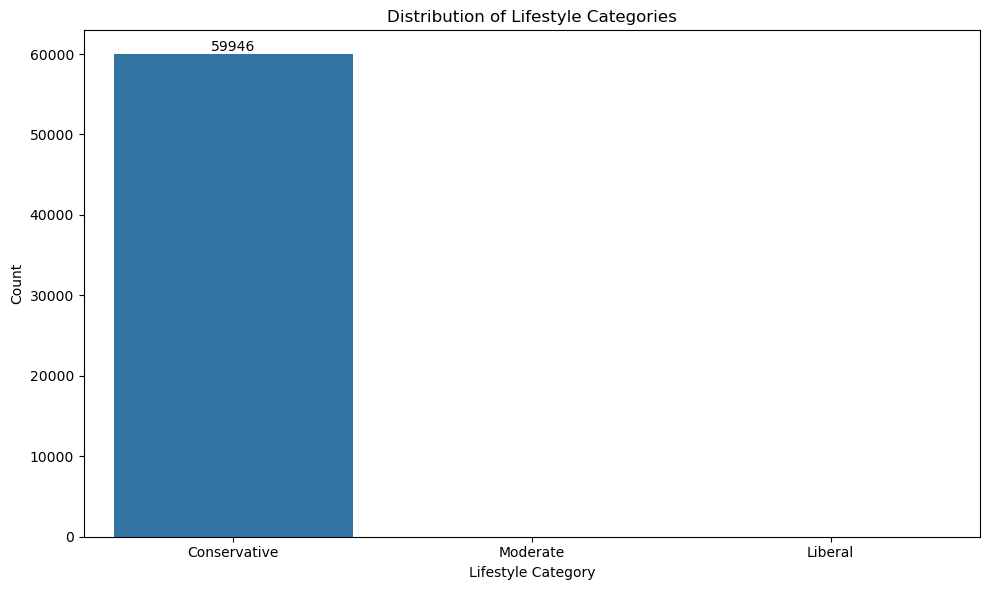

<Figure size 1200x700 with 0 Axes>

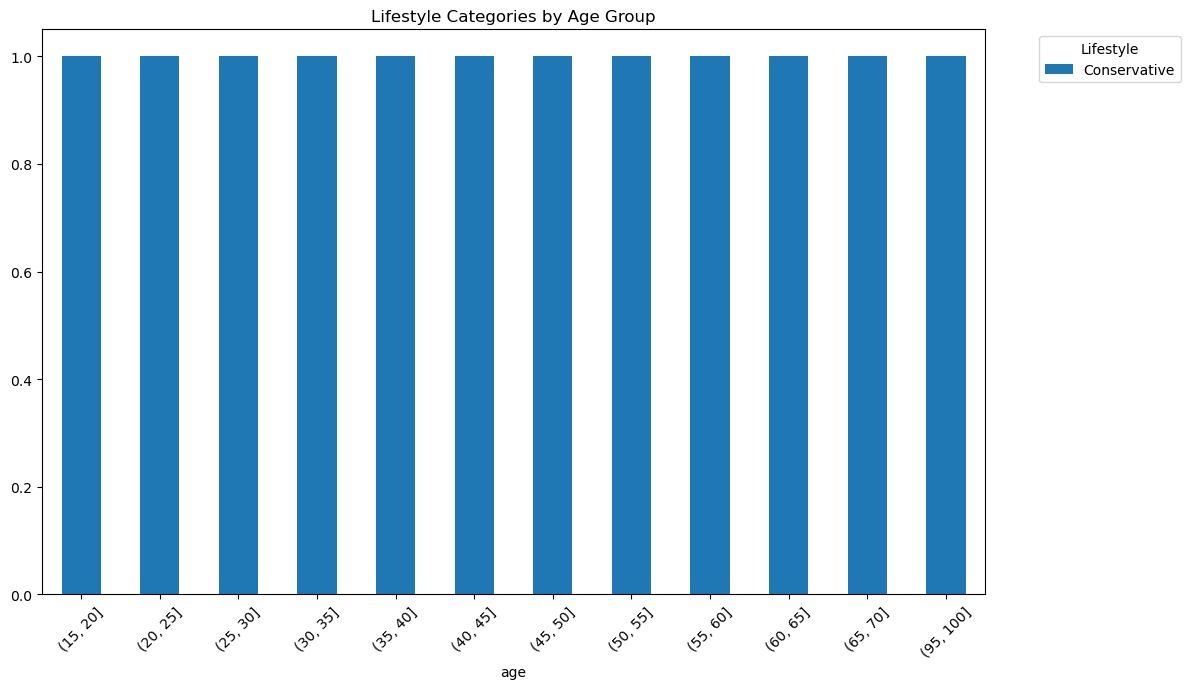

<Figure size 1000x600 with 0 Axes>

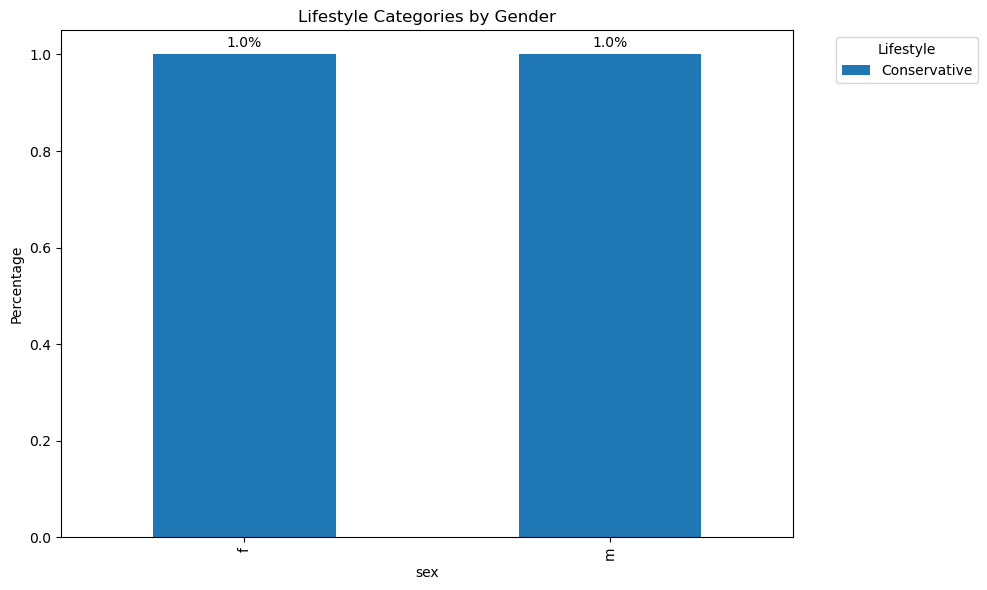

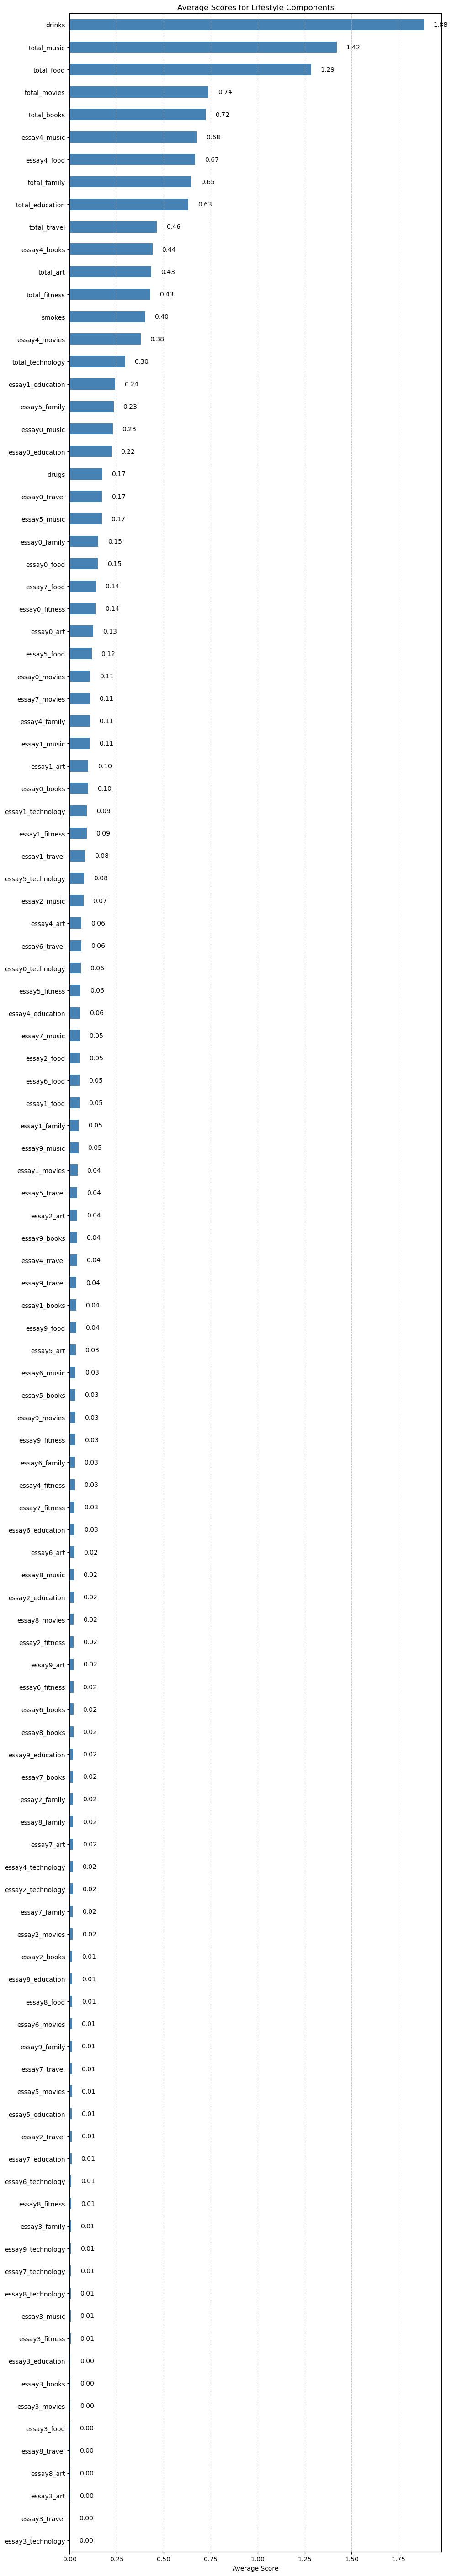

In [31]:
new_df = create_lifestyle_indicators(df_processed)
analyze_lifestyle_patterns(new_df)

In [32]:
new_df['job'].unique()

array(['transportation', 'hospitality / travel',
       'construction / craftsmanship', 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'medicine / health', 'executive / management',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other',
       'science / tech / engineering', 'education / academia',
       'clerical / administrative', 'rather not say',
       'political / government', 'law / legal services', 'military',
       'unemployed', 'retired'], dtype=object)

In [33]:
def create_socioeconomic_indicators(df):
    """
    Create socioeconomic composite indicators combining education, job, and income data
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing education, job, and income columns
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with added socioeconomic indicators
    """
    # Make a copy to avoid modifying the original dataframe
    result_df = df.copy()
    
    # Define mappings for education levels
    education_mapping = {
        'dropped out of high school': 0,
        'working on high school': 1,
        'high school': 2,
        'graduated from high school': 2,
        'dropped out of two-year college': 3,
        'two-year college': 4,
        'working on two-year college': 4,
        'dropped out of college/university': 4,
        'graduated from two-year college': 5,
        'working on college/university': 6,
        'college/university': 6,
        'dropped out of law school': 6,
        'dropped out of med school': 6,
        'dropped out of masters program': 6,
        'graduated from college/university': 7,
        'working on law school': 7,
        'working on med school': 7,
        'working on masters program': 7,
        'law school': 7,
        'med school': 7,
        'masters program': 7,
        'graduated from law school': 8,
        'graduated from med school': 8,
        'graduated from masters program': 8,
        'dropped out of ph.d program': 8,
        'working on ph.d program': 9,
        'ph.d program': 9,
        'graduated from ph.d program': 10
    }

    # Define mappings for job categories
    job_mapping = {
        'unemployed': 0,
        'retired': 1,
        'student': 2,
        'clerical / administrative': 3,
        'transportation': 3,
        'hospitality / travel': 3,
        'construction / craftsmanship': 4,
        'military': 4,
        'other': 5,
        'artistic / musical / writer': 5,
        'entertainment / media': 5,
        'sales / marketing / biz dev': 6,
        'education / academia': 6,
        'political / government': 6,
        'law / legal services': 7,
        'medicine / health': 8,
        'banking / financial / real estate': 8,
        'science / tech / engineering': 8,
        'computer / hardware / software': 8,
        'executive / management': 9
    }

    # Define columns to process
    columns_to_process = ['education', 'job', 'income']
    mappings = {
        'education': education_mapping,
        'job': job_mapping
    }
    
    # Create numerical versions of categorical columns
    for col in ['education', 'job']:
        if col in result_df.columns:
            # Create new column with '_score' suffix
            score_col = f'{col}_score'
            result_df[score_col] = result_df[col].map(mappings[col])
            
            # Fill missing values with median of non-missing values
            median_value = result_df[score_col].median()
            if pd.isna(median_value):  # If all values are NA
                median_value = 0
            result_df[score_col] = result_df[score_col].fillna(median_value)

    # Process income separately - normalize to a 0-10 scale to match other metrics
    if 'income' in result_df.columns:
        # Cap income at 250,000 to prevent outliers from skewing the scale
        capped_income = result_df['income'].clip(upper=250000)
        # Scale to 0-10 range
        result_df['income_score'] = (capped_income / 25000).clip(upper=10)
        # Fill missing values with median
        result_df['income_score'] = result_df['income_score'].fillna(result_df['income_score'].median())
    
    # Calculate socioeconomic indicator with weighted components
    socioeconomic_columns = ['education_score', 'job_score', 'income_score']
    
    # Check if we have all the required columns
    if all(col in result_df.columns for col in socioeconomic_columns):
        # Calculate weighted score - education (30%), job (30%), income (40%)
        result_df['socioeconomic_score'] = (
            0.3 * result_df['education_score'] + 
            0.3 * result_df['job_score'] + 
            0.4 * result_df['income_score']
        )
        
        # Create categorized version
        # Define reasonable bin boundaries for the combined score
        bins = [0, 3, 6, 10]  # Adjusted for the weighted scale
        labels = ['Lower', 'Middle', 'Upper']
        
        result_df['socioeconomic_category'] = pd.cut(
            result_df['socioeconomic_score'], 
            bins=bins, 
            labels=labels,
            include_lowest=True
        )
        
        # Calculate normalized score (0-1 scale)
        result_df['socioeconomic_index'] = result_df['socioeconomic_score'] / 10
    
    return result_df

def analyze_socioeconomic_patterns(df):
    """
    Analyze patterns in socioeconomic indicators across demographics
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with socioeconomic indicators
    """
    if 'socioeconomic_category' not in df.columns:
        print("Run create_socioeconomic_indicators first to generate categories")
        return
    
    # Visualize socioeconomic category distribution
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='socioeconomic_category')
    
    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom')
                   
    plt.title('Distribution of Socioeconomic Categories')
    plt.xlabel('Socioeconomic Category')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Analyze relationships with age
    if 'age' in df.columns:
        plt.figure(figsize=(12, 7))
        if hasattr(df['age'], 'cat') or df['age'].dtype.name == 'category':
            # Age is already categorized
            ct = pd.crosstab(df['age'], df['socioeconomic_category'], normalize='index')
            ct.plot(kind='bar', stacked=True, figsize=(12, 7))
            plt.title('Socioeconomic Categories by Age Group')
            plt.legend(title='Socioeconomic', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.xticks(rotation=45)
        else:
            # Create age groups if age is numeric
            sns.boxplot(x='socioeconomic_category', y='age', data=df)
            plt.title('Age Distribution by Socioeconomic Category')
        plt.tight_layout()
        plt.show()
    
    # Analyze relationships with sex
    if 'sex' in df.columns:
        plt.figure(figsize=(10, 6))
        cross_tab = pd.crosstab(df['sex'], df['socioeconomic_category'])
        cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        ax = cross_tab_pct.plot(kind='bar', figsize=(10, 6))
        
        # Add percentage labels
        for i, container in enumerate(ax.containers):
            ax.bar_label(container, fmt='%.1f%%', padding=3)
            
        plt.title('Socioeconomic Categories by Gender')
        plt.ylabel('Percentage')
        plt.legend(title='Socioeconomic', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    
    # Show average scores for each component
    socioeconomic_cols = ['education_score', 'job_score', 'income_score']
    if all(col in df.columns for col in socioeconomic_cols):
        # Increase figure height to accommodate labels
        plt.figure(figsize=(10, 5))
        
        # Get mean values and sort
        mean_scores = df[socioeconomic_cols].mean().sort_values()
        
        # Create custom bar chart with better spacing
        ax = mean_scores.plot(kind='barh', color='steelblue')
        
        # Clean up the y-axis labels
        labels = [label.replace('_score', '') for label in mean_scores.index]
        ax.set_yticklabels(labels, fontsize=12)
        
        # Add value labels at the end of each bar
        for i, v in enumerate(mean_scores):
            ax.text(v + 0.05, i, f'{v:.2f}', va='center')
        
        plt.title('Average Scores for Socioeconomic Components')
        plt.xlabel('Average Score')
        
        # Add grid lines for better readability
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        # Ensure proper spacing
        plt.tight_layout()
        plt.show()
        
        # Show correlation between components
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[socioeconomic_cols + ['socioeconomic_score']].corr(), 
                    annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Between Socioeconomic Components')
        plt.tight_layout()
        plt.show()

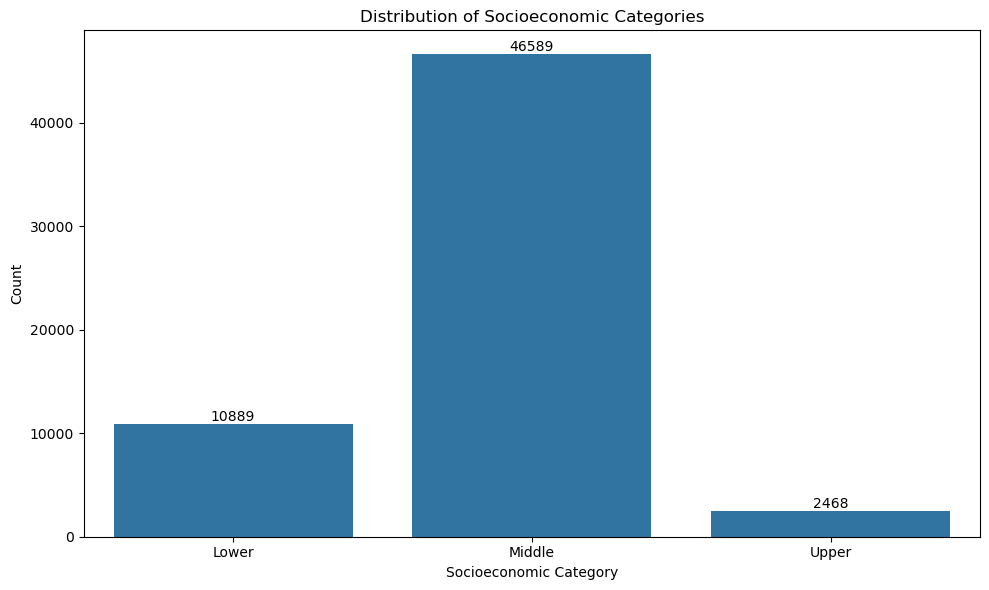

<Figure size 1200x700 with 0 Axes>

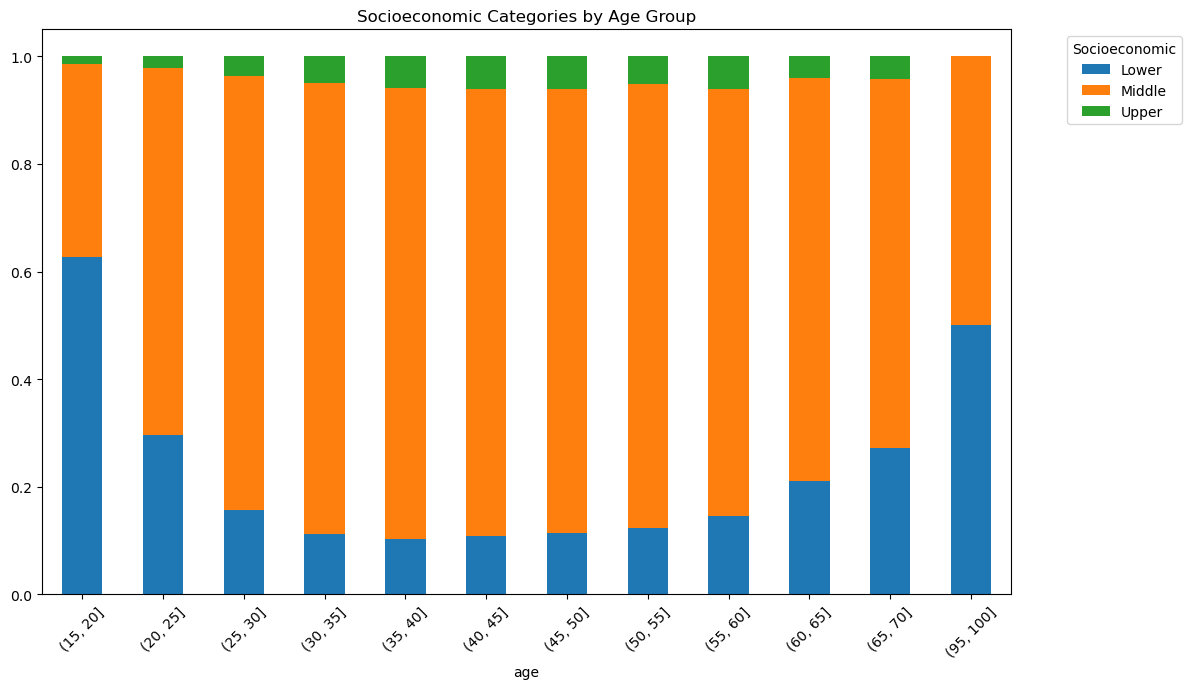

<Figure size 1000x600 with 0 Axes>

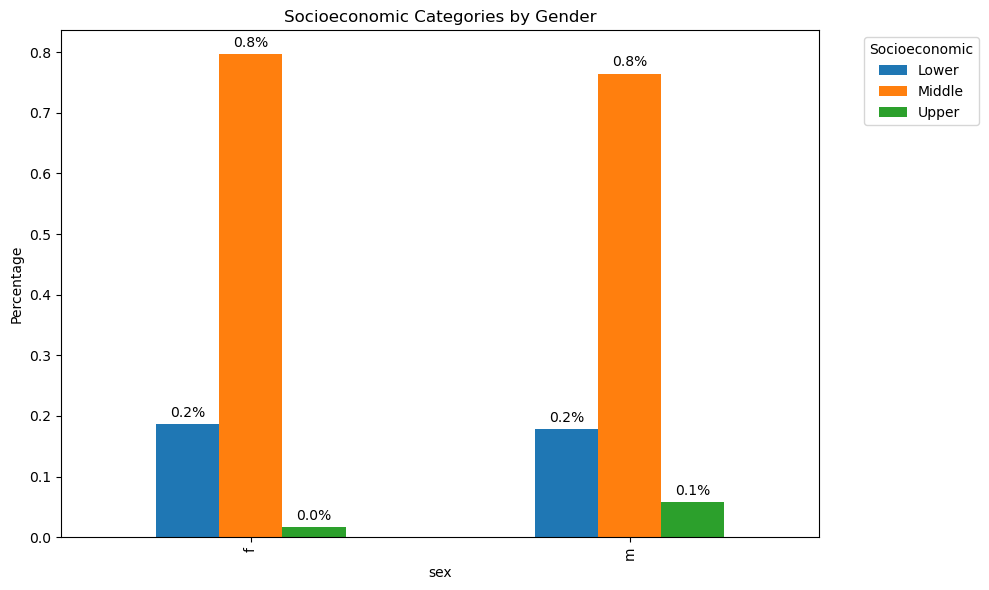

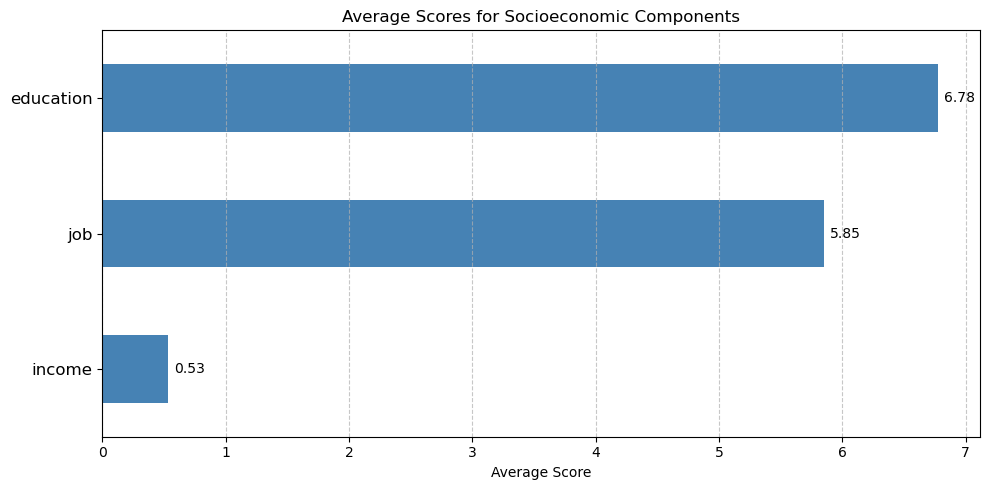

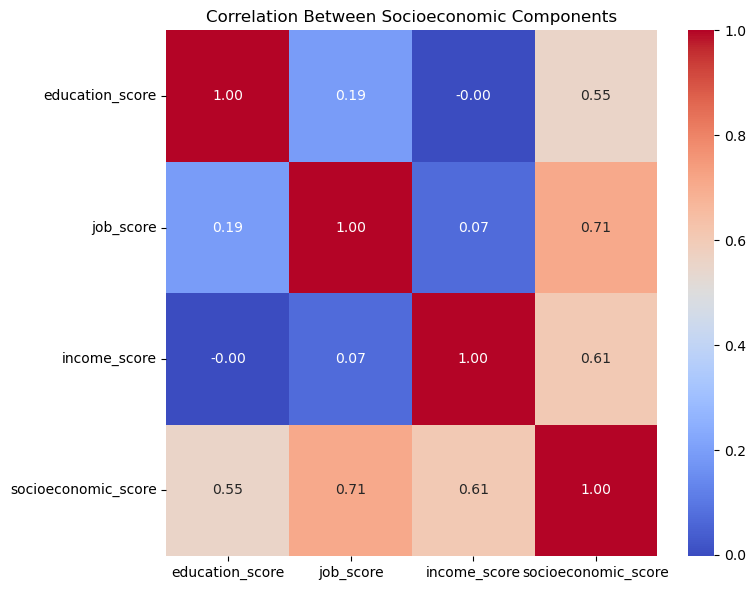

In [34]:
new_df = create_socioeconomic_indicators(new_df)
analyze_socioeconomic_patterns(new_df)

In [35]:
new_df['socioeconomic_score'].head()

0    2.70
1    4.28
2    3.60
3    2.72
4    3.60
Name: socioeconomic_score, dtype: float64

In [36]:
new_df['offspring'].unique()

array(['doesn&rsquo;t have kids, but might want them',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t want kids', 'doesn&rsquo;t have kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has a kid, and might want more', 'wants kids', 'has a kid',
       'has kids', 'has a kid, but doesn&rsquo;t want more',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has kids, and wants more'], dtype=object)

In [37]:
def build_relationship_indicators(df):
    """
    Create relationship indicators based on status and offspring information
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing status and offspring columns
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with added relationship indicators
    """
    # Make a copy to avoid modifying the original dataframe
    result_df = df.copy()
    
    # Define mappings for relationship status
    status_mapping = {
        'single': 0,
        'available': 1,
        'seeing someone': 2,
        'married': 3
    }
    
    # Define mappings for offspring preferences
    offspring_mapping = {
        'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 0,
        'doesn&rsquo;t want kids': 0,
        'doesn&rsquo;t have kids, but might want them': 1,
        'might want kids': 1,
        'doesn&rsquo;t have kids': 1,
        'doesn&rsquo;t have kids, but wants them': 2,
        'wants kids': 2,
        'has a kid, but doesn&rsquo;t want more': 3,
        'has a kid, and might want more': 4,
        'has a kid': 4,
        'has a kid, and wants more': 5,
        'has kids, but doesn&rsquo;t want more': 6,
        'has kids, and might want more': 7,
        'has kids': 7,
        'has kids, and wants more': 8
    }
    
    # Create numerical versions of each column
    if 'status' in result_df.columns:
        result_df['status_score'] = result_df['status'].map(status_mapping)
        # Fill missing values with median
        median_status = result_df['status_score'].median()
        result_df['status_score'] = result_df['status_score'].fillna(median_status)
    
    if 'offspring' in result_df.columns:
        result_df['offspring_score'] = result_df['offspring'].map(offspring_mapping)
        # Fill missing values with median
        median_offspring = result_df['offspring_score'].median()
        result_df['offspring_score'] = result_df['offspring_score'].fillna(median_offspring)
    
    # Create categorical features for offspring status
    if 'offspring' in result_df.columns:
        # Has kids or not
        result_df['has_children'] = result_df['offspring'].str.contains('has').fillna(False)
        
        # Wants kids or not
        result_df['wants_children'] = (
            result_df['offspring'].str.contains('wants|might want').fillna(False) & 
            ~result_df['offspring'].str.contains('doesn').fillna(False)
        )
        
        # Create a composite offspring category
        def get_offspring_category(row):
            if pd.isna(row['offspring']):
                return 'Unknown'
            elif 'has' in row['offspring']:
                if 'more' in row['offspring']:
                    if 'doesn' in row['offspring']:
                        return 'Has children, no more'
                    else:
                        return 'Has children, wants more'
                else:
                    return 'Has children'
            else:
                if 'doesn' in row['offspring'] and 'want any' in row['offspring']:
                    return 'No children, wants none'
                elif 'wants' in row['offspring']:
                    return 'No children, wants some'
                elif 'might' in row['offspring']:
                    return 'No children, might want some'
                else:
                    return 'No children, unknown preference'
        
        result_df['offspring_category'] = result_df.apply(get_offspring_category, axis=1)
        
        # Create a family orientation category
        def get_family_orientation(row):
            if pd.isna(row['offspring']):
                return 'Unknown'
            elif 'doesn' in row['offspring'] and 'want any' in row['offspring']:
                return 'Not family-oriented'
            elif 'doesn' in row['offspring'] and 'want more' in row['offspring']:
                return 'Moderately family-oriented'
            elif 'wants' in row['offspring'] or 'might want' in row['offspring'] or 'wants more' in row['offspring']:
                return 'Family-oriented'
            else:
                return 'Neutral'
        
        result_df['family_orientation_category'] = result_df.apply(get_family_orientation, axis=1)
    
    # Create a relationship availability indicator
    if all(col in result_df.columns for col in ['status_score', 'offspring_score']):
        # Define availability score based on status and how complicated offspring situation is
        # Lower score = more available and less complicated
        result_df['relationship_availability'] = (
            (3 - result_df['status_score']) * 0.7 +  # Invert status so single = high score
            (1 / (1 + result_df['offspring_score'])) * 0.3  # Higher offspring score = lower availability
        )
        
        # Normalize to 0-1 scale
        min_avail = result_df['relationship_availability'].min()
        max_avail = result_df['relationship_availability'].max()
        result_df['relationship_availability'] = (
            (result_df['relationship_availability'] - min_avail) / (max_avail - min_avail)
        )
        
        # Create relationship availability categories
        bins = [0, 0.33, 0.66, 1]
        labels = ['Low Availability', 'Medium Availability', 'High Availability']
        result_df['availability_category'] = pd.cut(
            result_df['relationship_availability'],
            bins=bins,
            labels=labels,
            include_lowest=True
        )
    
    return result_df

def analyze_relationship_patterns(df):
    """
    Analyze patterns in relationship indicators
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with relationship indicators
    """
    # Check if we have the necessary columns
    required_cols = ['status_score', 'offspring_score', 'offspring_category', 'availability_category']
    if not all(col in df.columns for col in required_cols):
        print("Run build_relationship_indicators first to generate relationship indicators")
        return
    
    # Visualize status distribution
    if 'status' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='status', order=df['status'].value_counts().index)
        plt.title('Distribution of Relationship Status')
        plt.xlabel('Status')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    # Visualize offspring category distribution
    plt.figure(figsize=(12, 6))
    offspring_order = df['offspring_category'].value_counts().index
    sns.countplot(data=df, x='offspring_category', order=offspring_order)
    plt.title('Distribution of Offspring Categories')
    plt.xlabel('Offspring Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Visualize availability categories
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='availability_category')
    
    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom')
    
    plt.title('Distribution of Relationship Availability')
    plt.tight_layout()
    plt.show()
    
    # Analyze patterns by gender
    if 'sex' in df.columns:
        plt.figure(figsize=(12, 8))
        
        # Cross-tabulation of status by gender
        cross_tab = pd.crosstab(df['sex'], df['status'])
        cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
        
        ax = cross_tab_pct.plot(kind='bar', figsize=(12, 6))
        plt.title('Relationship Status by Gender')
        plt.ylabel('Percentage')
        plt.legend(title='Status')
        plt.tight_layout()
        plt.show()
        
        # Cross-tabulation of offspring preference by gender
        plt.figure(figsize=(14, 8))
        offspring_cross = pd.crosstab(df['sex'], df['offspring_category'])
        offspring_pct = offspring_cross.div(offspring_cross.sum(axis=1), axis=0) * 100
        
        offspring_pct.plot(kind='bar', figsize=(14, 6))
        plt.title('Offspring Preferences by Gender')
        plt.ylabel('Percentage')
        plt.legend(title='Offspring Category', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    
    # Analyze relationship with age
    if 'age' in df.columns and df['age'].dtype.name == 'category':
        # Age vs. offspring category
        plt.figure(figsize=(16, 8))
        ct_offspring = pd.crosstab(df['age'], df['offspring_category'], normalize='index') * 100
        ct_offspring.plot(kind='bar', stacked=True)
        plt.title('Offspring Preferences by Age Group')
        plt.ylabel('Percentage')
        plt.legend(title='Offspring Category', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Age vs. relationship status
        plt.figure(figsize=(14, 8))
        ct_status = pd.crosstab(df['age'], df['status'], normalize='index') * 100
        ct_status.plot(kind='bar', stacked=True)
        plt.title('Relationship Status by Age Group')
        plt.ylabel('Percentage')
        plt.legend(title='Status')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    # Analyze relationship between availability and other indicators
    if 'lifestyle_category' in df.columns:
        plt.figure(figsize=(12, 6))
        lifestyle_avail = pd.crosstab(df['lifestyle_category'], df['availability_category'], normalize='index') * 100
        lifestyle_avail.plot(kind='bar', stacked=False)
        plt.title('Relationship Availability by Lifestyle Category')
        plt.ylabel('Percentage')
        plt.legend(title='Availability')
        plt.tight_layout()
        plt.show()

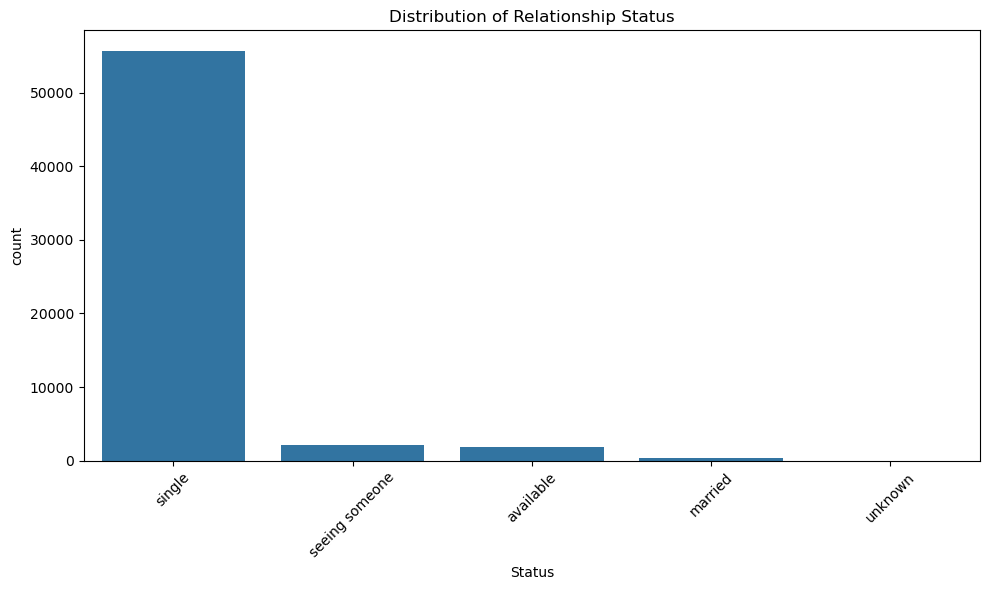

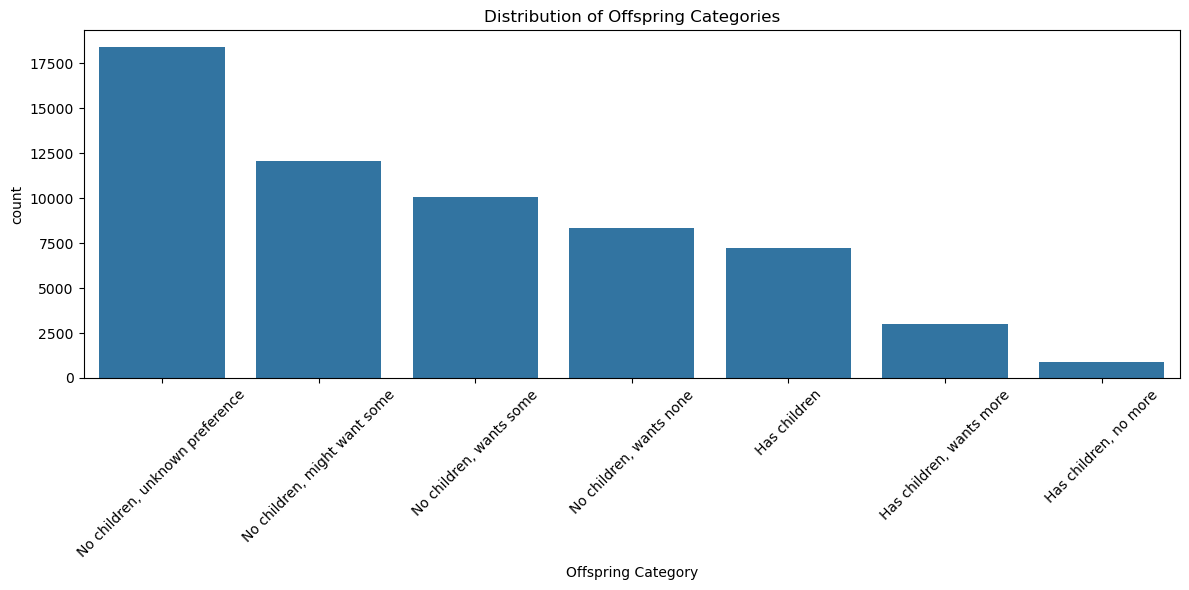

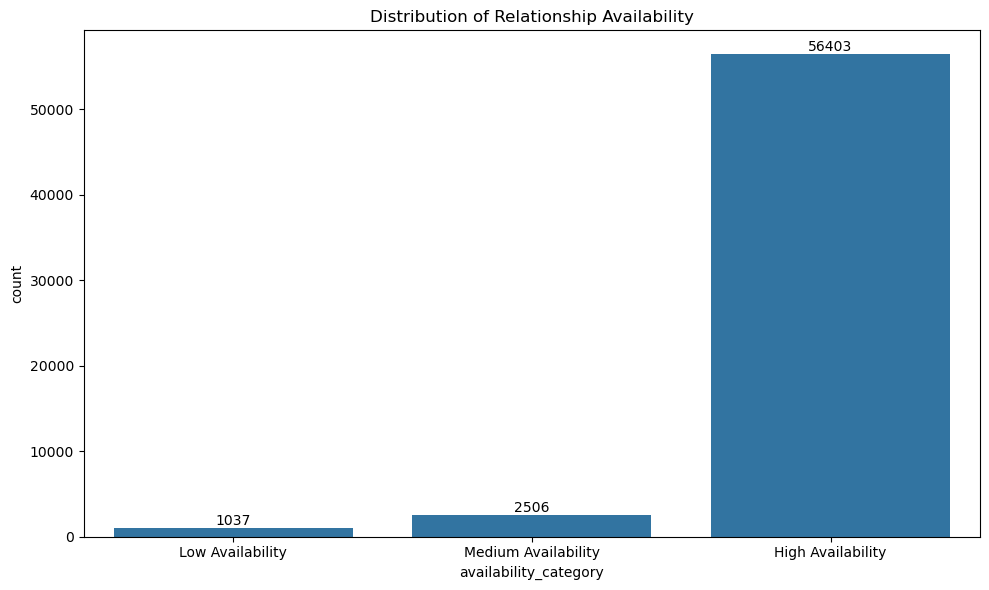

<Figure size 1200x800 with 0 Axes>

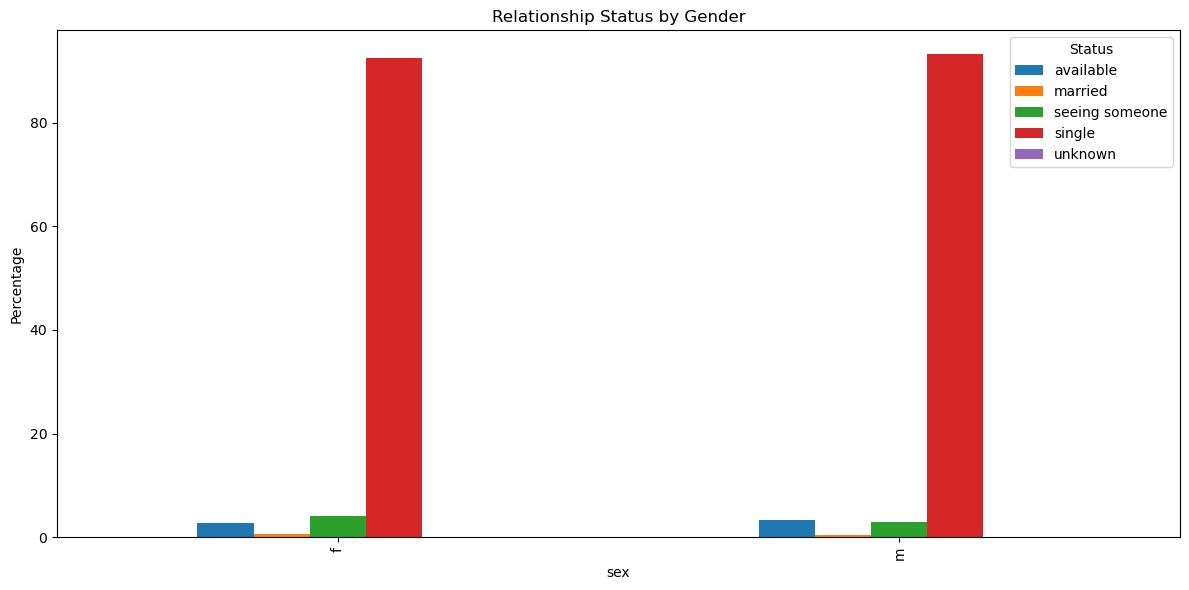

<Figure size 1400x800 with 0 Axes>

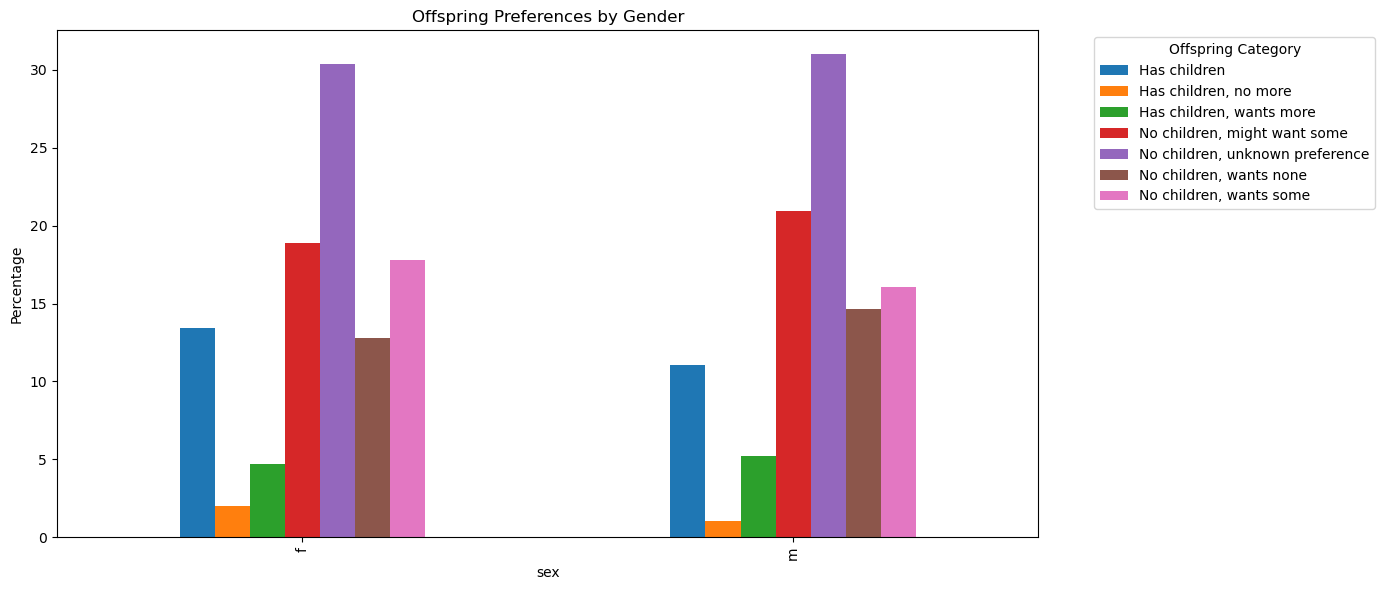

<Figure size 1600x800 with 0 Axes>

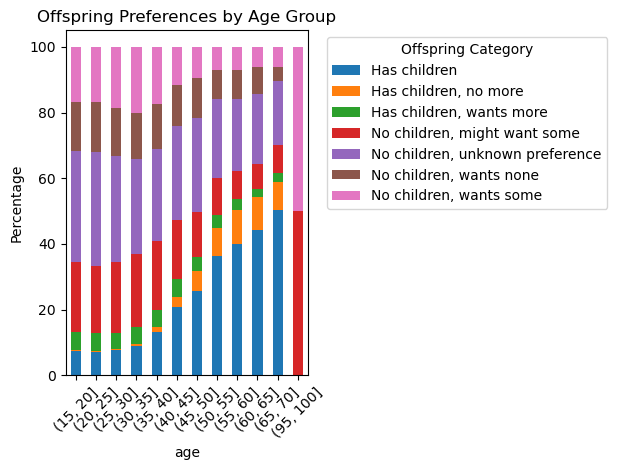

<Figure size 1400x800 with 0 Axes>

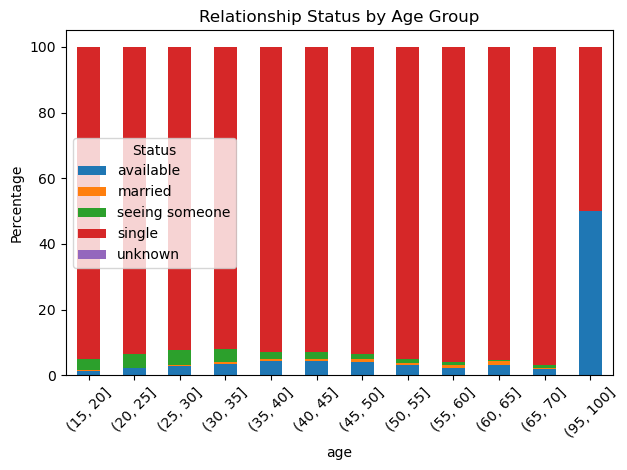

<Figure size 1200x600 with 0 Axes>

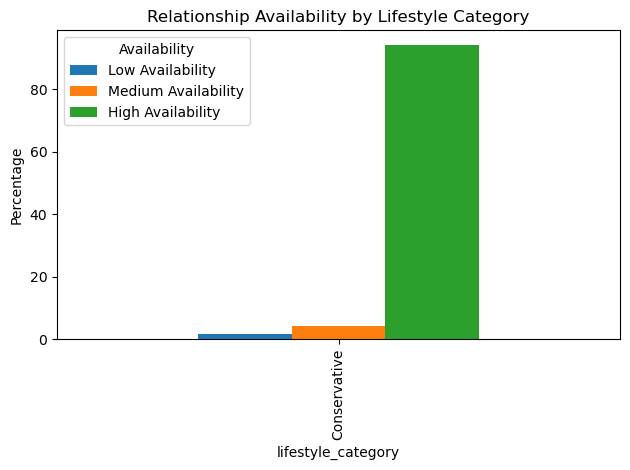

<Figure size 1200x600 with 0 Axes>

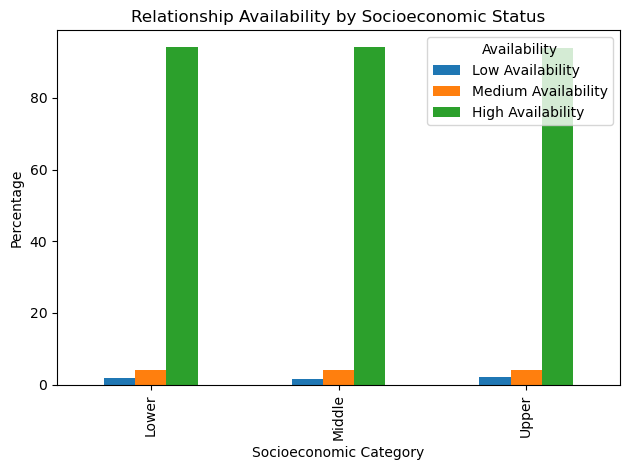

<Figure size 1200x600 with 0 Axes>

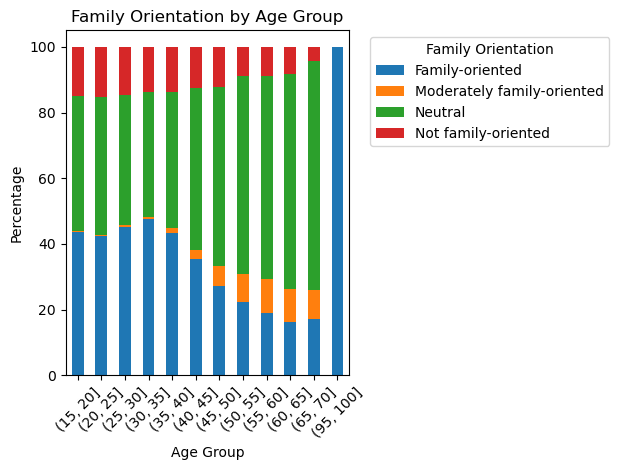

In [38]:
# Apply the function to create relationship indicators
df_comp = build_relationship_indicators(new_df)

# Run the analysis function
analyze_relationship_patterns(df_comp)

# Additional analysis - cross-tabulate with socioeconomic indicators
plt.figure(figsize=(12, 6))
rel_socio = pd.crosstab(
    df_comp['socioeconomic_category'], 
    df_comp['availability_category'],
    normalize='index'
) * 100
rel_socio.plot(kind='bar')
plt.title('Relationship Availability by Socioeconomic Status')
plt.ylabel('Percentage')
plt.xlabel('Socioeconomic Category')
plt.legend(title='Availability')
plt.tight_layout()
plt.show()

# Analyze family orientation by age
if 'family_orientation_category' in df_comp.columns:
    plt.figure(figsize=(12, 6))
    family_age = pd.crosstab(
        df_comp['age'],
        df_comp['family_orientation_category'],
        normalize='index'
    ) * 100
    family_age.plot(kind='bar', stacked=True)
    plt.title('Family Orientation by Age Group')
    plt.ylabel('Percentage')
    plt.xlabel('Age Group')
    plt.legend(title='Family Orientation', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [39]:
for col in df_comp.columns:
    print(col)

age
height
income
essay0_length
essay1_length
essay2_length
essay3_length
essay4_length
essay5_length
essay6_length
essay7_length
essay8_length
essay9_length
body_type
diet
drinks
drugs
education
ethnicity
job
last_online
location
offspring
orientation
pets
religion
sex
sign
smokes
speaks
status
essay0
essay1
essay2
essay3
essay4
essay5
essay6
essay7
essay8
essay9
job_original
job_standardized
job_category
education_original
education_standardized
education_level
essay0_clean
essay0_word_count
essay0_sentence_count
essay0_avg_word_length
essay0_flesch_reading_ease
essay0_lemmatized
essay0_tokens
essay1_clean
essay1_word_count
essay1_sentence_count
essay1_avg_word_length
essay1_flesch_reading_ease
essay1_lemmatized
essay1_tokens
essay2_clean
essay2_word_count
essay2_sentence_count
essay2_avg_word_length
essay2_flesch_reading_ease
essay2_lemmatized
essay2_tokens
essay3_clean
essay3_word_count
essay3_sentence_count
essay3_avg_word_length
essay3_flesch_reading_ease
essay3_lemmatized
essay3

In [40]:
# Text-based features
def map_essays_by_topic(df, essay_cols=None, n_topics=5, max_features=10000, random_state=42):
    """
    Classify essays based on their content for various tasks
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing processed essay columns
    task : str, default='topic'
        Classification task to perform:
        - 'topic': Classify essays into topics
        - 'sentiment': Analyze sentiment of essays
     - 'personality': Detect personality traits
        - 'style': Analyze writing style
        - 'custom': Use a custom target column for supervised learning
    essays_cols : list, default=None
        List of essay columns to use. If None, use all columns starting with 'essay' 
        and ending with '_clean' or '_lemmatized'
    target_col : str, default=None
        Target column for supervised classification (required for 'custom' task)
    model_type : str, default='tfidf_nb'
        Model type to use:
        - 'tfidf_nb': TF-IDF + Naive Bayes
        - 'tfidf_svm': TF-IDF + SVM
        - 'bow_nb': Bag of Words + Naive Bayes
        - 'bert': BERT-based model (requires transformers package)
        - 'lda': Latent Dirichlet Allocation (unsupervised topic modeling)
    n_topics : int, default=5
        Number of topics for unsupervised topic modeling
    custom_labels : list, default=None
        Custom labels for classification (required for some tasks)
    test_size : float, default=0.2
        Proportion of data to use for testing
    random_state : int, default=42
        Random seed for reproducibility
    
    Returns:
    --------
    dict
        Dictionary containing model, predictions, evaluation metrics, and transformed dataframe
    """

    result_df = df.copy
        
    essay_cols = [col for col in df.columns if col.startswith('essay') and 
                      (col.endswith('_clean') or col.endswith('_lemmatized'))]
    
    print(f"Using {len(essay_cols)} essay columns for analysis")
    df['combined_essays'] = df[essay_cols].apply(
        lambda row: ' '.join([str(text) for text in row if isinstance(text, str) and text.strip()]),
        axis=1
    )

    valid_essays = df['combined_essays'].str.strip() != ''
    print(f"Found {valid_essays.sum()} users with non-empty essays")

    # Unsupervised topic modeling with LDA
    print(f"Performing unsupervised topic modeling with {n_topics} topics")
        
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, 
                                    max_features=max_features, 
                                    stop_words='english')
    X = vectorizer.fit_transform(df.loc[valid_essays, 'combined_essays'])

    lda = LatentDirichletAllocation(n_components=n_topics, 
                                       learning_method='online',
                                       max_iter=20, 
                                       random_state=random_state)
    topic_distributions = lda.fit_transform(X)

    # Get top words for each topic
    feature_names = vectorizer.get_feature_names_out()
    n_top_words = 10
    topic_keywords = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_keywords.append(top_words)
        print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

        # Assign dominant topic to each document
    dominant_topic = np.argmax(topic_distributions, axis=1)

        # Add results to dataframe
    df.loc[valid_essays, 'dominant_topic'] = dominant_topic + 1  # 1-based indexing
        # Add topic distributions
    for i in range(n_topics):
        df.loc[valid_essays, f'topic_{i+1}_score'] = topic_distributions[:, i]

    return {
        'model': lda,
        'vectorizer': vectorizer,
        'topic_keywords': topic_keywords,
        'df': df,
        'topic_distributions': topic_distributions
    }
    

In [41]:
topic_results = map_essays_by_topic(
    df_comp,
    n_topics=8
)

for i, keywords in enumerate(topic_results['topic_keywords']):
    print(f"Topic {i+1}: {', '.join(keywords)}")


Using 20 essay columns for analysis
Found 57819 users with non-empty essays
Performing unsupervised topic modeling with 8 topics
Topic #1: music, movie, food, game, like, book, movies, favorite, books, tv
Topic #2: love, life, good, music, people, enjoy, friend, time, food, like
Topic #3: love, new, like, good, food, friend, friends, time, family, music
Topic #4: year, school, time, years, work, bay, ve, area, world, san
Topic #5: love, like, good, people, know, life, time, want, friend, music
Topic #6: like, making, make, food, good, music, love, day, bike, thing
Topic #7: music, black, john, david, love, food, city, men, radiohead, new
Topic #8: like, people, really, think, thing, know, time, don, lot, good
Topic 1: music, movie, food, game, like, book, movies, favorite, books, tv
Topic 2: love, life, good, music, people, enjoy, friend, time, food, like
Topic 3: love, new, like, good, food, friend, friends, time, family, music
Topic 4: year, school, time, years, work, bay, ve, area, 

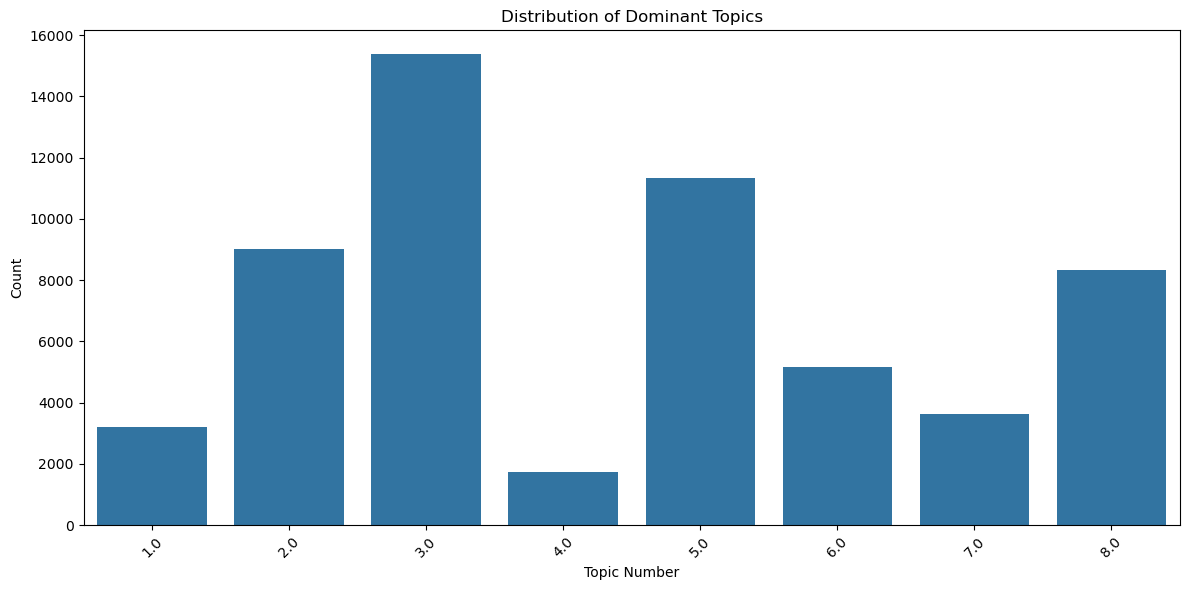

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=topic_results['df'], x='dominant_topic')
plt.title('Distribution of Dominant Topics')
plt.xlabel('Topic Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
full_df = topic_results['df']
full_df.head()

,age,height,income,essay0_length,essay1_length,essay2_length,essay3_length,essay4_length,essay5_length,essay6_length,...,combined_essays,dominant_topic,topic_1_score,topic_2_score,topic_3_score,topic_4_score,topic_5_score,topic_6_score,topic_7_score,topic_8_score
0,"(20, 25]",120.0,0.0,1287.0,259.0,126.0,124.0,459.0,51.0,27.0,...,about me i would love to think that i was some...,5.0,0.157243,0.040467,0.000319,0.051641,0.302898,0.174088,0.030249,0.243095
1,"(30, 35]",120.0,80000.0,691.0,52.0,96.0,0.0,249.0,306.0,0.0,...,i am a chef this is what that means. 1. i am a...,3.0,0.033120,0.137349,0.262601,0.000635,0.235891,0.106576,0.000636,0.223193
2,"(35, 40]",120.0,0.0,1416.0,557.0,460.0,258.0,2346.0,86.0,0.0,...,"i m not ashamed of much, but writing public te...",8.0,0.076293,0.191134,0.000160,0.012213,0.000160,0.000160,0.209818,0.510062
3,"(20, 25]",120.0,20000.0,41.0,41.0,100.0,33.0,206.0,0.0,26.0,...,i work in a library and go to school. . . work...,7.0,0.001715,0.001715,0.001715,0.184922,0.001715,0.227535,0.475145,0.105539
4,"(25, 30]",120.0,0.0,210.0,26.0,101.0,39.0,340.0,0.0,0.0,...,hey how s it going? currently vague on the pro...,5.0,0.001002,0.160272,0.017427,0.001001,0.419381,0.001002,0.303083,0.096832


In [45]:
for col in full_df.columns:
    print(col)

age
height
income
essay0_length
essay1_length
essay2_length
essay3_length
essay4_length
essay5_length
essay6_length
essay7_length
essay8_length
essay9_length
body_type
diet
drinks
drugs
education
ethnicity
job
last_online
location
offspring
orientation
pets
religion
sex
sign
smokes
speaks
status
essay0
essay1
essay2
essay3
essay4
essay5
essay6
essay7
essay8
essay9
job_original
job_standardized
job_category
education_original
education_standardized
education_level
essay0_clean
essay0_word_count
essay0_sentence_count
essay0_avg_word_length
essay0_flesch_reading_ease
essay0_lemmatized
essay0_tokens
essay1_clean
essay1_word_count
essay1_sentence_count
essay1_avg_word_length
essay1_flesch_reading_ease
essay1_lemmatized
essay1_tokens
essay2_clean
essay2_word_count
essay2_sentence_count
essay2_avg_word_length
essay2_flesch_reading_ease
essay2_lemmatized
essay2_tokens
essay3_clean
essay3_word_count
essay3_sentence_count
essay3_avg_word_length
essay3_flesch_reading_ease
essay3_lemmatized
essay3

In [73]:
def process_nlp_words(texts, columns=None):
    """
    Sequential NLP processing for large datasets - guaranteed to work
    """
    import spacy
    from tqdm.auto import tqdm
    
    # Load a smaller model with ONLY the NER component
    nlp = spacy.load("en_core_web_sm", disable=["tok2vec", "tagger", "parser", 
                                               "attribute_ruler", "lemmatizer"])
    
    # Extract text from DataFrame if needed
    if hasattr(texts, 'iloc'):
        if columns is None:
            columns = texts.select_dtypes(include=['object']).columns.tolist()
        
        # Create dictionary to store results
        result_dict = {col: {} for col in columns if col in texts.columns}
        
        # Process each column sequentially
        for col in tqdm(columns, desc="Processing columns"):
            if col not in texts.columns:
                continue
                
            # Process each text in the column
            for idx, text in tqdm(enumerate(texts[col]), 
                                 desc=f"Processing {col}", 
                                 total=len(texts[col]),
                                 leave=False):
                # Handle None/NaN values
                if pd.isna(text):
                    result_dict[col][idx] = []
                    continue
                    
                # Process the text
                doc = nlp(str(text))
                
                # Extract entities
                entities = [{"text": ent.text, "label": ent.label_} for ent in doc.ents]
                result_dict[col][idx] = entities
                
        return result_dict
    else:
        # For list input
        results = []
        
        # Process each text in the list
        for idx, text in tqdm(enumerate(texts), desc="Processing texts", total=len(texts)):
            # Handle None values
            if text is None:
                results.append([])
                continue
                
            # Process the text
            doc = nlp(str(text))
            
            # Extract entities
            entities = [{"text": ent.text, "label": ent.label_} for ent in doc.ents]
            results.append(entities)
            nlp.to_disk('./pipeline')
            
        return results

In [74]:
essay_cols = [f'essay{i}' for i in range(10)]
results = process_nlp_words(full_df, columns=essay_cols)

Processing columns:   0%|          | 0/10 [00:00<?, ?it/s]

Processing essay0:   0%|          | 0/59946 [00:00<?, ?it/s]

Processing essay1:   0%|          | 0/59946 [00:00<?, ?it/s]

Processing essay2:   0%|          | 0/59946 [00:00<?, ?it/s]

Processing essay3:   0%|          | 0/59946 [00:00<?, ?it/s]

Processing essay4:   0%|          | 0/59946 [00:00<?, ?it/s]

Processing essay5:   0%|          | 0/59946 [00:00<?, ?it/s]

Processing essay6:   0%|          | 0/59946 [00:00<?, ?it/s]

Processing essay7:   0%|          | 0/59946 [00:00<?, ?it/s]

Processing essay8:   0%|          | 0/59946 [00:00<?, ?it/s]

Processing essay9:   0%|          | 0/59946 [00:00<?, ?it/s]

In [79]:
flattened_results = [
    {"index": idx, "entities": entities}
    for col, entities_dict in results.items()
    for idx, entities in entities_dict.items()
]

ner_df = pd.DataFrame(flattened_results)
print(ner_df.head(10))

   index                                           entities
0      0       [{'text': 'five year
old', 'label': 'DATE'}]
1      1  [{'text': '1', 'label': 'CARDINAL'}, {'text': ...
2      2  [{'text': 'san francisco', 'label': 'GPE'}, {'...
3      3                                                 []
4      4                                                 []
5      5  [{'text': 'australian', 'label': 'NORP'}, {'te...
6      6                                                 []
7      7                                                 []
8      8                                                 []
9      9  [{'text': 'the past few years.<br', 'label': '...


In [80]:
full_df = full_df.merge(ner_df, left_index=True, right_on="index", how="left").drop(columns=["index"])
full_df.head()

,age,height,income,essay0_length,essay1_length,essay2_length,essay3_length,essay4_length,essay5_length,essay6_length,...,dominant_topic,topic_1_score,topic_2_score,topic_3_score,topic_4_score,topic_5_score,topic_6_score,topic_7_score,topic_8_score,entities
0,"(20, 25]",120.0,0.0,1287.0,259.0,126.0,124.0,459.0,51.0,27.0,...,5.0,0.157243,0.040467,0.000319,0.051641,0.302898,0.174088,0.030249,0.243095,"[{'text': 'five year old', 'label': 'DATE'}]"
59946,"(20, 25]",120.0,0.0,1287.0,259.0,126.0,124.0,459.0,51.0,27.0,...,5.0,0.157243,0.040467,0.000319,0.051641,0.302898,0.174088,0.030249,0.243095,"[{'text': 'sunday', 'label': 'DATE'}]"
119892,"(20, 25]",120.0,0.0,1287.0,259.0,126.0,124.0,459.0,51.0,27.0,...,5.0,0.157243,0.040467,0.000319,0.051641,0.302898,0.174088,0.030249,0.243095,[]
179838,"(20, 25]",120.0,0.0,1287.0,259.0,126.0,124.0,459.0,51.0,27.0,...,5.0,0.157243,0.040467,0.000319,0.051641,0.302898,0.174088,0.030249,0.243095,"[{'text': 'six foot half', 'label': 'QUANTITY'..."
239784,"(20, 25]",120.0,0.0,1287.0,259.0,126.0,124.0,459.0,51.0,27.0,...,5.0,0.157243,0.040467,0.000319,0.051641,0.302898,0.174088,0.030249,0.243095,"[{'text': 'mary mallon', 'label': 'PERSON'}, {..."


In [82]:
import dill
dill.dump_session('notebook_env.db')

NotImplementedError: [E112] Pickling a span is not supported, because spans are only views of the parent Doc and can't exist on their own. A pickled span would always have to include its Doc and Vocab, which has practically no advantage over pickling the parent Doc directly. So instead of pickling the span, pickle the Doc it belongs to or use Span.as_doc to convert the span to a standalone Doc object.

In [96]:
from multiprocessing import Pool
import dask.dataframe as dd
import os

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
nlp.add_pipe('sentencizer')

def process_text(text):
    """Extract basic linguistic features from text"""
    if not isinstance(text, str) or len(text.strip()) == 0:
        return None
    
    # Process with spaCy
    doc = nlp(text[:50000])  # Limit very long texts
    
    # Basic counts
    tokens = [t for t in doc if not t.is_punct and not t.is_space]
    word_count = len(tokens)
    if word_count == 0:
        return None
    
    # Calculate features
    features = {
        'word_count': word_count,
        'avg_word_length': sum(len(t.text) for t in tokens) / word_count,
        'unique_words': len(set(t.text.lower() for t in tokens)) / word_count,
        
        # Pronouns (communication style indicators)
        'first_person_singular': sum(1 for t in doc if t.lower_ in ["i", "me", "my", "mine", "myself"]) / word_count,
        'first_person_plural': sum(1 for t in doc if t.lower_ in ["we", "us", "our", "ours", "ourselves"]) / word_count,
        'second_person': sum(1 for t in doc if t.lower_ in ["you", "your", "yours", "yourself", "yourselves"]) / word_count,
        
        # Parts of speech (cognitive indicators)
        'adj_ratio': sum(1 for t in tokens if t.pos_ == "ADJ") / word_count,
        'adv_ratio': sum(1 for t in tokens if t.pos_ == "ADV") / word_count,
        'verb_ratio': sum(1 for t in tokens if t.pos_ == "VERB") / word_count,
        'noun_ratio': sum(1 for t in tokens if t.pos_ == "NOUN") / word_count,
        
        # Sentence structure
        'avg_tokens_per_sent': word_count / max(1, len(list(doc.sents))),
    }
    
    return features

def process_batch(texts):
    """Process a batch of texts"""
    return [process_text(text) for text in texts]

def parallel_process_files(input_file, text_column, output_file=None, batch_size=1000, n_workers=None):
    """Process a large CSV/Excel file in parallel"""
    # Determine number of workers if not specified
    if n_workers is None:
        n_workers = os.cpu_count() - 1 or 1
    
    print(f"Loading data from {input_file}...")
    
    # Determine file type and read accordingly
    if input_file.endswith('.csv'):
        df = pd.read_csv(input_file)
    elif input_file.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(input_file)
    else:
        raise ValueError("Unsupported file format. Use CSV or Excel.")
    
    if text_column not in df.columns:
        raise ValueError(f"Text column '{text_column}' not found in the file")
    
    # Split data into batches
    texts = df[text_column].fillna('').tolist()
    batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]
    
    print(f"Processing {len(texts)} texts in {len(batches)} batches using {n_workers} workers...")
    
    # Process in parallel
    with Pool(n_workers) as pool:
        results = list(tqdm(pool.imap(process_batch, batches), total=len(batches)))
    
    # Flatten results and filter None values
    all_features = [item for batch in results for item in batch if item is not None]
    
    # Convert to DataFrame
    features_df = pd.DataFrame(all_features)
    
    # Compute psychometric indicators
    print("Computing psychometric indicators...")
    
    # Simple mapping for demonstration
    features_df['openness'] = (
        features_df['unique_words'] * 0.4 + 
        features_df['adj_ratio'] * 0.3 + 
        features_df['adv_ratio'] * 0.3
    ).clip(0, 1)  # Normalize between 0 and 1
    
    # Communication style indicators
    features_df['expressiveness'] = (
        features_df['adj_ratio'] * 0.5 + 
        features_df['adv_ratio'] * 0.5
    ).clip(0, 1)
    
    features_df['assertiveness'] = (
        features_df['verb_ratio'] * 0.6 +
        (1 - features_df['first_person_singular']) * 0.4
    ).clip(0, 1)
    
    features_df['social_orientation'] = (
        features_df['first_person_plural'] * 0.4 +
        features_df['second_person'] * 0.6
    ).clip(0, 1)
    
    # Merge back with original IDs if present
    if 'id' in df.columns:
        # Need to handle possible length mismatch due to filtered None values
        valid_indices = [i for i, text in enumerate(texts) if isinstance(text, str) and len(text.strip()) > 0]
        if len(valid_indices) == len(features_df):
            features_df['id'] = df.iloc[valid_indices]['id'].values
    
    # Save results
    if output_file is None:
        base, ext = os.path.splitext(input_file)
        output_file = f"{base}_psychometric{ext}"
    
    if output_file.endswith('.csv'):
        features_df.to_csv(output_file, index=False)
    else:
        features_df.to_excel(output_file, index=False)
    
    print(f"Results saved to {output_file}")
    return features_df
    

def analyze_large_dataset(file_path, text_column):
    """Main function to process a large dataset"""
    # For very large files, read in chunks
    chunks = pd.read_csv(file_path, chunksize=50000)
    
    results = []
    for chunk in tqdm(chunks):
        # Process chunk
        batch_results = parallel_process(chunk[text_column].fillna('').tolist())
        # Convert results to DataFrame
        df_results = pd.DataFrame(batch_results)
        # Add any IDs from original data
        if 'id' in chunk.columns:
            df_results['id'] = chunk['id'].values[:len(df_results)]
        results.append(df_results)
    
    # Combine results
    return pd.concat(results, ignore_index=True)

# For extremely large datasets, use Dask
def analyze_with_dask(file_path, text_column):
    # Read data with Dask
    ddf = dd.read_csv(file_path)
    
    # Define a simplified UDF for Dask
    def extract_basic_metrics(text):
        # Very minimal processing for speed
        if not isinstance(text, str):
            return pd.Series([0, 0, 0], index=['word_count', 'diversity', 'first_person'])
        words = text.split()
        word_count = len(words)
        unique_words = len(set(words))
        diversity = unique_words / word_count if word_count > 0 else 0
        first_person = sum(1 for w in words if w.lower() in ["i", "me", "my", "mine", "myself"])
        first_person_ratio = first_person / word_count if word_count > 0 else 0
        return pd.Series([word_count, diversity, first_person_ratio], 
                         index=['word_count', 'diversity', 'first_person'])
    
    # Apply function and compute
    result = ddf[text_column].apply(extract_basic_metrics, meta=pd.Series([0, 0, 0], 
                                   index=['word_count', 'diversity', 'first_person']))
    return result.compute()

# Map metrics to psychometric indicators efficiently
def calculate_psychometrics(metrics_df):
    """Calculate psychometric indicators from metrics efficiently"""
    results = pd.DataFrame()
    
    # Vectorized operations instead of row-by-row processing
    results['openness'] = (
        metrics_df['lexical_diversity'] * 0.6 + 
        (metrics_df['sent_count'] / metrics_df['word_count']) * 0.4
    )

    results['communication_style'] = (
        (1 - metrics_df['first_person']) * 0.5 +
        (metrics_df['lexical_diversity']) * 0.5
    )
    
    return results

In [103]:
results = []
for i, col in enumerate(essay_cols):  # Swap the variables to match enumerate's output
    result = parallel_process_files(
            input_file="profiles.csv",
            text_column=col,  # Use the actual column name from essay_cols
            output_file=f"psychometric_results{i}.csv"
    )
    results.append(result)

Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results0.csv
Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results1.csv
Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results2.csv
Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results3.csv
Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results4.csv
Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results5.csv
Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results6.csv
Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results7.csv
Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results8.csv
Loading data from profiles.csv...
Processing 59946 texts in 60 batches using 3 workers...


  0%|          | 0/60 [00:00<?, ?it/s]

Computing psychometric indicators...
Results saved to psychometric_results9.csv


In [104]:
print(results[0].head())

   word_count  avg_word_length  unique_words  first_person_singular  \
0         249         4.048193      0.606426               0.072289   
1         137         3.934307      0.635036               0.102190   
2         263         4.315589      0.593156               0.076046   
3           9         3.111111      1.000000               0.111111   
4          42         3.904762      0.857143               0.071429   

   first_person_plural  second_person  adj_ratio  adv_ratio  verb_ratio  \
0             0.004016       0.032129   0.108434   0.056225    0.120482   
1             0.000000       0.000000   0.102190   0.087591    0.087591   
2             0.000000       0.022814   0.098859   0.095057    0.110266   
3             0.000000       0.000000   0.000000   0.000000    0.222222   
4             0.000000       0.000000   0.119048   0.071429    0.166667   

   noun_ratio  avg_tokens_per_sent  openness  expressiveness  assertiveness  \
0    0.192771            15.562500  0.29196

<Figure size 640x480 with 0 Axes>

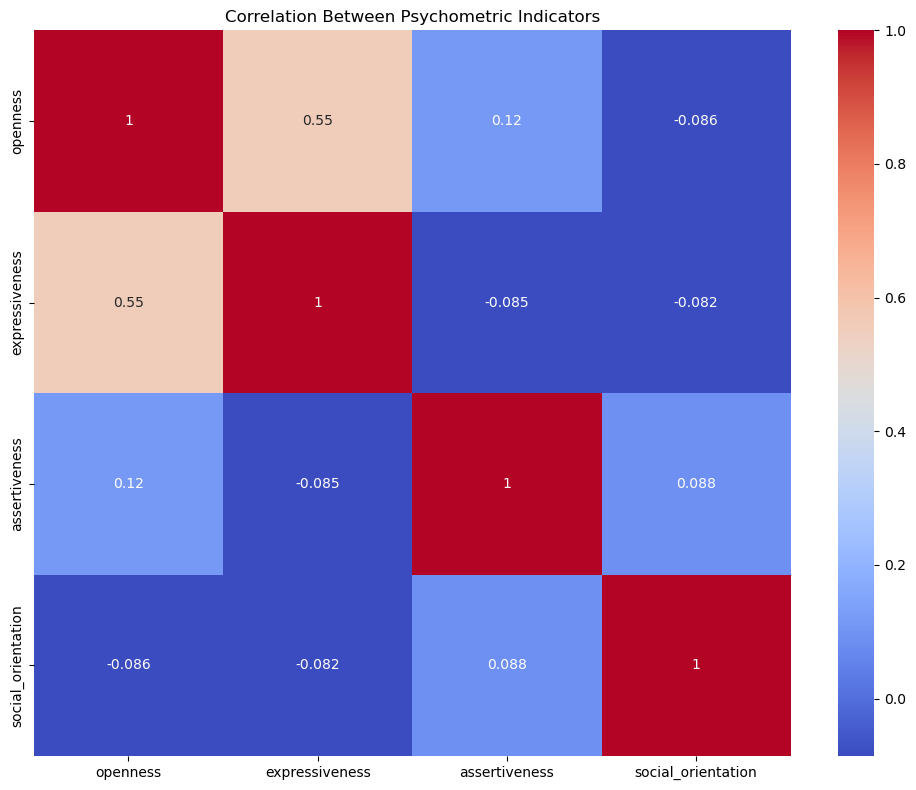

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [108]:
def visualize_results(results_file):
    # Load results
    if results_file.endswith('.csv'):
        df = pd.read_csv(results_file)
    else:
        df = pd.read_excel(results_file)

    plt.clf()
    # Create distribution plots for psychometric indicators
    plt.figure(figsize=(12, 8))
    
    # Distribution of psychometric indicators
    plt.subplot(2, 2, 1)
    sns.histplot(df['openness'], kde=True)
    plt.title('Distribution of Openness Score')
    
    plt.subplot(2, 2, 2)
    sns.histplot(df['expressiveness'], kde=True)
    plt.title('Distribution of Expressiveness Score')
    
    plt.subplot(2, 2, 3)
    sns.histplot(df['assertiveness'], kde=True)
    plt.title('Distribution of Assertiveness Score')
    
    plt.subplot(2, 2, 4)
    sns.histplot(df['social_orientation'], kde=True)
    plt.title('Distribution of Social Orientation Score')
    
    plt.tight_layout()
    plt.savefig('psychometric_distributions.png')
    plt.close()
    
    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    psychometric_cols = ['openness', 'expressiveness', 'assertiveness', 'social_orientation']
    corr = df[psychometric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Between Psychometric Indicators')
    plt.tight_layout()
    plt.savefig('psychometric_correlations.png')
    plt.show()
    
    print("Visualizations saved as psychometric_distributions.png and psychometric_correlations.png")

visualize_results("psychometric_results0.csv")

<Figure size 640x480 with 0 Axes>

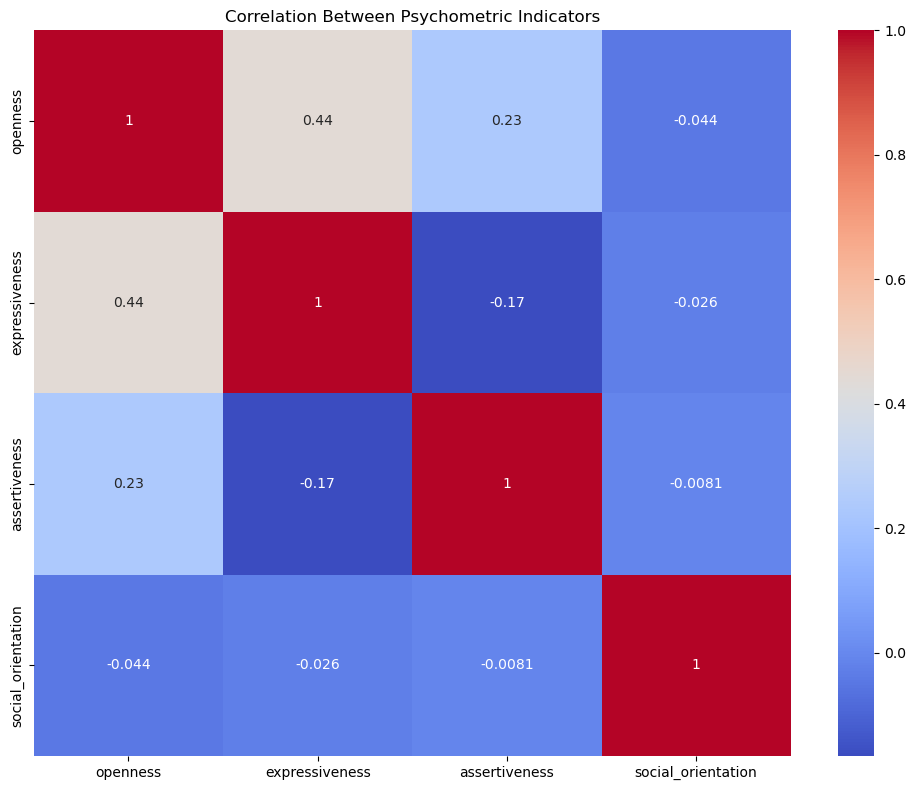

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [109]:
visualize_results("psychometric_results1.csv")

<Figure size 640x480 with 0 Axes>

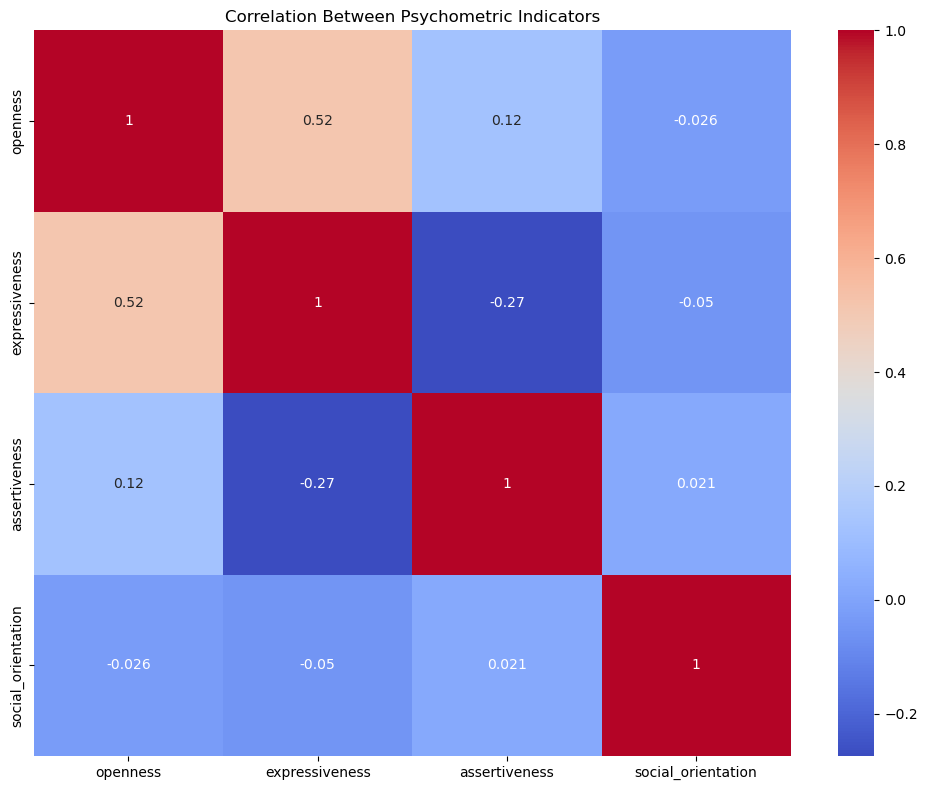

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [110]:
visualize_results("psychometric_results2.csv")

<Figure size 640x480 with 0 Axes>

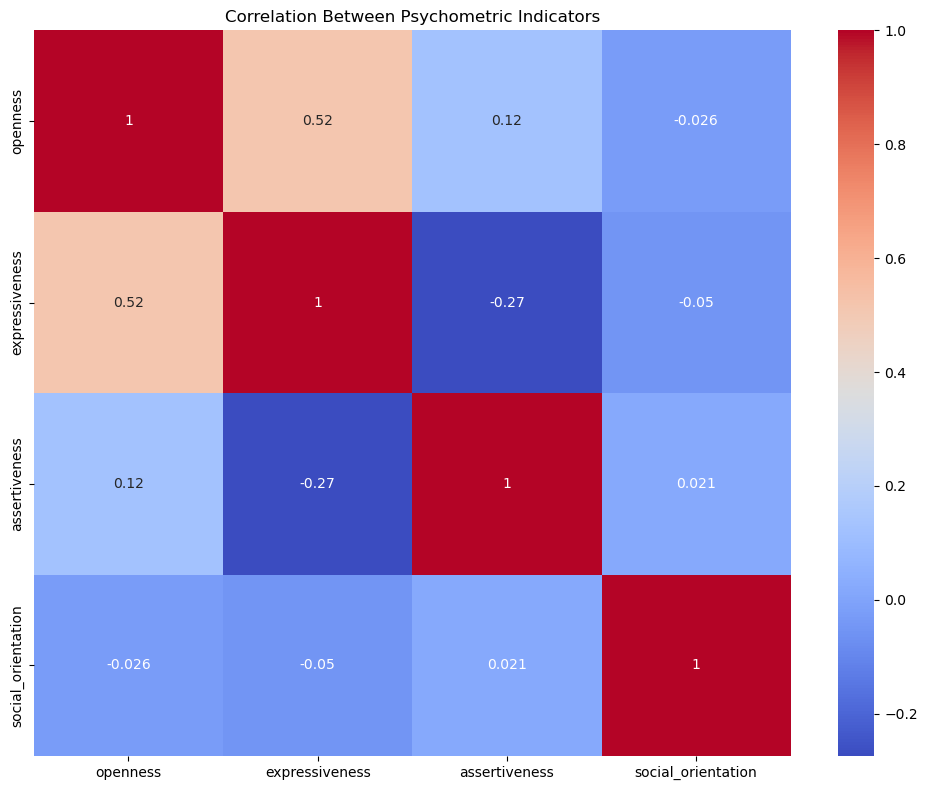

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [111]:
visualize_results("psychometric_results2.csv")

<Figure size 640x480 with 0 Axes>

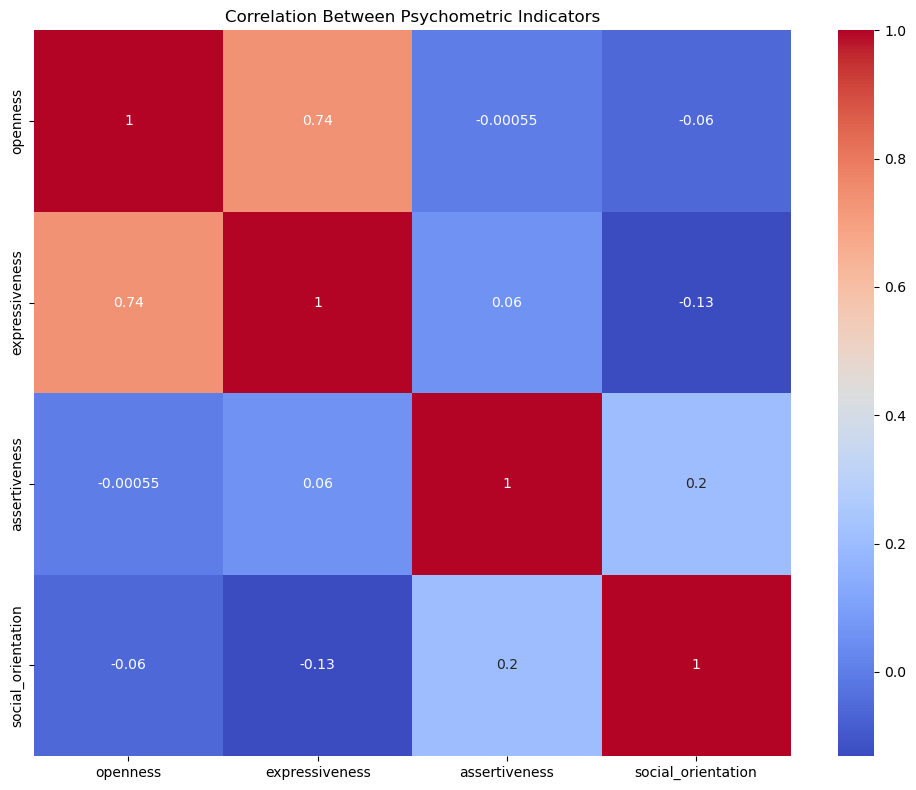

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [112]:
visualize_results("psychometric_results3.csv")

<Figure size 640x480 with 0 Axes>

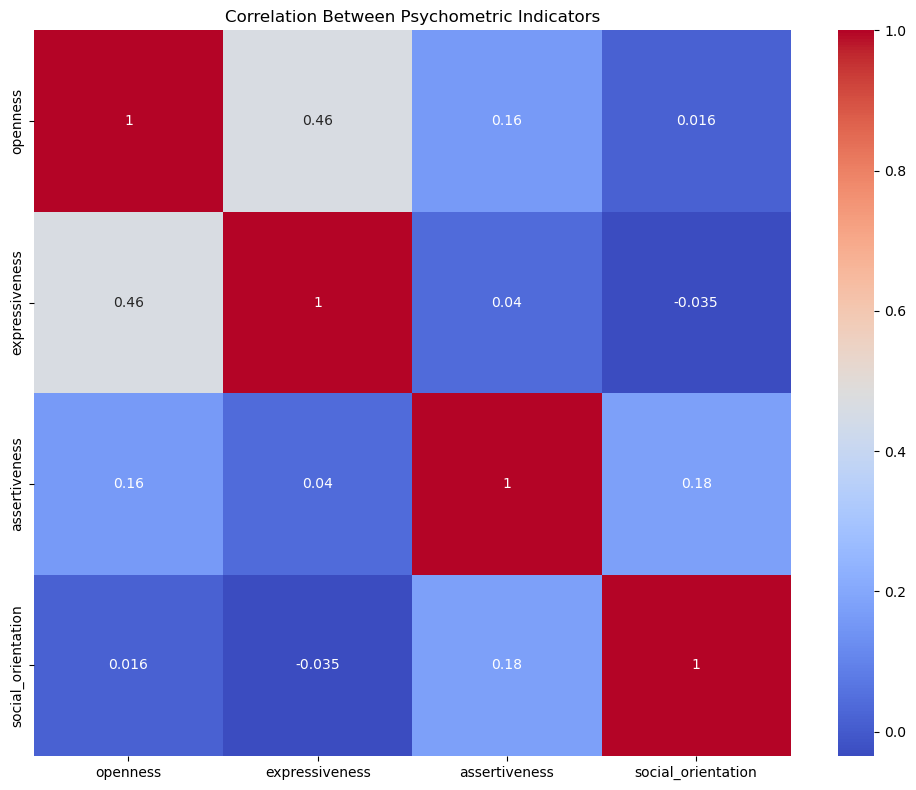

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [113]:
visualize_results("psychometric_results4.csv")

<Figure size 640x480 with 0 Axes>

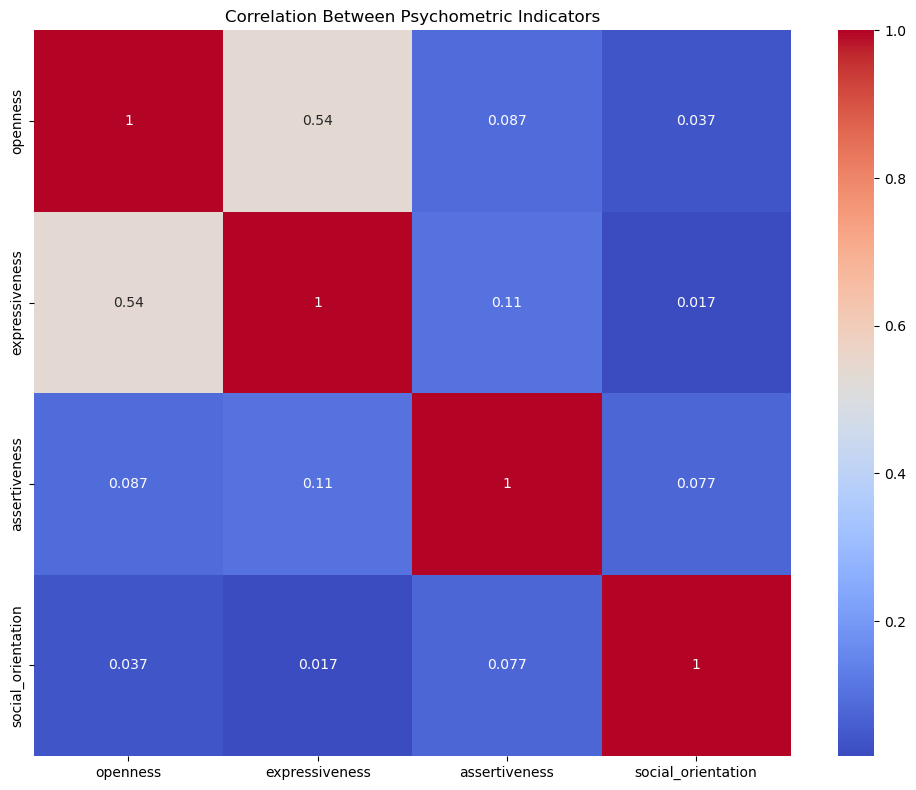

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [114]:
visualize_results("psychometric_results5.csv")

<Figure size 640x480 with 0 Axes>

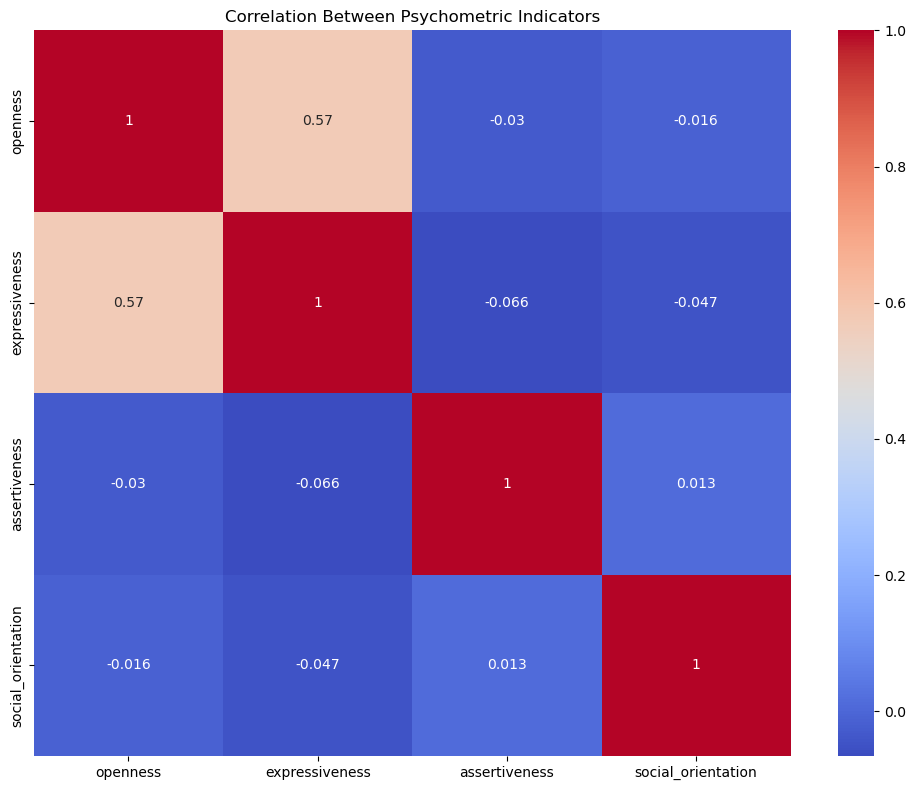

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [115]:
visualize_results("psychometric_results6.csv")

<Figure size 640x480 with 0 Axes>

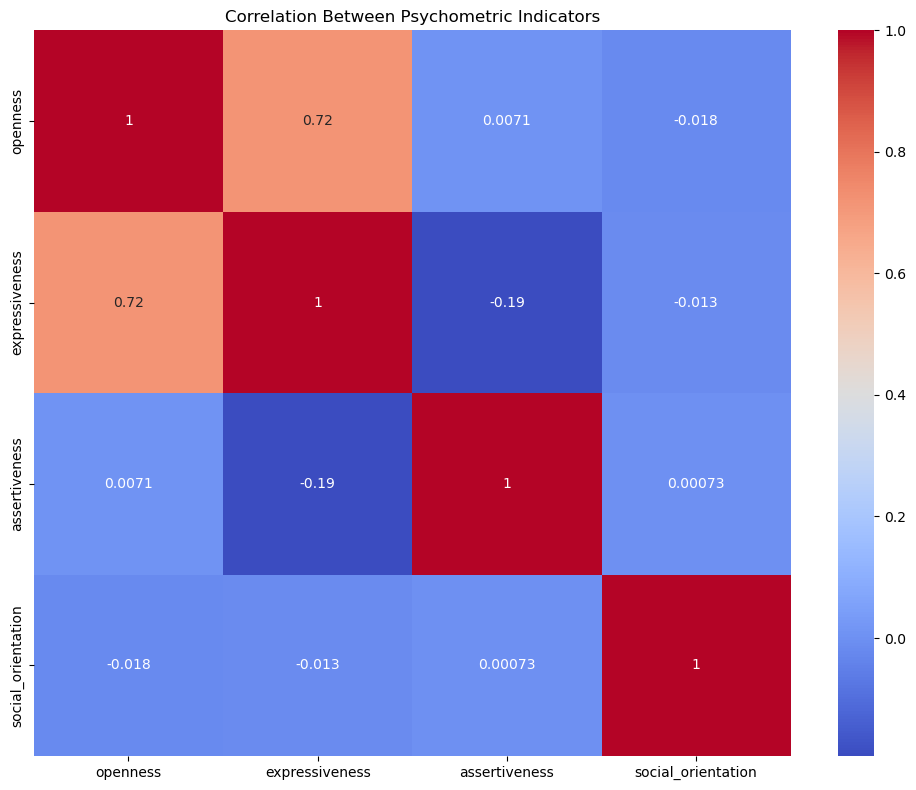

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [116]:
visualize_results("psychometric_results7.csv")

<Figure size 640x480 with 0 Axes>

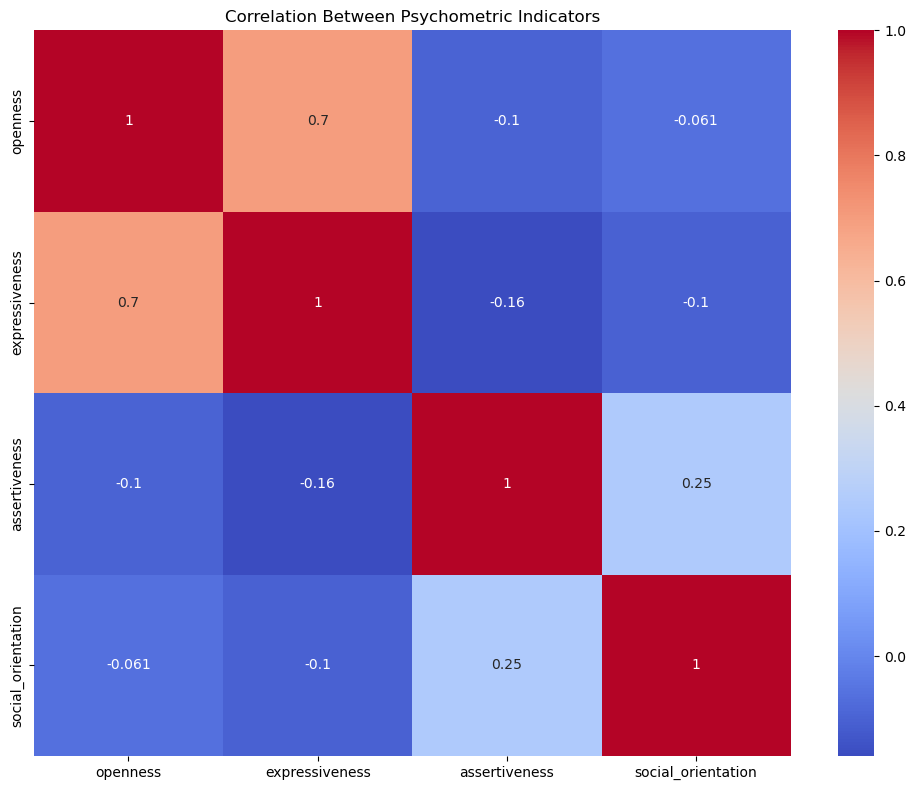

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [117]:
visualize_results("psychometric_results8.csv")

<Figure size 640x480 with 0 Axes>

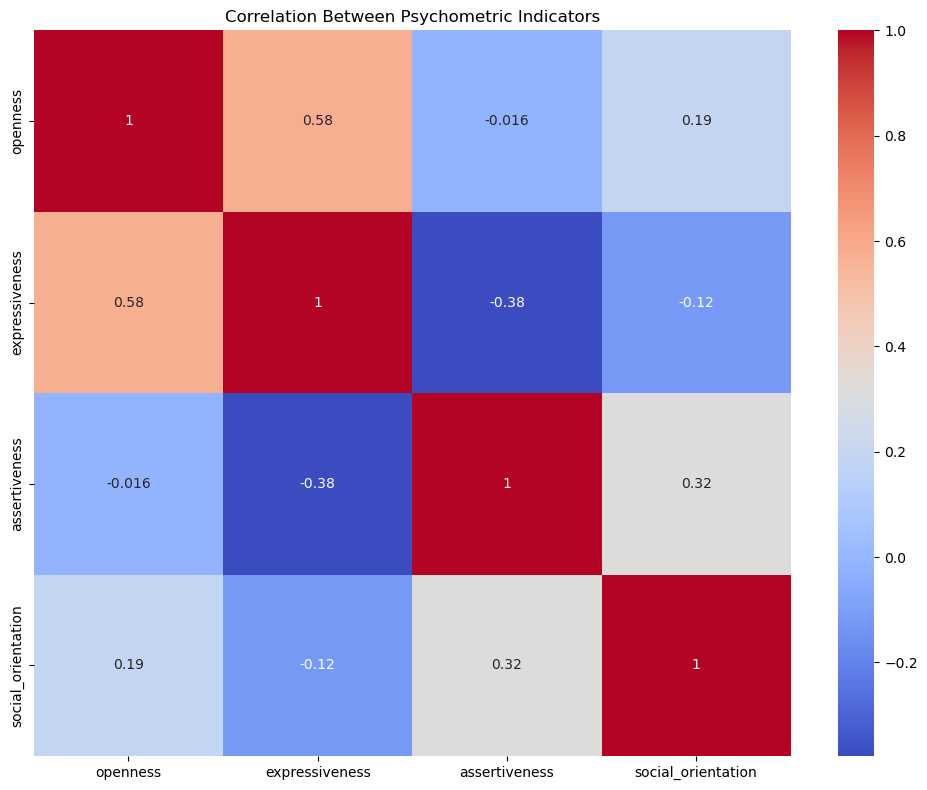

Visualizations saved as psychometric_distributions.png and psychometric_correlations.png


In [118]:
visualize_results("psychometric_results9.csv")

In [124]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

nlp = spacy.load("en_core_web_sm", disable=["ner"])  # Disable NER for speed

def analyze_text_sophistication_simple(text):
    """Simplified and faster version for batch processing"""
    if not isinstance(text, str) or len(text.strip()) < 50:
        return None
    
    try:
        # Process with spaCy
        doc = nlp(text[:50000])  # Limit very long texts
        
        # 1. Vocabulary Diversity
        tokens = [token.text.lower() for token in doc if token.is_alpha]
        if len(tokens) < 20:  # Too few tokens for meaningful analysis
            return None
        
        types = set(tokens)
        ttr = len(types) / len(tokens)
        
        # Content word TTR
        content_tokens = [token.text.lower() for token in doc 
                         if token.is_alpha and token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']]
        content_ttr = len(set(content_tokens)) / len(content_tokens) if content_tokens else 0
        
        # 2. Sentence Structure
        sentences = list(doc.sents)
        if not sentences:
            return None
            
        sent_lengths = [len([token for token in sent if token.is_alpha]) for sent in sentences]
        avg_sent_length = sum(sent_lengths) / len(sent_lengths) if sent_lengths else 0
        
        # Clause density (simplified)
        clauses = 0
        for sent in sentences:
            verbs = [token for token in sent if token.pos_ == "VERB"]
            clauses += len(verbs)
        
        clause_density = clauses / len(sentences) if sentences else 0
        
        # 3. Readability scores
        fk_grade = textstat.flesch_kincaid_grade(text)
        
        # Return metrics
        return {
            "ttr": ttr,
            "content_ttr": content_ttr,
            "avg_sent_length": avg_sent_length,
            "clause_density": clause_density,
            "fk_grade": fk_grade
        }
        
    except Exception as e:
        logger.warning(f"Error analyzing text: {str(e)[:100]}...")
        return None

def process_batch(texts_batch):
    """Process a batch of texts"""
    results = []
    for text in texts_batch:
        result = analyze_text_sophistication_simple(text)
        results.append(result)
    return results

def analyze_dataset(input_file, text_column, output_file=None, batch_size=100, n_workers=None):
    """Analyze sophistication metrics for texts in a dataset"""
    # Determine number of workers
    if n_workers is None:
        n_workers = max(1, mp.cpu_count() - 1)
    
    logger.info(f"Loading data from {input_file}")
    
    # Read data based on file extension
    if input_file.endswith('.csv'):
        df = pd.read_csv(input_file)
    elif input_file.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(input_file)
    else:
        raise ValueError("Unsupported file format. Use CSV or Excel.")
    
    if text_column not in df.columns:
        raise ValueError(f"Text column '{text_column}' not found")
    
    # Prepare batches
    texts = df[text_column].fillna('').tolist()
    batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]
    
    logger.info(f"Processing {len(texts)} texts in {len(batches)} batches with {n_workers} workers")
    
    # Process batches in parallel
    with mp.Pool(n_workers) as pool:
        all_results = list(tqdm(pool.imap(process_batch, batches), total=len(batches)))
    
    # Flatten results
    results = [item for batch in all_results for item in batch]
    
    # Create results dataframe
    results_df = pd.DataFrame([r for r in results if r is not None])
    
    # Add original indices and IDs if present
    valid_indices = [i for i, result in enumerate(results) if result is not None]
    
    if 'id' in df.columns:
        results_df['id'] = df.iloc[valid_indices]['id'].reset_index(drop=True)
    
    # Calculate composite score
    if not results_df.empty:
        results_df['sophistication_score'] = (
            normalize_series(results_df['ttr'], 0.3, 0.7) * 20 +
            normalize_series(results_df['content_ttr'], 0.4, 0.8) * 20 +
            normalize_series(results_df['avg_sent_length'], 8, 25) * 20 +
            normalize_series(results_df['clause_density'], 0.8, 3) * 20 + 
            normalize_series(results_df['fk_grade'], 5, 18) * 20
        ).clip(0, 100)
    
    # Save results
    if output_file is None:
        base, ext = os.path.splitext(input_file)
        output_file = f"{base}_sophistication{ext}"
    
    if output_file.endswith('.csv'):
        results_df.to_csv(output_file, index=False)
    else:
        results_df.to_excel(output_file, index=False)
    
    logger.info(f"Results saved to {output_file}")
    logger.info(f"Successfully processed {len(results_df)} texts out of {len(texts)}")
    
    return results_df

def analyze_large_dataset(input_file, text_column, output_file=None, chunk_size=10000, batch_size=100, n_workers=None):
    """Process very large datasets by reading in chunks"""
    # Determine output file
    if output_file is None:
        base, ext = os.path.splitext(input_file)
        output_file = f"{base}_sophistication{ext}"
    
    # Determine if output exists and should be appended to
    file_exists = os.path.exists(output_file)
    
    # Process chunks
    logger.info(f"Processing {input_file} in chunks of {chunk_size}")
    
    chunk_reader = pd.read_csv(input_file, chunksize=chunk_size)
    
    for i, chunk_df in enumerate(chunk_reader):
        logger.info(f"Processing chunk {i+1}")
        
        # Skip if chunk doesn't have the text column
        if text_column not in chunk_df.columns:
            logger.warning(f"Text column '{text_column}' not found in chunk {i+1}")
            continue
        
        # Process this chunk
        texts = chunk_df[text_column].fillna('').tolist()
        batches = [texts[j:j+batch_size] for j in range(0, len(texts), batch_size)]
        
        # Process batches
        with mp.Pool(n_workers) as pool:
            all_results = list(tqdm(pool.imap(process_batch, batches), total=len(batches)))
        
        # Flatten results
        results = [item for batch in all_results for item in batch]
        
        # Create results dataframe
        results_df = pd.DataFrame([r for r in results if r is not None])
        
        # Add original indices and IDs if present
        valid_indices = [j for j, result in enumerate(results) if result is not None]
        
        if 'id' in chunk_df.columns:
            results_df['id'] = chunk_df.iloc[valid_indices]['id'].reset_index(drop=True)
        
        # Calculate composite score
        if not results_df.empty:
            results_df['sophistication_score'] = (
                normalize_series(results_df['ttr'], 0.3, 0.7) * 20 +
                normalize_series(results_df['content_ttr'], 0.4, 0.8) * 20 +
                normalize_series(results_df['avg_sent_length'], 8, 25) * 20 +
                normalize_series(results_df['clause_density'], 0.8, 3) * 20 + 
                normalize_series(results_df['fk_grade'], 5, 18) * 20
            ).clip(0, 100)
        
        # Write to file
        mode = 'a' if file_exists and i > 0 else 'w'
        header = not (file_exists and i > 0)
        
        if output_file.endswith('.csv'):
            results_df.to_csv(output_file, mode=mode, header=header, index=False)
        else:
            # For Excel, we can't append easily, so just use CSV for very large files
            csv_output = output_file.replace('.xlsx', '.csv').replace('.xls', '.csv')
            results_df.to_csv(csv_output, mode=mode, header=header, index=False)
            if mode == 'w':
                logger.info(f"Using CSV format for large dataset instead of Excel: {csv_output}")
        
        logger.info(f"Completed chunk {i+1} - processed {len(results_df)} out of {len(texts)} texts")
    
    logger.info(f"Processing complete! Results saved to {output_file}")

def normalize_series(series, min_val, max_val):
    """Normalize a pandas series between 0 and 1"""
    return series.clip(min_val, max_val).apply(lambda x: (x - min_val) / (max_val - min_val))

In [125]:
import textstat
def process_multiple_columns(input_file, text_columns, output_prefix=None):
    """Process multiple text columns from the same file"""
    results = {}
    
    for col in text_columns:
        print(f"\nProcessing column: {col}")
        output_file = f"{output_prefix}_{col}.csv" if output_prefix else None
        
        try:
            result = analyze_large_dataset(
                input_file=input_file,
                text_column=col,
                output_file=output_file,
                batch_size=200
            )
            results[col] = result
        except Exception as e:
            print(f"Error processing column {col}: {e}")
    
    return results

results = process_multiple_columns(
    input_file="profiles.csv",
    text_columns=essay_cols,
    output_prefix="sophistication"
)

2025-04-13 21:41:57,876 - INFO - Processing profiles.csv in chunks of 10000



Processing column: essay0


2025-04-13 21:41:58,163 - INFO - Processing chunk 1


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:42:44,891 - INFO - Completed chunk 1 - processed 8053 out of 10000 texts
2025-04-13 21:42:45,121 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:43:32,315 - INFO - Completed chunk 2 - processed 8028 out of 10000 texts
2025-04-13 21:43:32,549 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:44:21,329 - INFO - Completed chunk 3 - processed 8093 out of 10000 texts
2025-04-13 21:44:21,554 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:45:09,807 - INFO - Completed chunk 4 - processed 8028 out of 10000 texts
2025-04-13 21:45:10,028 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:45:56,095 - INFO - Completed chunk 5 - processed 8012 out of 10000 texts
2025-04-13 21:45:56,347 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:46:41,667 - INFO - Completed chunk 6 - processed 7918 out of 9946 texts
2025-04-13 21:46:41,669 - INFO - Processing complete! Results saved to sophistication_essay0.csv
2025-04-13 21:46:41,680 - INFO - Processing profiles.csv in chunks of 10000



Processing column: essay1


2025-04-13 21:46:41,919 - INFO - Processing chunk 1


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:47:01,917 - INFO - Completed chunk 1 - processed 5812 out of 10000 texts
2025-04-13 21:47:02,117 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:47:23,408 - INFO - Completed chunk 2 - processed 5857 out of 10000 texts
2025-04-13 21:47:23,610 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:47:44,215 - INFO - Completed chunk 3 - processed 5825 out of 10000 texts
2025-04-13 21:47:44,422 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:48:04,836 - INFO - Completed chunk 4 - processed 5784 out of 10000 texts
2025-04-13 21:48:05,025 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:48:24,593 - INFO - Completed chunk 5 - processed 5732 out of 10000 texts
2025-04-13 21:48:24,786 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:48:44,285 - INFO - Completed chunk 6 - processed 5751 out of 9946 texts
2025-04-13 21:48:44,286 - INFO - Processing complete! Results saved to sophistication_essay1.csv
2025-04-13 21:48:44,297 - INFO - Processing profiles.csv in chunks of 10000
2025-04-13 21:48:44,488 - INFO - Processing chunk 1



Processing column: essay2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:48:58,602 - INFO - Completed chunk 1 - processed 3848 out of 10000 texts
2025-04-13 21:48:58,802 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:49:13,814 - INFO - Completed chunk 2 - processed 3951 out of 10000 texts
2025-04-13 21:49:14,021 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:49:28,215 - INFO - Completed chunk 3 - processed 3957 out of 10000 texts
2025-04-13 21:49:28,410 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:49:42,799 - INFO - Completed chunk 4 - processed 3814 out of 10000 texts
2025-04-13 21:49:43,034 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:49:57,190 - INFO - Completed chunk 5 - processed 3793 out of 10000 texts
2025-04-13 21:49:57,383 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:50:11,161 - INFO - Completed chunk 6 - processed 3726 out of 9946 texts
2025-04-13 21:50:11,163 - INFO - Processing complete! Results saved to sophistication_essay2.csv
2025-04-13 21:50:11,176 - INFO - Processing profiles.csv in chunks of 10000
2025-04-13 21:50:11,367 - INFO - Processing chunk 1



Processing column: essay3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:50:18,768 - INFO - Completed chunk 1 - processed 2144 out of 10000 texts
2025-04-13 21:50:18,971 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:50:26,827 - INFO - Completed chunk 2 - processed 2214 out of 10000 texts
2025-04-13 21:50:27,028 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:50:35,254 - INFO - Completed chunk 3 - processed 2232 out of 10000 texts
2025-04-13 21:50:35,446 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:50:43,775 - INFO - Completed chunk 4 - processed 2158 out of 10000 texts
2025-04-13 21:50:43,988 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:50:52,078 - INFO - Completed chunk 5 - processed 2177 out of 10000 texts
2025-04-13 21:50:52,269 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:50:59,556 - INFO - Completed chunk 6 - processed 2133 out of 9946 texts
2025-04-13 21:50:59,557 - INFO - Processing complete! Results saved to sophistication_essay3.csv
2025-04-13 21:50:59,568 - INFO - Processing profiles.csv in chunks of 10000
2025-04-13 21:50:59,767 - INFO - Processing chunk 1



Processing column: essay4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:51:45,853 - INFO - Completed chunk 1 - processed 7289 out of 10000 texts
2025-04-13 21:51:46,074 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:52:32,737 - INFO - Completed chunk 2 - processed 7284 out of 10000 texts
2025-04-13 21:52:32,960 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:53:18,823 - INFO - Completed chunk 3 - processed 7326 out of 10000 texts
2025-04-13 21:53:19,059 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:54:02,449 - INFO - Completed chunk 4 - processed 7143 out of 10000 texts
2025-04-13 21:54:02,673 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:54:46,044 - INFO - Completed chunk 5 - processed 7150 out of 10000 texts
2025-04-13 21:54:46,265 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:55:28,605 - INFO - Completed chunk 6 - processed 7114 out of 9946 texts
2025-04-13 21:55:28,606 - INFO - Processing complete! Results saved to sophistication_essay4.csv
2025-04-13 21:55:28,617 - INFO - Processing profiles.csv in chunks of 10000



Processing column: essay5


2025-04-13 21:55:28,878 - INFO - Processing chunk 1


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:55:44,207 - INFO - Completed chunk 1 - processed 2862 out of 10000 texts
2025-04-13 21:55:44,404 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:55:59,650 - INFO - Completed chunk 2 - processed 2905 out of 10000 texts
2025-04-13 21:55:59,842 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:56:15,017 - INFO - Completed chunk 3 - processed 2893 out of 10000 texts
2025-04-13 21:56:15,211 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:56:30,328 - INFO - Completed chunk 4 - processed 2897 out of 10000 texts
2025-04-13 21:56:30,512 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:56:46,187 - INFO - Completed chunk 5 - processed 2869 out of 10000 texts
2025-04-13 21:56:46,388 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:57:02,640 - INFO - Completed chunk 6 - processed 2757 out of 9946 texts
2025-04-13 21:57:02,641 - INFO - Processing complete! Results saved to sophistication_essay5.csv
2025-04-13 21:57:02,652 - INFO - Processing profiles.csv in chunks of 10000
2025-04-13 21:57:02,838 - INFO - Processing chunk 1



Processing column: essay6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:57:15,371 - INFO - Completed chunk 1 - processed 3219 out of 10000 texts
2025-04-13 21:57:15,564 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:57:27,723 - INFO - Completed chunk 2 - processed 3355 out of 10000 texts
2025-04-13 21:57:27,919 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:57:39,045 - INFO - Completed chunk 3 - processed 3293 out of 10000 texts
2025-04-13 21:57:39,236 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:57:51,321 - INFO - Completed chunk 4 - processed 3171 out of 10000 texts
2025-04-13 21:57:51,510 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:58:02,410 - INFO - Completed chunk 5 - processed 3200 out of 10000 texts
2025-04-13 21:58:02,598 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:58:14,118 - INFO - Completed chunk 6 - processed 3123 out of 9946 texts
2025-04-13 21:58:14,120 - INFO - Processing complete! Results saved to sophistication_essay6.csv
2025-04-13 21:58:14,135 - INFO - Processing profiles.csv in chunks of 10000



Processing column: essay7


2025-04-13 21:58:14,337 - INFO - Processing chunk 1


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:58:24,472 - INFO - Completed chunk 1 - processed 3163 out of 10000 texts
2025-04-13 21:58:24,670 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:58:35,002 - INFO - Completed chunk 2 - processed 3276 out of 10000 texts
2025-04-13 21:58:35,200 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:58:44,904 - INFO - Completed chunk 3 - processed 3104 out of 10000 texts
2025-04-13 21:58:45,091 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:58:55,297 - INFO - Completed chunk 4 - processed 3194 out of 10000 texts
2025-04-13 21:58:55,483 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:59:05,035 - INFO - Completed chunk 5 - processed 3138 out of 10000 texts
2025-04-13 21:59:05,219 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:59:15,042 - INFO - Completed chunk 6 - processed 3125 out of 9946 texts
2025-04-13 21:59:15,043 - INFO - Processing complete! Results saved to sophistication_essay7.csv
2025-04-13 21:59:15,063 - INFO - Processing profiles.csv in chunks of 10000
2025-04-13 21:59:15,258 - INFO - Processing chunk 1



Processing column: essay8


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:59:22,877 - INFO - Completed chunk 1 - processed 2048 out of 10000 texts
2025-04-13 21:59:23,070 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:59:32,119 - INFO - Completed chunk 2 - processed 2150 out of 10000 texts
2025-04-13 21:59:32,315 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:59:40,605 - INFO - Completed chunk 3 - processed 2135 out of 10000 texts
2025-04-13 21:59:40,796 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:59:48,845 - INFO - Completed chunk 4 - processed 2027 out of 10000 texts
2025-04-13 21:59:49,033 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 21:59:56,361 - INFO - Completed chunk 5 - processed 1944 out of 10000 texts
2025-04-13 21:59:56,547 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 22:00:04,147 - INFO - Completed chunk 6 - processed 1944 out of 9946 texts
2025-04-13 22:00:04,150 - INFO - Processing complete! Results saved to sophistication_essay8.csv
2025-04-13 22:00:04,161 - INFO - Processing profiles.csv in chunks of 10000
2025-04-13 22:00:04,356 - INFO - Processing chunk 1



Processing column: essay9


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 22:00:19,150 - INFO - Completed chunk 1 - processed 4104 out of 10000 texts
2025-04-13 22:00:19,350 - INFO - Processing chunk 2


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 22:00:34,305 - INFO - Completed chunk 2 - processed 4147 out of 10000 texts
2025-04-13 22:00:34,494 - INFO - Processing chunk 3


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 22:00:51,308 - INFO - Completed chunk 3 - processed 4244 out of 10000 texts
2025-04-13 22:00:51,509 - INFO - Processing chunk 4


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 22:01:06,006 - INFO - Completed chunk 4 - processed 4070 out of 10000 texts
2025-04-13 22:01:06,208 - INFO - Processing chunk 5


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 22:01:20,373 - INFO - Completed chunk 5 - processed 3948 out of 10000 texts
2025-04-13 22:01:20,561 - INFO - Processing chunk 6


  0%|          | 0/50 [00:00<?, ?it/s]

2025-04-13 22:01:34,688 - INFO - Completed chunk 6 - processed 3965 out of 9946 texts
2025-04-13 22:01:34,690 - INFO - Processing complete! Results saved to sophistication_essay9.csv


In [ ]:
def visualize_sophistication_results(results_file):
    """Create visualizations of text sophistication metrics"""
    # Load results
    if results_file.endswith('.csv'):
        df = pd.read_csv(results_file)
    else:
        df = pd.read_excel(results_file)
    
    # Create figure
    plt.figure(figsize=(15, 10))
    
    # Distribution of sophistication score
    plt.subplot(2, 2, 1)
    sns.histplot(df['sophistication_score'], kde=True)
    plt.title('Text Sophistication Score Distribution')
    plt.axvline(df['sophistication_score'].mean(), color='r', linestyle='--')
    
    # TTR vs Sentence Length scatter
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='avg_sent_length', y='ttr', data=df, alpha=0.6)
    plt.title('Vocabulary Diversity vs Sentence Length')
    
    # Correlations heatmap
    plt.subplot(2, 2, 3)
    metrics = ['ttr', 'content_ttr', 'avg_sent_length', 'clause_density', 'fk_grade', 'sophistication_score']
    sns.heatmap(df[metrics].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Between Sophistication Metrics')
    
    # Boxplot of key metrics
    plt.subplot(2, 2, 4)
    scaled_df = df[['ttr', 'content_ttr', 'clause_density']].copy()
    for col in scaled_df.columns:
        scaled_df[col] = (scaled_df[col] - scaled_df[col].min()) / (scaled_df[col].max() - scaled_df[col].min())
    
    sns.boxplot(data=scaled_df)
    plt.title('Normalized Distribution of Key Metrics')
    
    plt.tight_layout()
    plt.savefig('sophistication_analysis.png')
    plt.close()
    
    print(f"Visualization saved as sophistication_analysis.png")
    
    # Text sophistication summary
    print("\nText Sophistication Summary:")
    print("-" * 50)
    print(f"Average Sophistication Score: {df['sophistication_score'].mean():.2f}")
    print(f"Median Type-Token Ratio: {df['ttr'].median():.3f}")
    print(f"Average Sentence Length: {df['avg_sent_length'].mean():.2f} words")
    print(f"Average Clause Density: {df['clause_density'].mean():.2f} clauses per sentence")
    print(f"Average Reading Grade Level: {df['fk_grade'].mean():.1f}")

# Example usage
visualize_sophistication_results("sophistication_results.csv")